# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tools as t
import models as m
import hyperband as hp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
configs,lcs,Y = t.load_data(scale_configs = True)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

scaling configuration data
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


###    Testing models (mlp, lstm, multi_lstm)

In [69]:
cfg = {'lr': 0.2213474827989724, 'batch_size': 20}
model = m.mlp(cfg)
m.train_mlp(model, configs, Y, cfg, split=177, epochs=10)
m.eval_mlp(model, configs, Y, split=177, batch_size=20)

Train on 177 samples, validate on 88 samples
Epoch 1/10
177/177 [==============================] - 2s 14ms/step - loss: 0.0554 - val_loss: 0.0263
Epoch 2/10
177/177 [==============================] - 0s 445us/step - loss: 0.0363 - val_loss: 0.0250
Epoch 3/10
177/177 [==============================] - 0s 446us/step - loss: 0.0353 - val_loss: 0.0234
Epoch 4/10
177/177 [==============================] - 0s 534us/step - loss: 0.0330 - val_loss: 0.0229
Epoch 5/10
177/177 [==============================] - 0s 443us/step - loss: 0.0305 - val_loss: 0.0252
Epoch 6/10
177/177 [==============================] - 0s 596us/step - loss: 0.0287 - val_loss: 0.0227
Epoch 7/10
177/177 [==============================] - 0s 431us/step - loss: 0.0260 - val_loss: 0.0192
Epoch 8/10
177/177 [==============================] - 0s 483us/step - loss: 0.0247 - val_loss: 0.0183
Epoch 9/10
177/177 [==============================] - 0s 683us/step - loss: 0.0224 - val_loss: 0.0185
Epoch 10/10
177/177 [=================

(0.020264899801071712, 0.017568055259537099)

In [75]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(10,10), split=150, 
             batch_size=20, epochs=3, mode='finalstep', verbose=1)
m.eval_lstm_direct(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on finalstep considering 10 epochs, eval during training with 10 epochs
Epoch 1/3
8/8 [==============================] - 6s 708ms/step - loss: 0.2487 - mean_squared_error: 0.2487 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 2/3
8/8 [==============================] - 1s 121ms/step - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 3/3
8/8 [==============================] - 1s 128ms/step - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
mse train: 0.07338, mse validation 0.05441


(0.073382757786209549, 0.054412963820766672)

In [76]:
# same with training on random lenghts
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(0,10), split=150, batch_size=20, 
             epochs=3, mode='finalstep', verbose=1)
m.eval_lstm_direct(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on finalstep with random nr. of epochs, eval during training with 10 epochs
Epoch 1/3
8/8 [==============================] - 7s 825ms/step - loss: 0.3111 - mean_squared_error: 0.3111 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 2/3
8/8 [==============================] - 2s 221ms/step - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 3/3
8/8 [==============================] - 2s 220ms/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
mse train: 0.05126, mse validation 0.03871


(0.051258760669721667, 0.03870874210144807)

In [80]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(10,10), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=10, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on nextstep considering 10 epochs, eval during training with 10 epochs
Epoch 1/50
9/9 [==============================] - 5s 527ms/step - loss: 0.2842 - mean_squared_error: 0.2842 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 2/50
9/9 [==============================] - 1s 89ms/step - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 3/50
9/9 [==============================] - 1s 96ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 4/50
9/9 [==============================] - 1s 97ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 5/50
9/9 [==============================] - 1s 97ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 6/50
9/9 [==============================] - 1s 100ms/step - loss: 0.0047 -

Epoch 48/50
9/9 [==============================] - 1s 92ms/step - loss: 7.4931e-04 - mean_squared_error: 7.4931e-04 - val_loss: 5.9438e-04 - val_mean_squared_error: 5.9438e-04
Epoch 49/50
9/9 [==============================] - 1s 101ms/step - loss: 6.7311e-04 - mean_squared_error: 6.7311e-04 - val_loss: 4.7425e-04 - val_mean_squared_error: 4.7425e-04
Epoch 50/50
9/9 [==============================] - 1s 112ms/step - loss: 6.5365e-04 - mean_squared_error: 6.5365e-04 - val_loss: 4.5641e-04 - val_mean_squared_error: 4.5641e-04
mse train: 0.06521, mse validation 0.02669


(0.065214293491303491, 0.026686737793762665)

In [78]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(20,20), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=20, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train considering 20 epochs, eval during training with 20 epochs
Epoch 1/50
9/9 [==============================] - 6s 616ms/step - loss: 0.3187 - mean_squared_error: 0.3187 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 2/50
9/9 [==============================] - 1s 144ms/step - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 3/50
9/9 [==============================] - 1s 139ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 4/50
9/9 [==============================] - 1s 146ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
9/9 [==============================] - 1s 157ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/50
9/9 [==============================] - 2s 171ms/step - loss: 0.0028 - mean_sq

Epoch 48/50
9/9 [==============================] - 1s 60ms/step - loss: 3.8044e-04 - mean_squared_error: 3.8044e-04 - val_loss: 5.9433e-04 - val_mean_squared_error: 5.9433e-04
Epoch 49/50
9/9 [==============================] - 1s 68ms/step - loss: 3.8620e-04 - mean_squared_error: 3.8620e-04 - val_loss: 3.8484e-04 - val_mean_squared_error: 3.8484e-04
Epoch 50/50
9/9 [==============================] - 1s 59ms/step - loss: 3.7075e-04 - mean_squared_error: 3.7075e-04 - val_loss: 5.0869e-04 - val_mean_squared_error: 5.0869e-04
mse train: 0.07631, mse validation 0.03996


(0.076310423364451249, 0.039959337114572585)

In [79]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(5,5), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=5, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on nextstep considering 5 epochs, eval during training with 5 epochs
Epoch 1/50
9/9 [==============================] - 5s 510ms/step - loss: 0.2543 - mean_squared_error: 0.2543 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 2/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 3/50
9/9 [==============================] - 1s 66ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 4/50
9/9 [==============================] - 1s 67ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
9/9 [==============================] - 1s 69ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 6/50
9/9 [==============================] - 1s 67ms/step - loss: 0.0061 - me

Epoch 50/50
9/9 [==============================] - 1s 84ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 8.2414e-04 - val_mean_squared_error: 8.2414e-04
mse train: 7.22660, mse validation 7.20777


(7.2265960036872281, 7.2077733345183974)

In [57]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(0,10), split=150, batch_size=20, 
             epochs=10, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, eval during training with 10 epochs
Epoch 1/10
8/8 [==============================] - 4s 489ms/step - loss: 0.2961 - mean_squared_error: 0.2961 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 2/10
8/8 [==============================] - 1s 185ms/step - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 3/10
8/8 [==============================] - 2s 202ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 4/10
8/8 [==============================] - 1s 187ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 5/10
8/8 [==============================] - 2s 189ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/10
8/8 [==============================] - 2s 190ms/step - loss: 0.0077 - mea

(0.92658545341745213, 0.73805311720421751)

In [49]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 
       'cols_bt': 0.9376450587145334, 'n_estimators': 1000, 'subsample': 0.7946631901813815}
model = m.xgb_next(cfg)
m.train_xgb_next(model, [configs,lcs], split = 200)
m.eval_xgb_stepwise(model, [configs,lcs], Y, 10, split=200)

train on new epoch 5 true value for curve no. 13 (example) 0.297987927284
train on new epoch 6 true value for curve no. 13 (example) 0.276659959129
train on new epoch 7 true value for curve no. 13 (example) 0.275050303766
train on new epoch 8 true value for curve no. 13 (example) 0.288933598569
train on new epoch 9 true value for curve no. 13 (example) 0.275251509888
train on new epoch 10 true value for curve no. 13 (example) 0.311066399728
train on new epoch 11 true value for curve no. 13 (example) 0.257645875216
train on new epoch 12 true value for curve no. 13 (example) 0.26348088256
train on new epoch 13 true value for curve no. 13 (example) 0.282394366605
train on new epoch 14 true value for curve no. 13 (example) 0.245372237904
train on new epoch 15 true value for curve no. 13 (example) 0.252716300743
train on new epoch 16 true value for curve no. 13 (example) 0.246177060263
train on new epoch 17 true value for curve no. 13 (example) 0.235714284437
train on new epoch 18 true valu

(0.083146945607023348, 0.056170584855359744)

###    evaluating models with cross validation (ridge, XGB, mlp, lstm, multi_lstm)

cross validate 0 epochs, train on 0 steps, validate on [0] steps
config {'alpha': 1.0}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.02977] ***
Results validation data of all Folds: 
[[ 0.03703]
 [ 0.02671]
 [ 0.02556]]
MSE on train data on [0] steps: means over folds: *** [ 0.02747] ***
Results training data of all Folds: 
[[ 0.02433]
 [ 0.02864]
 [ 0.02943]]
mse over all validation data 0.0297968665436
set format
path plots/ridge regression_sct.png


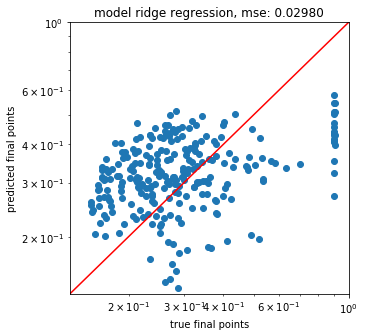

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


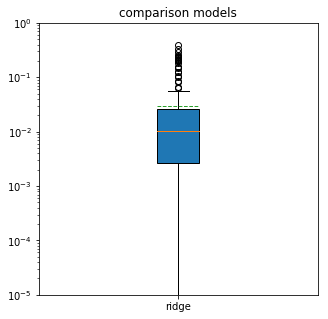

In [131]:
cfg={'alpha':1.0}
res_ridge = m.eval_cv('ridge', configs, Y, cfg=cfg, splits = 3)
t.scatter_plot(Y, res_ridge['y_preds'][0], 'ridge regression')
t.box_plot(Y, (5,5), [res_ridge], ['ridge'], 'comparison models')

cross validate 0 epochs, train on 0 steps, validate on [0] steps
config {'gamma': 0.007833441242813044, 'lr': 0.08119864140758115, 'subsample': 0.7946631901813815, 'cols_bt': 0.9376450587145334, 'maxdepth': 10, 'n_estimators': 1000}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.00677] ***
Results validation data of all Folds: 
[[ 0.01027]
 [ 0.00327]
 [ 0.00675]]
MSE on train data on [0] steps: means over folds: *** [ 0.00056] ***
Results training data of all Folds: 
[[ 0.00051]
 [ 0.00057]
 [ 0.00059]]
mse over all validation data 0.0067790880535
set format
path plots/xgb_sct.png


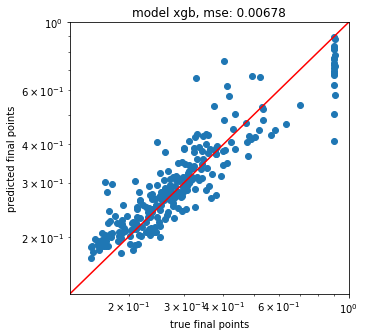

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


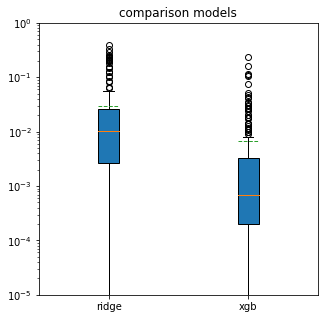

In [132]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
#cfg = {'maxdepth': 4, 'lr': 0.07120217610550672, 'gamma': 0.03393596760993278, 'cols_bt': 0.823494199726015, 'n_estimators': 107, 'subsample': 0.7288741544938715}
res_xgb = m.eval_cv('xgb', configs, Y, cfg=cfg, splits = 3)
t.scatter_plot(Y, res_xgb, 'xgb')
t.box_plot_single(Y, (5,5), [res_ridge, res_xgb], ['ridge','xgb'], 'comparison models')

In [171]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_500 = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=500, splits = 3, earlystop=False) 
t.pickle_to_file(res_mlp_500, 'res_mlp_500')

cross validate 500 epochs, train on 0 steps, validate on [0] steps
config {'batch_size': 20, 'lr': 0.2213474827989724}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.00596] ***
Results validation data of all Folds: 
[[ 0.00632]
 [ 0.00574]
 [ 0.00583]]
MSE on train data on [0] steps: means over folds: *** [ 0.00075] ***
Results training data of all Folds: 
[[ 0.00016]
 [ 0.00158]
 [ 0.00051]]
mse over all validation data 0.00596572134582


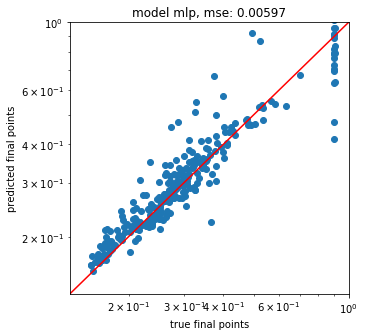

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


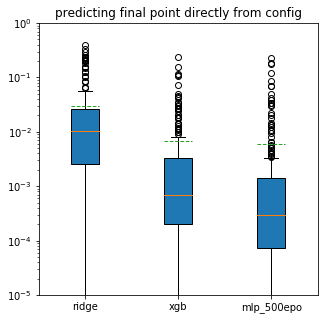

In [173]:
res_mlp_500=t.pickle_from_file('res_mlp_500')
t.scatter_plot(Y, res_mlp_500, 'mlp')
t.box_plot_single(Y, (5,5), [res_ridge, res_xgb, res_mlp_500], ['ridge','xgb','mlp_500epo'], 
           'predicting final point directly from config')

cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.2213474827989724, 'batch_size': 20}
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.04875, storing weights.

Epoch 00002: val_loss improved from 0.04875 to 0.04613, storing weights.

Epoch 00003: val_loss is 0.04671, did not improve

Epoch 00004: val_loss improved from 0.04613 to 0.04593, storing weights.

Epoch 00005: val_loss improved from 0.04593 to 0.04239, storing weights.

Epoch 00006: val_loss is 0.04353, did not improve

Epoch 00007: val_loss improved from 0.04239 to 0.03963, storing weights.

Epoch 00008: val_loss improved from 0.03963 to 0.03916, storing weights.

Epoch 00009: val_loss improved from 0.03916 to 0.03686, storing weights.

Epoch 00010: val_loss improved from 0.03686 to 0.03644, storing weights.

Epoch 00011: val_loss improved from 0.03644 to 0.03381, storing weights.

Epoch 00012: val_loss improved from 0


Epoch 00142: val_loss is 0.00822, did not improve

Epoch 00143: val_loss is 0.00773, did not improve

Epoch 00144: val_loss is 0.00820, did not improve

Epoch 00145: val_loss is 0.00776, did not improve

Epoch 00146: val_loss is 0.00765, did not improve

Epoch 00147: val_loss is 0.00811, did not improve

Epoch 00148: val_loss is 0.00767, did not improve

Epoch 00149: val_loss is 0.00769, did not improve

Epoch 00150: val_loss is 0.00750, did not improve

Epoch 00151: val_loss is 0.00857, did not improve

Epoch 00152: val_loss is 0.00785, did not improve

Epoch 00153: val_loss is 0.00810, did not improve

Epoch 00154: val_loss is 0.00759, did not improve

Epoch 00155: val_loss is 0.00897, did not improve

Epoch 00156: val_loss is 0.00854, did not improve

Epoch 00157: val_loss is 0.00909, did not improve

Epoch 00158: val_loss is 0.00789, did not improve

Epoch 00159: val_loss is 0.00801, did not improve

Epoch 00160: val_loss is 0.00898, did not improve

Epoch 00161: val_loss is 0.007


Epoch 00114: val_loss is 0.00662, did not improve

Epoch 00115: val_loss is 0.00635, did not improve

Epoch 00116: val_loss is 0.00705, did not improve

Epoch 00117: val_loss is 0.00653, did not improve

Epoch 00118: val_loss is 0.00641, did not improve

Epoch 00119: val_loss is 0.00634, did not improve

Epoch 00120: val_loss is 0.00626, did not improve

Epoch 00121: val_loss improved from 0.00624 to 0.00615, storing weights.

Epoch 00122: val_loss improved from 0.00615 to 0.00611, storing weights.

Epoch 00123: val_loss is 0.00674, did not improve

Epoch 00124: val_loss is 0.00676, did not improve

Epoch 00125: val_loss improved from 0.00611 to 0.00603, storing weights.

Epoch 00126: val_loss is 0.00619, did not improve

Epoch 00127: val_loss is 0.00677, did not improve

Epoch 00128: val_loss is 0.00658, did not improve

Epoch 00129: val_loss is 0.00614, did not improve

Epoch 00130: val_loss is 0.00677, did not improve

Epoch 00131: val_loss is 0.00637, did not improve

Epoch 00132:


Epoch 00267: val_loss is 0.00589, did not improve

Epoch 00268: val_loss is 0.00533, did not improve

Epoch 00269: val_loss is 0.00565, did not improve

Epoch 00270: val_loss is 0.00533, did not improve

Epoch 00271: val_loss is 0.00519, did not improve

Epoch 00272: val_loss is 0.00582, did not improve

Epoch 00273: val_loss is 0.00546, did not improve

Epoch 00274: val_loss is 0.00531, did not improve

Epoch 00275: val_loss is 0.00561, did not improve

Epoch 00276: val_loss is 0.00631, did not improve

Epoch 00277: val_loss is 0.00565, did not improve

Epoch 00278: val_loss is 0.00525, did not improve

Epoch 00279: val_loss is 0.00708, did not improve

Epoch 00280: val_loss is 0.00511, did not improve

Epoch 00281: val_loss is 0.00512, did not improve

Epoch 00282: val_loss is 0.00543, did not improve

Epoch 00283: val_loss is 0.00521, did not improve

Epoch 00284: val_loss is 0.00512, did not improve

Epoch 00285: val_loss is 0.00535, did not improve

Epoch 00286: val_loss is 0.005


Epoch 00430: val_loss is 0.00545, did not improve

Epoch 00431: val_loss is 0.00521, did not improve

Epoch 00432: val_loss is 0.00534, did not improve

Epoch 00433: val_loss is 0.00538, did not improve

Epoch 00434: val_loss is 0.00524, did not improve

Epoch 00435: val_loss is 0.00550, did not improve

Epoch 00436: val_loss is 0.00533, did not improve

Epoch 00437: val_loss is 0.00547, did not improve

Epoch 00438: val_loss is 0.00514, did not improve

Epoch 00439: val_loss is 0.00530, did not improve

Epoch 00440: val_loss is 0.00524, did not improve

Epoch 00441: val_loss is 0.00545, did not improve

Epoch 00442: val_loss is 0.00532, did not improve

Epoch 00443: val_loss is 0.00607, did not improve

Epoch 00444: val_loss is 0.00523, did not improve

Epoch 00445: val_loss is 0.00526, did not improve

Epoch 00446: val_loss is 0.00528, did not improve

Epoch 00447: val_loss is 0.00506, did not improve

Epoch 00448: val_loss is 0.00630, did not improve

Epoch 00449: val_loss is 0.005


Epoch 00124: val_loss is 0.00766, did not improve

Epoch 00125: val_loss is 0.00581, did not improve

Epoch 00126: val_loss is 0.00635, did not improve

Epoch 00127: val_loss is 0.00541, did not improve

Epoch 00128: val_loss is 0.00534, did not improve

Epoch 00129: val_loss is 0.00576, did not improve

Epoch 00130: val_loss is 0.00595, did not improve

Epoch 00131: val_loss is 0.00601, did not improve

Epoch 00132: val_loss is 0.00658, did not improve

Epoch 00133: val_loss is 0.00649, did not improve

Epoch 00134: val_loss is 0.00692, did not improve

Epoch 00135: val_loss is 0.00572, did not improve

Epoch 00136: val_loss is 0.00714, did not improve

Epoch 00137: val_loss is 0.00610, did not improve

Epoch 00138: val_loss is 0.00602, did not improve

Epoch 00139: val_loss is 0.00629, did not improve

Epoch 00140: val_loss is 0.00799, did not improve

Epoch 00141: val_loss is 0.00810, did not improve

Epoch 00142: val_loss is 0.00586, did not improve

Epoch 00143: val_loss is 0.005


Epoch 00284: val_loss is 0.00613, did not improve

Epoch 00285: val_loss is 0.00516, did not improve

Epoch 00286: val_loss is 0.00539, did not improve

Epoch 00287: val_loss is 0.00760, did not improve

Epoch 00288: val_loss is 0.00679, did not improve

Epoch 00289: val_loss is 0.00561, did not improve

Epoch 00290: val_loss is 0.00497, did not improve

Epoch 00291: val_loss is 0.00604, did not improve

Epoch 00292: val_loss is 0.00596, did not improve

Epoch 00293: val_loss is 0.00914, did not improve

Epoch 00294: val_loss is 0.00576, did not improve

Epoch 00295: val_loss is 0.00691, did not improve

Epoch 00296: val_loss is 0.00563, did not improve

Epoch 00297: val_loss is 0.00545, did not improve

Epoch 00298: val_loss is 0.00565, did not improve

Epoch 00299: val_loss is 0.00582, did not improve

Epoch 00300: val_loss is 0.00496, did not improve

Epoch 00301: val_loss is 0.00575, did not improve
Epoch 00301: early stopping
Using epoch 00226 with val_loss: 0.00481
MSE on valida

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


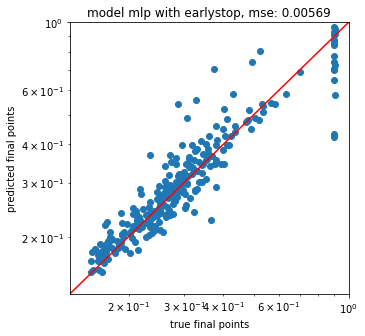

In [197]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_es = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True)
t.scatter_plot(Y, res_mlp_es['y_preds'][0], 'mlp with earlystop')

cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.2213474827989724, 'batch_size': 20}
evaluating with early stopping
create mlp using Dropout
train fold 1 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.05210, storing weights.

Epoch 00002: val_loss improved from 0.05210 to 0.04729, storing weights.

Epoch 00003: val_loss improved from 0.04729 to 0.04595, storing weights.

Epoch 00004: val_loss improved from 0.04595 to 0.04564, storing weights.

Epoch 00005: val_loss is 0.04595, did not improve

Epoch 00006: val_loss improved from 0.04564 to 0.04303, storing weights.

Epoch 00007: val_loss improved from 0.04303 to 0.04162, storing weights.

Epoch 00008: val_loss improved from 0.04162 to 0.04005, storing weights.

Epoch 00009: val_loss is 0.04128, did not improve

Epoch 00010: val_loss improved from 0.04005 to 0.03847, storing weights.

Epoch 00011: val_loss improved from 0.03847 to 0.03559, storing weights.

Epoch 00012:


Epoch 00142: val_loss is 0.01008, did not improve

Epoch 00143: val_loss is 0.01029, did not improve

Epoch 00144: val_loss is 0.00941, did not improve

Epoch 00145: val_loss is 0.01080, did not improve

Epoch 00146: val_loss is 0.01020, did not improve

Epoch 00147: val_loss is 0.01200, did not improve

Epoch 00148: val_loss is 0.00816, did not improve

Epoch 00149: val_loss is 0.00820, did not improve

Epoch 00150: val_loss is 0.00954, did not improve

Epoch 00151: val_loss is 0.00869, did not improve

Epoch 00152: val_loss is 0.00866, did not improve

Epoch 00153: val_loss is 0.00875, did not improve

Epoch 00154: val_loss is 0.00913, did not improve

Epoch 00155: val_loss is 0.01156, did not improve

Epoch 00156: val_loss is 0.00834, did not improve

Epoch 00157: val_loss is 0.00810, did not improve

Epoch 00158: val_loss is 0.00900, did not improve

Epoch 00159: val_loss improved from 0.00807 to 0.00774, storing weights.

Epoch 00160: val_loss is 0.00817, did not improve

Epoch 0


Epoch 00040: val_loss is 0.00923, did not improve

Epoch 00041: val_loss improved from 0.00791 to 0.00775, storing weights.

Epoch 00042: val_loss is 0.00820, did not improve

Epoch 00043: val_loss improved from 0.00775 to 0.00760, storing weights.

Epoch 00044: val_loss is 0.00777, did not improve

Epoch 00045: val_loss is 0.00762, did not improve

Epoch 00046: val_loss is 0.00877, did not improve

Epoch 00047: val_loss is 0.00991, did not improve

Epoch 00048: val_loss improved from 0.00760 to 0.00753, storing weights.

Epoch 00049: val_loss is 0.00808, did not improve

Epoch 00050: val_loss is 0.00810, did not improve

Epoch 00051: val_loss is 0.00800, did not improve

Epoch 00052: val_loss improved from 0.00753 to 0.00716, storing weights.

Epoch 00053: val_loss is 0.00831, did not improve

Epoch 00054: val_loss is 0.00762, did not improve

Epoch 00055: val_loss is 0.01141, did not improve

Epoch 00056: val_loss is 0.00782, did not improve

Epoch 00057: val_loss is 0.00732, did no


Epoch 00196: val_loss is 0.00617, did not improve

Epoch 00197: val_loss is 0.00619, did not improve

Epoch 00198: val_loss is 0.00614, did not improve

Epoch 00199: val_loss is 0.00942, did not improve

Epoch 00200: val_loss is 0.00742, did not improve

Epoch 00201: val_loss is 0.00574, did not improve

Epoch 00202: val_loss is 0.00605, did not improve

Epoch 00203: val_loss is 0.00614, did not improve

Epoch 00204: val_loss is 0.00712, did not improve

Epoch 00205: val_loss is 0.00613, did not improve

Epoch 00206: val_loss improved from 0.00562 to 0.00551, storing weights.

Epoch 00207: val_loss is 0.00629, did not improve

Epoch 00208: val_loss is 0.00832, did not improve

Epoch 00209: val_loss is 0.00630, did not improve

Epoch 00210: val_loss is 0.00602, did not improve

Epoch 00211: val_loss is 0.00677, did not improve

Epoch 00212: val_loss is 0.00608, did not improve

Epoch 00213: val_loss is 0.00728, did not improve

Epoch 00214: val_loss is 0.00690, did not improve

Epoch 0


Epoch 00358: val_loss is 0.00562, did not improve

Epoch 00359: val_loss is 0.00642, did not improve

Epoch 00360: val_loss is 0.00524, did not improve

Epoch 00361: val_loss is 0.00716, did not improve

Epoch 00362: val_loss is 0.00590, did not improve

Epoch 00363: val_loss is 0.00631, did not improve

Epoch 00364: val_loss improved from 0.00521 to 0.00519, storing weights.

Epoch 00365: val_loss is 0.00524, did not improve

Epoch 00366: val_loss is 0.00612, did not improve

Epoch 00367: val_loss is 0.00660, did not improve

Epoch 00368: val_loss is 0.00574, did not improve

Epoch 00369: val_loss is 0.00624, did not improve

Epoch 00370: val_loss improved from 0.00519 to 0.00514, storing weights.

Epoch 00371: val_loss is 0.00550, did not improve

Epoch 00372: val_loss is 0.00576, did not improve

Epoch 00373: val_loss is 0.00605, did not improve

Epoch 00374: val_loss improved from 0.00514 to 0.00513, storing weights.

Epoch 00375: val_loss improved from 0.00513 to 0.00507, storing


Epoch 00043: val_loss is 0.00734, did not improve

Epoch 00044: val_loss is 0.00771, did not improve

Epoch 00045: val_loss is 0.00917, did not improve

Epoch 00046: val_loss is 0.00723, did not improve

Epoch 00047: val_loss is 0.00714, did not improve

Epoch 00048: val_loss is 0.00792, did not improve

Epoch 00049: val_loss is 0.00724, did not improve

Epoch 00050: val_loss is 0.00782, did not improve

Epoch 00051: val_loss improved from 0.00703 to 0.00701, storing weights.

Epoch 00052: val_loss is 0.00742, did not improve

Epoch 00053: val_loss is 0.00768, did not improve

Epoch 00054: val_loss is 0.00705, did not improve

Epoch 00055: val_loss improved from 0.00701 to 0.00667, storing weights.

Epoch 00056: val_loss is 0.00702, did not improve

Epoch 00057: val_loss is 0.00711, did not improve

Epoch 00058: val_loss is 0.00703, did not improve

Epoch 00059: val_loss is 0.00693, did not improve

Epoch 00060: val_loss improved from 0.00667 to 0.00624, storing weights.

Epoch 00061:


Epoch 00201: val_loss is 0.00564, did not improve

Epoch 00202: val_loss is 0.00601, did not improve

Epoch 00203: val_loss is 0.00530, did not improve

Epoch 00204: val_loss is 0.00558, did not improve

Epoch 00205: val_loss is 0.00620, did not improve

Epoch 00206: val_loss is 0.00609, did not improve

Epoch 00207: val_loss is 0.00641, did not improve

Epoch 00208: val_loss is 0.00534, did not improve

Epoch 00209: val_loss is 0.00899, did not improve

Epoch 00210: val_loss is 0.00715, did not improve
Epoch 00210: early stopping
Using epoch 00135 with val_loss: 0.00510
MSE on validation data on [0] steps: means over folds: *** [ 0.00593] ***
Results validation data of all Folds: 
[[ 0.00772]
 [ 0.00496]
 [ 0.0051 ]]
MSE on train data on [0] steps: means over folds: *** [ 0.00288] ***
Results training data of all Folds: 
[[ 0.00284]
 [ 0.00188]
 [ 0.00391]]
mse over all validation data 0.00593283374683
path plots/mlp with dropout_sct.png


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


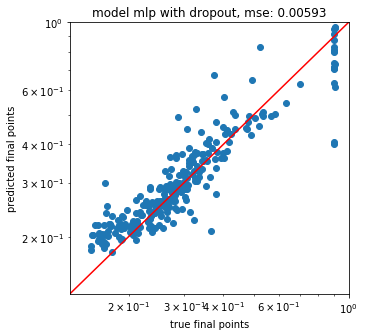

In [198]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_do = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, dropout=True)
t.scatter_plot(Y, res_mlp_do['y_preds'][0], 'mlp with dropout')

cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
evaluating with early stopping
create mlp using L1L2 regularisation
train fold 1 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.08864, storing weights.

Epoch 00002: val_loss improved from 0.08864 to 0.08346, storing weights.

Epoch 00003: val_loss improved from 0.08346 to 0.08315, storing weights.

Epoch 00004: val_loss improved from 0.08315 to 0.08297, storing weights.

Epoch 00005: val_loss improved from 0.08297 to 0.08224, storing weights.

Epoch 00006: val_loss is 0.08275, did not improve

Epoch 00007: val_loss improved from 0.08224 to 0.08080, storing weights.

Epoch 00008: val_loss improved from 0.08080 to 0.07997, storing weights.

Epoch 00009: val_loss improved from 0.07997 to 0.07986, storing weights.

Epoch 00010: val_loss improved from 0.07986 to 0.07833, storing we


Epoch 00118: val_loss is 0.02690, did not improve

Epoch 00119: val_loss improved from 0.02643 to 0.02623, storing weights.

Epoch 00120: val_loss improved from 0.02623 to 0.02600, storing weights.

Epoch 00121: val_loss improved from 0.02600 to 0.02585, storing weights.

Epoch 00122: val_loss improved from 0.02585 to 0.02573, storing weights.

Epoch 00123: val_loss is 0.02627, did not improve

Epoch 00124: val_loss improved from 0.02573 to 0.02564, storing weights.

Epoch 00125: val_loss is 0.02578, did not improve

Epoch 00126: val_loss is 0.02581, did not improve

Epoch 00127: val_loss is 0.02620, did not improve

Epoch 00128: val_loss improved from 0.02564 to 0.02512, storing weights.

Epoch 00129: val_loss is 0.02527, did not improve

Epoch 00130: val_loss improved from 0.02512 to 0.02486, storing weights.

Epoch 00131: val_loss is 0.02489, did not improve

Epoch 00132: val_loss improved from 0.02486 to 0.02460, storing weights.

Epoch 00133: val_loss is 0.02461, did not improve



Epoch 00248: val_loss improved from 0.01538 to 0.01534, storing weights.

Epoch 00249: val_loss is 0.01574, did not improve

Epoch 00250: val_loss improved from 0.01534 to 0.01521, storing weights.

Epoch 00251: val_loss improved from 0.01521 to 0.01513, storing weights.

Epoch 00252: val_loss is 0.01641, did not improve

Epoch 00253: val_loss is 0.01517, did not improve

Epoch 00254: val_loss improved from 0.01513 to 0.01501, storing weights.

Epoch 00255: val_loss is 0.01526, did not improve

Epoch 00256: val_loss improved from 0.01501 to 0.01499, storing weights.

Epoch 00257: val_loss is 0.01512, did not improve

Epoch 00258: val_loss is 0.01521, did not improve

Epoch 00259: val_loss is 0.01619, did not improve

Epoch 00260: val_loss improved from 0.01499 to 0.01490, storing weights.

Epoch 00261: val_loss improved from 0.01490 to 0.01487, storing weights.

Epoch 00262: val_loss improved from 0.01487 to 0.01475, storing weights.

Epoch 00263: val_loss improved from 0.01475 to 0.0


Epoch 00384: val_loss improved from 0.01179 to 0.01165, storing weights.

Epoch 00385: val_loss is 0.01167, did not improve

Epoch 00386: val_loss is 0.01218, did not improve

Epoch 00387: val_loss is 0.01250, did not improve

Epoch 00388: val_loss improved from 0.01165 to 0.01163, storing weights.

Epoch 00389: val_loss improved from 0.01163 to 0.01161, storing weights.

Epoch 00390: val_loss is 0.01216, did not improve

Epoch 00391: val_loss is 0.01162, did not improve

Epoch 00392: val_loss is 0.01166, did not improve

Epoch 00393: val_loss is 0.01187, did not improve

Epoch 00394: val_loss is 0.01179, did not improve

Epoch 00395: val_loss improved from 0.01161 to 0.01154, storing weights.

Epoch 00396: val_loss is 0.01196, did not improve

Epoch 00397: val_loss is 0.01198, did not improve

Epoch 00398: val_loss is 0.01161, did not improve

Epoch 00399: val_loss is 0.01221, did not improve

Epoch 00400: val_loss is 0.01162, did not improve

Epoch 00401: val_loss is 0.01321, did no


Epoch 00532: val_loss is 0.01067, did not improve

Epoch 00533: val_loss is 0.01067, did not improve

Epoch 00534: val_loss is 0.01071, did not improve

Epoch 00535: val_loss is 0.01126, did not improve

Epoch 00536: val_loss is 0.01140, did not improve

Epoch 00537: val_loss is 0.01087, did not improve

Epoch 00538: val_loss is 0.01070, did not improve

Epoch 00539: val_loss is 0.01080, did not improve

Epoch 00540: val_loss is 0.01247, did not improve

Epoch 00541: val_loss is 0.01062, did not improve

Epoch 00542: val_loss is 0.01063, did not improve

Epoch 00543: val_loss is 0.01075, did not improve

Epoch 00544: val_loss is 0.01077, did not improve

Epoch 00545: val_loss is 0.01099, did not improve

Epoch 00546: val_loss is 0.01063, did not improve

Epoch 00547: val_loss is 0.01063, did not improve

Epoch 00548: val_loss is 0.01125, did not improve

Epoch 00549: val_loss is 0.01089, did not improve

Epoch 00550: val_loss is 0.01063, did not improve

Epoch 00551: val_loss is 0.010


Epoch 00693: val_loss is 0.01061, did not improve

Epoch 00694: val_loss is 0.01057, did not improve

Epoch 00695: val_loss is 0.01150, did not improve

Epoch 00696: val_loss is 0.01168, did not improve

Epoch 00697: val_loss is 0.01151, did not improve

Epoch 00698: val_loss is 0.01064, did not improve

Epoch 00699: val_loss is 0.01074, did not improve

Epoch 00700: val_loss is 0.01062, did not improve

Epoch 00701: val_loss is 0.01072, did not improve

Epoch 00702: val_loss is 0.01194, did not improve

Epoch 00703: val_loss is 0.01083, did not improve

Epoch 00704: val_loss is 0.01075, did not improve

Epoch 00705: val_loss is 0.01075, did not improve

Epoch 00706: val_loss is 0.01239, did not improve

Epoch 00707: val_loss is 0.01062, did not improve
Epoch 00707: early stopping
Using epoch 00632 with val_loss: 0.01046
train fold 2 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.06741, storing weights.

Epoch 00002: val_loss improved from 0.06741 to 0


Epoch 00113: val_loss improved from 0.02342 to 0.02326, storing weights.

Epoch 00114: val_loss is 0.02372, did not improve

Epoch 00115: val_loss is 0.02601, did not improve

Epoch 00116: val_loss improved from 0.02326 to 0.02316, storing weights.

Epoch 00117: val_loss is 0.02337, did not improve

Epoch 00118: val_loss improved from 0.02316 to 0.02284, storing weights.

Epoch 00119: val_loss is 0.02388, did not improve

Epoch 00120: val_loss improved from 0.02284 to 0.02264, storing weights.

Epoch 00121: val_loss improved from 0.02264 to 0.02226, storing weights.

Epoch 00122: val_loss improved from 0.02226 to 0.02220, storing weights.

Epoch 00123: val_loss is 0.02309, did not improve

Epoch 00124: val_loss improved from 0.02220 to 0.02215, storing weights.

Epoch 00125: val_loss is 0.02229, did not improve

Epoch 00126: val_loss improved from 0.02215 to 0.02193, storing weights.

Epoch 00127: val_loss improved from 0.02193 to 0.02170, storing weights.

Epoch 00128: val_loss is 0.


Epoch 00255: val_loss is 0.01354, did not improve

Epoch 00256: val_loss improved from 0.01333 to 0.01326, storing weights.

Epoch 00257: val_loss improved from 0.01326 to 0.01316, storing weights.

Epoch 00258: val_loss is 0.04131, did not improve

Epoch 00259: val_loss is 0.01418, did not improve

Epoch 00260: val_loss is 0.01588, did not improve

Epoch 00261: val_loss is 0.01323, did not improve

Epoch 00262: val_loss is 0.01320, did not improve

Epoch 00263: val_loss is 0.01364, did not improve

Epoch 00264: val_loss is 0.01382, did not improve

Epoch 00265: val_loss improved from 0.01316 to 0.01299, storing weights.

Epoch 00266: val_loss improved from 0.01299 to 0.01297, storing weights.

Epoch 00267: val_loss is 0.01332, did not improve

Epoch 00268: val_loss is 0.01318, did not improve

Epoch 00269: val_loss is 0.01328, did not improve

Epoch 00270: val_loss is 0.01345, did not improve

Epoch 00271: val_loss is 0.01339, did not improve

Epoch 00272: val_loss is 0.01308, did no


Epoch 00409: val_loss is 0.01111, did not improve

Epoch 00410: val_loss is 0.01284, did not improve

Epoch 00411: val_loss is 0.01112, did not improve

Epoch 00412: val_loss is 0.01149, did not improve

Epoch 00413: val_loss is 0.01152, did not improve

Epoch 00414: val_loss is 0.01124, did not improve

Epoch 00415: val_loss is 0.01119, did not improve

Epoch 00416: val_loss is 0.01124, did not improve

Epoch 00417: val_loss is 0.01123, did not improve

Epoch 00418: val_loss is 0.01143, did not improve

Epoch 00419: val_loss is 0.01186, did not improve

Epoch 00420: val_loss is 0.01115, did not improve

Epoch 00421: val_loss is 0.01158, did not improve

Epoch 00422: val_loss is 0.01133, did not improve

Epoch 00423: val_loss is 0.01189, did not improve

Epoch 00424: val_loss is 0.01123, did not improve

Epoch 00425: val_loss is 0.01134, did not improve

Epoch 00426: val_loss is 0.01123, did not improve

Epoch 00427: val_loss is 0.01119, did not improve

Epoch 00428: val_loss is 0.011


Epoch 00097: val_loss is 0.02679, did not improve

Epoch 00098: val_loss is 0.02772, did not improve

Epoch 00099: val_loss improved from 0.02676 to 0.02604, storing weights.

Epoch 00100: val_loss is 0.02615, did not improve

Epoch 00101: val_loss is 0.02670, did not improve

Epoch 00102: val_loss improved from 0.02604 to 0.02598, storing weights.

Epoch 00103: val_loss is 0.02628, did not improve

Epoch 00104: val_loss improved from 0.02598 to 0.02555, storing weights.

Epoch 00105: val_loss is 0.02782, did not improve

Epoch 00106: val_loss improved from 0.02555 to 0.02532, storing weights.

Epoch 00107: val_loss is 0.02557, did not improve

Epoch 00108: val_loss is 0.02859, did not improve

Epoch 00109: val_loss improved from 0.02532 to 0.02502, storing weights.

Epoch 00110: val_loss is 0.02524, did not improve

Epoch 00111: val_loss is 0.02539, did not improve

Epoch 00112: val_loss improved from 0.02502 to 0.02449, storing weights.

Epoch 00113: val_loss is 0.03337, did not imp


Epoch 00240: val_loss is 0.01430, did not improve

Epoch 00241: val_loss is 0.01467, did not improve

Epoch 00242: val_loss is 0.01530, did not improve

Epoch 00243: val_loss is 0.01508, did not improve

Epoch 00244: val_loss is 0.01548, did not improve

Epoch 00245: val_loss is 0.01446, did not improve

Epoch 00246: val_loss is 0.01626, did not improve

Epoch 00247: val_loss is 0.01456, did not improve

Epoch 00248: val_loss is 0.01440, did not improve

Epoch 00249: val_loss is 0.01472, did not improve

Epoch 00250: val_loss improved from 0.01416 to 0.01388, storing weights.

Epoch 00251: val_loss is 0.01545, did not improve

Epoch 00252: val_loss is 0.01552, did not improve

Epoch 00253: val_loss is 0.01649, did not improve

Epoch 00254: val_loss improved from 0.01388 to 0.01370, storing weights.

Epoch 00255: val_loss improved from 0.01370 to 0.01358, storing weights.

Epoch 00256: val_loss is 0.01427, did not improve

Epoch 00257: val_loss improved from 0.01358 to 0.01334, storing


Epoch 00396: val_loss is 0.01193, did not improve

Epoch 00397: val_loss is 0.01162, did not improve

Epoch 00398: val_loss is 0.01122, did not improve

Epoch 00399: val_loss is 0.01159, did not improve

Epoch 00400: val_loss is 0.01098, did not improve

Epoch 00401: val_loss is 0.01169, did not improve

Epoch 00402: val_loss is 0.01194, did not improve

Epoch 00403: val_loss is 0.01163, did not improve

Epoch 00404: val_loss is 0.01167, did not improve

Epoch 00405: val_loss is 0.01145, did not improve

Epoch 00406: val_loss is 0.01145, did not improve

Epoch 00407: val_loss is 0.01161, did not improve

Epoch 00408: val_loss is 0.01213, did not improve

Epoch 00409: val_loss is 0.01158, did not improve

Epoch 00410: val_loss is 0.01342, did not improve

Epoch 00411: val_loss is 0.01113, did not improve

Epoch 00412: val_loss is 0.01184, did not improve

Epoch 00413: val_loss is 0.01164, did not improve

Epoch 00414: val_loss is 0.01248, did not improve

Epoch 00415: val_loss is 0.011

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


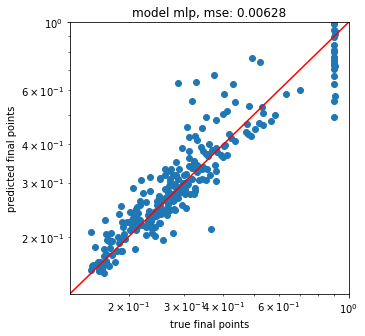

In [199]:
# cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'l1': 0.0005, 'l2': 0.0005} 
# config found by hyperband on L1L2 case
cfg = {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
res_mlp_l1l2 = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, L1L2=True)
t.scatter_plot(Y, res_mlp_l1l2['y_preds'][0], 'mlp L1L2')

path plots/mlp L1L2_sct.png


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


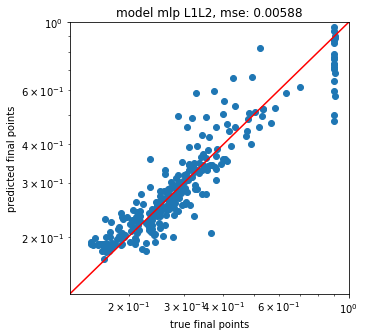

In [202]:
t.scatter_plot(Y, res_mlp_l1l2, 'mlp L1L2')

cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.2213474827989724, 'batch_size': 20, 'l2': 0.0005, 'l1': 0.0005}
evaluating with early stopping
create mlp using L1L2 regularisation
train fold 1 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.13878, storing weights.

Epoch 00002: val_loss improved from 0.13878 to 0.13441, storing weights.

Epoch 00003: val_loss improved from 0.13441 to 0.13311, storing weights.

Epoch 00004: val_loss improved from 0.13311 to 0.12898, storing weights.

Epoch 00005: val_loss improved from 0.12898 to 0.12612, storing weights.

Epoch 00006: val_loss improved from 0.12612 to 0.12332, storing weights.

Epoch 00007: val_loss improved from 0.12332 to 0.12179, storing weights.

Epoch 00008: val_loss improved from 0.12179 to 0.11723, storing weights.

Epoch 00009: val_loss improved from 0.11723 to 0.11458, storing weights.

Epoch 00010: val_loss improved from 0.11458 to 0.11094, storing weights.




Epoch 00124: val_loss is 0.01502, did not improve

Epoch 00125: val_loss improved from 0.01332 to 0.01315, storing weights.

Epoch 00126: val_loss improved from 0.01315 to 0.01315, storing weights.

Epoch 00127: val_loss is 0.01368, did not improve

Epoch 00128: val_loss is 0.01610, did not improve

Epoch 00129: val_loss is 0.01481, did not improve

Epoch 00130: val_loss is 0.01406, did not improve

Epoch 00131: val_loss is 0.01569, did not improve

Epoch 00132: val_loss improved from 0.01315 to 0.01286, storing weights.

Epoch 00133: val_loss is 0.01411, did not improve

Epoch 00134: val_loss is 0.01298, did not improve

Epoch 00135: val_loss is 0.01777, did not improve

Epoch 00136: val_loss is 0.01511, did not improve

Epoch 00137: val_loss is 0.01295, did not improve

Epoch 00138: val_loss is 0.01309, did not improve

Epoch 00139: val_loss is 0.02091, did not improve

Epoch 00140: val_loss is 0.01386, did not improve

Epoch 00141: val_loss improved from 0.01286 to 0.01257, storing


Epoch 00274: val_loss is 0.01152, did not improve

Epoch 00275: val_loss is 0.01142, did not improve

Epoch 00276: val_loss improved from 0.01110 to 0.01106, storing weights.

Epoch 00277: val_loss is 0.01165, did not improve

Epoch 00278: val_loss improved from 0.01106 to 0.01106, storing weights.

Epoch 00279: val_loss is 0.01113, did not improve

Epoch 00280: val_loss is 0.01275, did not improve

Epoch 00281: val_loss is 0.01394, did not improve

Epoch 00282: val_loss is 0.01115, did not improve

Epoch 00283: val_loss is 0.01118, did not improve

Epoch 00284: val_loss is 0.01124, did not improve

Epoch 00285: val_loss is 0.01604, did not improve

Epoch 00286: val_loss is 0.01129, did not improve

Epoch 00287: val_loss is 0.01278, did not improve

Epoch 00288: val_loss is 0.01349, did not improve

Epoch 00289: val_loss improved from 0.01106 to 0.01106, storing weights.

Epoch 00290: val_loss is 0.01300, did not improve

Epoch 00291: val_loss is 0.01204, did not improve

Epoch 00292:

train fold 2 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.12250, storing weights.

Epoch 00002: val_loss improved from 0.12250 to 0.11789, storing weights.

Epoch 00003: val_loss improved from 0.11789 to 0.11508, storing weights.

Epoch 00004: val_loss improved from 0.11508 to 0.11202, storing weights.

Epoch 00005: val_loss improved from 0.11202 to 0.10928, storing weights.

Epoch 00006: val_loss improved from 0.10928 to 0.10618, storing weights.

Epoch 00007: val_loss improved from 0.10618 to 0.10392, storing weights.

Epoch 00008: val_loss improved from 0.10392 to 0.10027, storing weights.

Epoch 00009: val_loss improved from 0.10027 to 0.09770, storing weights.

Epoch 00010: val_loss improved from 0.09770 to 0.09396, storing weights.

Epoch 00011: val_loss improved from 0.09396 to 0.09140, storing weights.

Epoch 00012: val_loss improved from 0.09140 to 0.08981, storing weights.

Epoch 00013: val_loss improved from 0.08981 to 0.08741, storing weig


Epoch 00125: val_loss improved from 0.01132 to 0.01121, storing weights.

Epoch 00126: val_loss is 0.01352, did not improve

Epoch 00127: val_loss is 0.01376, did not improve

Epoch 00128: val_loss is 0.01150, did not improve

Epoch 00129: val_loss is 0.01192, did not improve

Epoch 00130: val_loss is 0.01311, did not improve

Epoch 00131: val_loss is 0.01298, did not improve

Epoch 00132: val_loss improved from 0.01121 to 0.01099, storing weights.

Epoch 00133: val_loss is 0.01295, did not improve

Epoch 00134: val_loss is 0.01289, did not improve

Epoch 00135: val_loss is 0.01306, did not improve

Epoch 00136: val_loss is 0.01202, did not improve

Epoch 00137: val_loss improved from 0.01099 to 0.01086, storing weights.

Epoch 00138: val_loss is 0.01105, did not improve

Epoch 00139: val_loss is 0.01112, did not improve

Epoch 00140: val_loss is 0.01159, did not improve

Epoch 00141: val_loss improved from 0.01086 to 0.01063, storing weights.

Epoch 00142: val_loss is 0.01813, did no


Epoch 00283: val_loss is 0.01232, did not improve

Epoch 00284: val_loss is 0.01027, did not improve

Epoch 00285: val_loss is 0.01138, did not improve

Epoch 00286: val_loss is 0.01078, did not improve

Epoch 00287: val_loss is 0.01084, did not improve

Epoch 00288: val_loss is 0.01117, did not improve

Epoch 00289: val_loss is 0.01079, did not improve

Epoch 00290: val_loss is 0.01033, did not improve

Epoch 00291: val_loss is 0.01797, did not improve

Epoch 00292: val_loss is 0.01245, did not improve

Epoch 00293: val_loss is 0.01266, did not improve

Epoch 00294: val_loss is 0.01121, did not improve

Epoch 00295: val_loss is 0.01988, did not improve

Epoch 00296: val_loss is 0.01261, did not improve

Epoch 00297: val_loss is 0.01075, did not improve

Epoch 00298: val_loss is 0.01145, did not improve

Epoch 00299: val_loss is 0.01062, did not improve

Epoch 00300: val_loss is 0.01224, did not improve

Epoch 00301: val_loss is 0.01135, did not improve

Epoch 00302: val_loss is 0.013


Epoch 00038: val_loss improved from 0.04171 to 0.04092, storing weights.

Epoch 00039: val_loss improved from 0.04092 to 0.03992, storing weights.

Epoch 00040: val_loss improved from 0.03992 to 0.03974, storing weights.

Epoch 00041: val_loss improved from 0.03974 to 0.03969, storing weights.

Epoch 00042: val_loss improved from 0.03969 to 0.03732, storing weights.

Epoch 00043: val_loss is 0.03942, did not improve

Epoch 00044: val_loss improved from 0.03732 to 0.03666, storing weights.

Epoch 00045: val_loss improved from 0.03666 to 0.03535, storing weights.

Epoch 00046: val_loss improved from 0.03535 to 0.03395, storing weights.

Epoch 00047: val_loss improved from 0.03395 to 0.03266, storing weights.

Epoch 00048: val_loss improved from 0.03266 to 0.03244, storing weights.

Epoch 00049: val_loss improved from 0.03244 to 0.03143, storing weights.

Epoch 00050: val_loss improved from 0.03143 to 0.03022, storing weights.

Epoch 00051: val_loss improved from 0.03022 to 0.02944, stor


Epoch 00180: val_loss is 0.01209, did not improve

Epoch 00181: val_loss is 0.01296, did not improve

Epoch 00182: val_loss improved from 0.01162 to 0.01096, storing weights.

Epoch 00183: val_loss is 0.01303, did not improve

Epoch 00184: val_loss is 0.01215, did not improve

Epoch 00185: val_loss is 0.01176, did not improve

Epoch 00186: val_loss is 0.01169, did not improve

Epoch 00187: val_loss is 0.01267, did not improve

Epoch 00188: val_loss is 0.01258, did not improve

Epoch 00189: val_loss is 0.01389, did not improve

Epoch 00190: val_loss is 0.01280, did not improve

Epoch 00191: val_loss is 0.01286, did not improve

Epoch 00192: val_loss is 0.01322, did not improve

Epoch 00193: val_loss is 0.01332, did not improve

Epoch 00194: val_loss is 0.01180, did not improve

Epoch 00195: val_loss is 0.01108, did not improve

Epoch 00196: val_loss is 0.01248, did not improve

Epoch 00197: val_loss is 0.01179, did not improve

Epoch 00198: val_loss is 0.01629, did not improve

Epoch 0


Epoch 00339: val_loss improved from 0.01056 to 0.01036, storing weights.

Epoch 00340: val_loss is 0.01185, did not improve

Epoch 00341: val_loss is 0.01304, did not improve

Epoch 00342: val_loss is 0.01535, did not improve

Epoch 00343: val_loss is 0.01202, did not improve

Epoch 00344: val_loss is 0.01103, did not improve

Epoch 00345: val_loss is 0.01193, did not improve

Epoch 00346: val_loss is 0.01081, did not improve

Epoch 00347: val_loss is 0.01415, did not improve

Epoch 00348: val_loss is 0.01516, did not improve

Epoch 00349: val_loss is 0.01639, did not improve

Epoch 00350: val_loss is 0.01321, did not improve

Epoch 00351: val_loss is 0.01346, did not improve

Epoch 00352: val_loss is 0.01363, did not improve

Epoch 00353: val_loss is 0.01359, did not improve

Epoch 00354: val_loss is 0.01175, did not improve

Epoch 00355: val_loss is 0.01133, did not improve

Epoch 00356: val_loss is 0.01555, did not improve

Epoch 00357: val_loss is 0.01414, did not improve

Epoch 0


Epoch 00500: val_loss is 0.01102, did not improve

Epoch 00501: val_loss is 0.01612, did not improve

Epoch 00502: val_loss is 0.01158, did not improve

Epoch 00503: val_loss is 0.01206, did not improve

Epoch 00504: val_loss is 0.01018, did not improve

Epoch 00505: val_loss is 0.01118, did not improve

Epoch 00506: val_loss is 0.01007, did not improve

Epoch 00507: val_loss is 0.01108, did not improve

Epoch 00508: val_loss is 0.01069, did not improve

Epoch 00509: val_loss is 0.01041, did not improve

Epoch 00510: val_loss is 0.01438, did not improve

Epoch 00511: val_loss is 0.01219, did not improve

Epoch 00512: val_loss is 0.01236, did not improve

Epoch 00513: val_loss improved from 0.00950 to 0.00921, storing weights.

Epoch 00514: val_loss is 0.01202, did not improve

Epoch 00515: val_loss is 0.01327, did not improve

Epoch 00516: val_loss is 0.00951, did not improve

Epoch 00517: val_loss is 0.01057, did not improve

Epoch 00518: val_loss is 0.01817, did not improve

Epoch 0

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


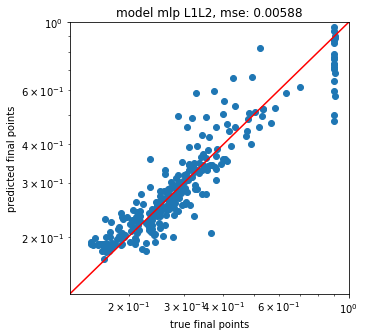

In [200]:
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'l1': 0.0005, 'l2': 0.0005} 
# config found by hyperband on L1L2 case
# cfg = {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
res_mlp_l1l2 = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, L1L2=True)
t.scatter_plot(Y, res_mlp_l1l2['y_preds'][0], 'mlp L1L2')

this mse mlp_500 0.00615437846885
this mse from list mlp_500 0.00615437846885
this mse earlystop 0.00568764191678
this mse from list earlystop 0.00568764191678
this mse dropout 0.00593283374683
this mse from list dropout 0.00593283374683
this mse l1l2 0.00588251943148
this mse from list l1l2 0.00588251943148
path plots/means of regularisation for mlp_sct.png


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


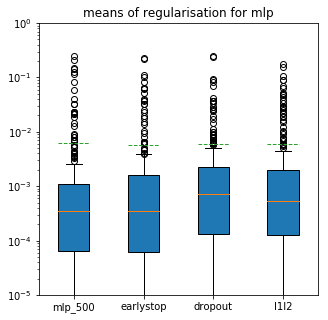

In [214]:
t.box_plot(Y, (5,5), [res_mlp_500, res_mlp_es, res_mlp_do, res_mlp_l1l2],
           ['mlp_500', 'earlystop', 'dropout', 'l1l2'], 'means of regularisation for mlp')

cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
evaluating with early stopping
evaluating with exponential decay
train fold 1 on 0 steps, validation on 0 steps
new lr:  0.221347482799

Epoch 00001: val_loss improved from inf to 0.04899, storing weights.

Epoch 00002: val_loss improved from 0.04899 to 0.04654, storing weights.

Epoch 00003: val_loss is 0.04964, did not improve

Epoch 00004: val_loss is 0.04700, did not improve

Epoch 00005: val_loss improved from 0.04654 to 0.04416, storing weights.

Epoch 00006: val_loss is 0.04463, did not improve

Epoch 00007: val_loss improved from 0.04416 to 0.04257, storing weights.

Epoch 00008: val_loss is 0.04594, did not improve

Epoch 00009: val_loss improved from 0.04257 to 0.04139, storing weights.

Epoch 00010: val_loss improved from 0.04139 to 0.04068, storing weights.

Epoch 00011: val_loss improved from 0.04068 to 0.03866, storing weig


Epoch 00133: val_loss is 0.00739, did not improve

Epoch 00134: val_loss is 0.00738, did not improve

Epoch 00135: val_loss is 0.00759, did not improve

Epoch 00136: val_loss is 0.00768, did not improve

Epoch 00137: val_loss is 0.00729, did not improve

Epoch 00138: val_loss is 0.00736, did not improve

Epoch 00139: val_loss is 0.00752, did not improve

Epoch 00140: val_loss is 0.00802, did not improve

Epoch 00141: val_loss improved from 0.00724 to 0.00721, storing weights.

Epoch 00142: val_loss is 0.00774, did not improve

Epoch 00143: val_loss is 0.00729, did not improve

Epoch 00144: val_loss improved from 0.00721 to 0.00717, storing weights.

Epoch 00145: val_loss is 0.00747, did not improve

Epoch 00146: val_loss is 0.00746, did not improve

Epoch 00147: val_loss is 0.00747, did not improve

Epoch 00148: val_loss is 0.00718, did not improve

Epoch 00149: val_loss is 0.00726, did not improve

Epoch 00150: val_loss is 0.00737, did not improve

Epoch 00151: val_loss is 0.00761, d


Epoch 00285: val_loss is 0.00680, did not improve

Epoch 00286: val_loss is 0.00678, did not improve

Epoch 00287: val_loss is 0.00683, did not improve

Epoch 00288: val_loss is 0.00670, did not improve

Epoch 00289: val_loss is 0.00693, did not improve

Epoch 00290: val_loss is 0.00672, did not improve

Epoch 00291: val_loss improved from 0.00669 to 0.00668, storing weights.

Epoch 00292: val_loss is 0.00674, did not improve

Epoch 00293: val_loss is 0.00671, did not improve

Epoch 00294: val_loss is 0.00676, did not improve

Epoch 00295: val_loss is 0.00669, did not improve

Epoch 00296: val_loss is 0.00676, did not improve

Epoch 00297: val_loss is 0.00684, did not improve

Epoch 00298: val_loss is 0.00676, did not improve

Epoch 00299: val_loss is 0.00672, did not improve

Epoch 00300: val_loss is 0.00670, did not improve
new lr:  0.048749254134

Epoch 00301: val_loss is 0.00675, did not improve

Epoch 00302: val_loss improved from 0.00668 to 0.00668, storing weights.

Epoch 00303


Epoch 00441: val_loss is 0.00656, did not improve

Epoch 00442: val_loss improved from 0.00654 to 0.00652, storing weights.

Epoch 00443: val_loss is 0.00654, did not improve

Epoch 00444: val_loss is 0.00656, did not improve

Epoch 00445: val_loss is 0.00654, did not improve

Epoch 00446: val_loss is 0.00653, did not improve

Epoch 00447: val_loss is 0.00652, did not improve

Epoch 00448: val_loss is 0.00653, did not improve

Epoch 00449: val_loss is 0.00655, did not improve

Epoch 00450: val_loss improved from 0.00652 to 0.00651, storing weights.

Epoch 00451: val_loss improved from 0.00651 to 0.00649, storing weights.

Epoch 00452: val_loss is 0.00651, did not improve

Epoch 00453: val_loss is 0.00652, did not improve

Epoch 00454: val_loss is 0.00657, did not improve

Epoch 00455: val_loss is 0.00653, did not improve

Epoch 00456: val_loss is 0.00653, did not improve

Epoch 00457: val_loss is 0.00655, did not improve

Epoch 00458: val_loss is 0.00654, did not improve

Epoch 00459:


Epoch 00599: val_loss is 0.00644, did not improve

Epoch 00600: val_loss is 0.00644, did not improve
new lr:  0.0107364662501

Epoch 00601: val_loss is 0.00644, did not improve

Epoch 00602: val_loss is 0.00643, did not improve

Epoch 00603: val_loss is 0.00644, did not improve

Epoch 00604: val_loss is 0.00644, did not improve

Epoch 00605: val_loss is 0.00644, did not improve

Epoch 00606: val_loss improved from 0.00643 to 0.00643, storing weights.

Epoch 00607: val_loss improved from 0.00643 to 0.00642, storing weights.

Epoch 00608: val_loss is 0.00642, did not improve

Epoch 00609: val_loss is 0.00643, did not improve

Epoch 00610: val_loss is 0.00644, did not improve

Epoch 00611: val_loss is 0.00643, did not improve

Epoch 00612: val_loss is 0.00644, did not improve

Epoch 00613: val_loss is 0.00642, did not improve

Epoch 00614: val_loss is 0.00642, did not improve

Epoch 00615: val_loss is 0.00642, did not improve

Epoch 00616: val_loss improved from 0.00642 to 0.00641, stori


Epoch 00045: val_loss is 0.00821, did not improve

Epoch 00046: val_loss improved from 0.00801 to 0.00776, storing weights.

Epoch 00047: val_loss improved from 0.00776 to 0.00774, storing weights.

Epoch 00048: val_loss is 0.00800, did not improve

Epoch 00049: val_loss improved from 0.00774 to 0.00771, storing weights.

Epoch 00050: val_loss is 0.00937, did not improve

Epoch 00051: val_loss improved from 0.00771 to 0.00766, storing weights.

Epoch 00052: val_loss improved from 0.00766 to 0.00745, storing weights.

Epoch 00053: val_loss is 0.00761, did not improve

Epoch 00054: val_loss is 0.00748, did not improve

Epoch 00055: val_loss improved from 0.00745 to 0.00744, storing weights.

Epoch 00056: val_loss improved from 0.00744 to 0.00734, storing weights.

Epoch 00057: val_loss is 0.00743, did not improve

Epoch 00058: val_loss improved from 0.00734 to 0.00733, storing weights.

Epoch 00059: val_loss is 0.00827, did not improve

Epoch 00060: val_loss is 0.00750, did not improve



Epoch 00197: val_loss is 0.00632, did not improve

Epoch 00198: val_loss improved from 0.00630 to 0.00621, storing weights.

Epoch 00199: val_loss is 0.00630, did not improve

Epoch 00200: val_loss is 0.00628, did not improve
new lr:  0.0807241559483

Epoch 00201: val_loss is 0.00622, did not improve

Epoch 00202: val_loss is 0.00654, did not improve

Epoch 00203: val_loss is 0.00627, did not improve

Epoch 00204: val_loss improved from 0.00621 to 0.00620, storing weights.

Epoch 00205: val_loss is 0.00623, did not improve

Epoch 00206: val_loss is 0.00631, did not improve

Epoch 00207: val_loss is 0.00628, did not improve

Epoch 00208: val_loss is 0.00640, did not improve

Epoch 00209: val_loss is 0.00624, did not improve

Epoch 00210: val_loss is 0.00629, did not improve

Epoch 00211: val_loss is 0.00627, did not improve

Epoch 00212: val_loss improved from 0.00620 to 0.00620, storing weights.

Epoch 00213: val_loss improved from 0.00620 to 0.00619, storing weights.

Epoch 00214: va


Epoch 00349: val_loss is 0.00579, did not improve

Epoch 00350: val_loss is 0.00582, did not improve

Epoch 00351: val_loss improved from 0.00576 to 0.00574, storing weights.

Epoch 00352: val_loss is 0.00575, did not improve

Epoch 00353: val_loss is 0.00574, did not improve

Epoch 00354: val_loss is 0.00574, did not improve

Epoch 00355: val_loss is 0.00574, did not improve

Epoch 00356: val_loss is 0.00575, did not improve

Epoch 00357: val_loss is 0.00579, did not improve

Epoch 00358: val_loss is 0.00578, did not improve

Epoch 00359: val_loss improved from 0.00574 to 0.00573, storing weights.

Epoch 00360: val_loss is 0.00577, did not improve

Epoch 00361: val_loss improved from 0.00573 to 0.00572, storing weights.

Epoch 00362: val_loss is 0.00579, did not improve

Epoch 00363: val_loss is 0.00576, did not improve

Epoch 00364: val_loss is 0.00572, did not improve

Epoch 00365: val_loss is 0.00578, did not improve

Epoch 00366: val_loss is 0.00577, did not improve

Epoch 00367:


Epoch 00504: val_loss is 0.00559, did not improve

Epoch 00505: val_loss is 0.00561, did not improve

Epoch 00506: val_loss is 0.00560, did not improve

Epoch 00507: val_loss is 0.00561, did not improve

Epoch 00508: val_loss is 0.00562, did not improve

Epoch 00509: val_loss is 0.00561, did not improve

Epoch 00510: val_loss is 0.00560, did not improve

Epoch 00511: val_loss is 0.00561, did not improve

Epoch 00512: val_loss is 0.00558, did not improve

Epoch 00513: val_loss is 0.00559, did not improve

Epoch 00514: val_loss is 0.00558, did not improve

Epoch 00515: val_loss is 0.00558, did not improve

Epoch 00516: val_loss is 0.00559, did not improve

Epoch 00517: val_loss is 0.00558, did not improve

Epoch 00518: val_loss is 0.00558, did not improve

Epoch 00519: val_loss improved from 0.00558 to 0.00557, storing weights.

Epoch 00520: val_loss is 0.00558, did not improve

Epoch 00521: val_loss is 0.00557, did not improve

Epoch 00522: val_loss is 0.00559, did not improve

Epoch 0


Epoch 00659: val_loss improved from 0.00550 to 0.00550, storing weights.

Epoch 00660: val_loss is 0.00551, did not improve

Epoch 00661: val_loss is 0.00552, did not improve

Epoch 00662: val_loss is 0.00552, did not improve

Epoch 00663: val_loss is 0.00552, did not improve

Epoch 00664: val_loss is 0.00551, did not improve

Epoch 00665: val_loss is 0.00551, did not improve

Epoch 00666: val_loss is 0.00551, did not improve

Epoch 00667: val_loss is 0.00551, did not improve

Epoch 00668: val_loss is 0.00550, did not improve

Epoch 00669: val_loss is 0.00550, did not improve

Epoch 00670: val_loss is 0.00551, did not improve

Epoch 00671: val_loss is 0.00551, did not improve

Epoch 00672: val_loss is 0.00552, did not improve

Epoch 00673: val_loss is 0.00552, did not improve

Epoch 00674: val_loss is 0.00551, did not improve

Epoch 00675: val_loss is 0.00551, did not improve

Epoch 00676: val_loss is 0.00551, did not improve

Epoch 00677: val_loss is 0.00551, did not improve

Epoch 0


Epoch 00815: val_loss is 0.00548, did not improve

Epoch 00816: val_loss is 0.00548, did not improve

Epoch 00817: val_loss is 0.00549, did not improve

Epoch 00818: val_loss is 0.00549, did not improve

Epoch 00819: val_loss is 0.00549, did not improve

Epoch 00820: val_loss is 0.00548, did not improve

Epoch 00821: val_loss is 0.00549, did not improve

Epoch 00822: val_loss is 0.00549, did not improve

Epoch 00823: val_loss is 0.00548, did not improve

Epoch 00824: val_loss is 0.00548, did not improve

Epoch 00825: val_loss is 0.00548, did not improve
Epoch 00825: early stopping
Using epoch 00800 with val_loss: 0.00548
train fold 3 on 0 steps, validation on 0 steps
new lr:  0.221347482799

Epoch 00001: val_loss improved from inf to 0.02643, storing weights.

Epoch 00002: val_loss improved from 0.02643 to 0.02582, storing weights.

Epoch 00003: val_loss improved from 0.02582 to 0.02525, storing weights.

Epoch 00004: val_loss is 0.02621, did not improve

Epoch 00005: val_loss improve


Epoch 00130: val_loss is 0.00637, did not improve

Epoch 00131: val_loss is 0.00689, did not improve

Epoch 00132: val_loss is 0.00632, did not improve

Epoch 00133: val_loss is 0.00603, did not improve

Epoch 00134: val_loss is 0.00627, did not improve

Epoch 00135: val_loss is 0.00686, did not improve

Epoch 00136: val_loss is 0.00604, did not improve

Epoch 00137: val_loss is 0.00690, did not improve

Epoch 00138: val_loss is 0.00653, did not improve

Epoch 00139: val_loss is 0.00606, did not improve

Epoch 00140: val_loss is 0.00721, did not improve

Epoch 00141: val_loss is 0.00610, did not improve

Epoch 00142: val_loss is 0.00633, did not improve

Epoch 00143: val_loss is 0.00727, did not improve

Epoch 00144: val_loss is 0.00626, did not improve

Epoch 00145: val_loss is 0.00620, did not improve

Epoch 00146: val_loss is 0.00634, did not improve

Epoch 00147: val_loss is 0.00621, did not improve

Epoch 00148: val_loss improved from 0.00599 to 0.00584, storing weights.

Epoch 0

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


TypeError: box_plot() missing 1 required positional argument: 'title'

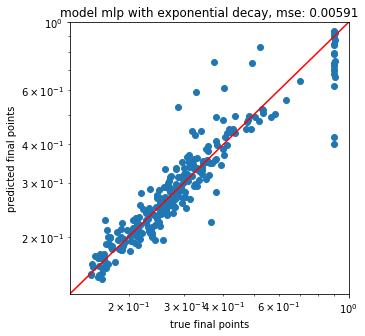

In [215]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928} 
res_mlp_ed = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, lr_exp_decay=True)
t.scatter_plot(Y, res_mlp_ed['y_preds'][0], 'mlp with exponential decay')
t.box_plot(Y, (5,5), [res_mlp_es, res_mlp_ed],
           ['lr 0.22', 'exponential decay'], 'with and without exponential decay')

In [127]:
# run all non rnn tasks and save results
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_500 = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=500, splits = 3, earlystop=False) 
t.pickle_to_file(res_mlp_500, 'res_mlp_500')

cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_es = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True)
t.pickle_to_file(res_mlp_es, 'res_mlp_es')

cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res_mlp_do = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, dropout=True)
t.pickle_to_file(res_mlp_do, 'res_mlp_do')

cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'l1': 0.0005, 'l2': 0.0005} 
# config found by hyperband on L1L2 case
# cfg = {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
res_mlp_l1l2 = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, L1L2=True)
t.pickle_to_file(res_mlp_l1l2, 'res_mlp_l1l2')

cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928} 
res_mlp_ed = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, lr_exp_decay=True)
t.pickle_to_file(res_mlp_ed, 'res_mlp_ed')

cross validate 500 epochs, train on 0 steps, validate on [0] steps
config {'batch_size': 20, 'lr': 0.2213474827989724}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.00571] ***
Results validation data of all Folds: 
[[ 0.00634]
 [ 0.00556]
 [ 0.00521]]
MSE on train data on [0] steps: means over folds: *** [ 0.00071] ***
Results training data of all Folds: 
[[ 0.00016]
 [ 0.00126]
 [ 0.00071]]
mse over all validation data 0.00570752794309
cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'batch_size': 20, 'lr': 0.2213474827989724}
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps

Epoch 00001: val_loss improved from inf to 0.04766, storing weights.

Epoch 00002: val_loss is 0.04898, did not improve

Epoch 00003: val_loss improved from 0.04766 to 0.04554, storing weights.

Epoch 0


Epoch 00132: val_loss improved from 0.00722 to 0.00715, storing weights.

Epoch 00133: val_loss is 0.01185, did not improve

Epoch 00134: val_loss is 0.00800, did not improve

Epoch 00135: val_loss is 0.00740, did not improve

Epoch 00136: val_loss is 0.00733, did not improve

Epoch 00137: val_loss improved from 0.00715 to 0.00714, storing weights.

Epoch 00138: val_loss improved from 0.00714 to 0.00713, storing weights.

Epoch 00139: val_loss is 0.00742, did not improve

Epoch 00140: val_loss is 0.00951, did not improve

Epoch 00141: val_loss is 0.00724, did not improve

Epoch 00142: val_loss is 0.00724, did not improve

Epoch 00143: val_loss is 0.00787, did not improve

Epoch 00144: val_loss is 0.00938, did not improve

Epoch 00145: val_loss is 0.00818, did not improve

Epoch 00146: val_loss is 0.00764, did not improve

Epoch 00147: val_loss is 0.00776, did not improve

Epoch 00148: val_loss is 0.00742, did not improve

Epoch 00149: val_loss is 0.00717, did not improve

Epoch 00150:


Epoch 00015: val_loss improved from 0.01639 to 0.01483, storing weights.

Epoch 00016: val_loss improved from 0.01483 to 0.01430, storing weights.

Epoch 00017: val_loss improved from 0.01430 to 0.01317, storing weights.

Epoch 00018: val_loss is 0.01348, did not improve

Epoch 00019: val_loss improved from 0.01317 to 0.01165, storing weights.

Epoch 00020: val_loss improved from 0.01165 to 0.01109, storing weights.

Epoch 00021: val_loss improved from 0.01109 to 0.01091, storing weights.

Epoch 00022: val_loss improved from 0.01091 to 0.00993, storing weights.

Epoch 00023: val_loss is 0.01050, did not improve

Epoch 00024: val_loss improved from 0.00993 to 0.00930, storing weights.

Epoch 00025: val_loss improved from 0.00930 to 0.00877, storing weights.

Epoch 00026: val_loss is 0.00882, did not improve

Epoch 00027: val_loss improved from 0.00877 to 0.00822, storing weights.

Epoch 00028: val_loss improved from 0.00822 to 0.00814, storing weights.

Epoch 00029: val_loss improved f


Epoch 00168: val_loss improved from 0.00543 to 0.00533, storing weights.

Epoch 00169: val_loss is 0.00612, did not improve

Epoch 00170: val_loss is 0.00582, did not improve

Epoch 00171: val_loss is 0.00560, did not improve

Epoch 00172: val_loss is 0.00615, did not improve

Epoch 00173: val_loss is 0.00637, did not improve

Epoch 00174: val_loss is 0.00579, did not improve

Epoch 00175: val_loss is 0.00574, did not improve

Epoch 00176: val_loss is 0.00657, did not improve

Epoch 00177: val_loss is 0.00585, did not improve

Epoch 00178: val_loss is 0.00549, did not improve

Epoch 00179: val_loss is 0.00561, did not improve

Epoch 00180: val_loss improved from 0.00533 to 0.00520, storing weights.

Epoch 00181: val_loss is 0.00548, did not improve

Epoch 00182: val_loss improved from 0.00520 to 0.00519, storing weights.

Epoch 00183: val_loss is 0.00533, did not improve

Epoch 00184: val_loss is 0.00555, did not improve

Epoch 00185: val_loss is 0.00608, did not improve

Epoch 00186:


Epoch 00328: val_loss is 0.00501, did not improve

Epoch 00329: val_loss is 0.00497, did not improve

Epoch 00330: val_loss is 0.00588, did not improve

Epoch 00331: val_loss is 0.00480, did not improve

Epoch 00332: val_loss is 0.00549, did not improve

Epoch 00333: val_loss is 0.00630, did not improve

Epoch 00334: val_loss is 0.00474, did not improve

Epoch 00335: val_loss is 0.00536, did not improve

Epoch 00336: val_loss is 0.00490, did not improve

Epoch 00337: val_loss is 0.00491, did not improve

Epoch 00338: val_loss is 0.00469, did not improve

Epoch 00339: val_loss is 0.00469, did not improve

Epoch 00340: val_loss is 0.00462, did not improve

Epoch 00341: val_loss is 0.00524, did not improve

Epoch 00342: val_loss is 0.00641, did not improve

Epoch 00343: val_loss is 0.00496, did not improve

Epoch 00344: val_loss is 0.00520, did not improve

Epoch 00345: val_loss is 0.00769, did not improve

Epoch 00346: val_loss is 0.00559, did not improve

Epoch 00347: val_loss is 0.005


Epoch 00114: val_loss is 0.00598, did not improve

Epoch 00115: val_loss is 0.00603, did not improve

Epoch 00116: val_loss is 0.00741, did not improve

Epoch 00117: val_loss is 0.00640, did not improve

Epoch 00118: val_loss is 0.00623, did not improve

Epoch 00119: val_loss is 0.00628, did not improve

Epoch 00120: val_loss is 0.01058, did not improve

Epoch 00121: val_loss is 0.00743, did not improve

Epoch 00122: val_loss is 0.00655, did not improve

Epoch 00123: val_loss is 0.00639, did not improve

Epoch 00124: val_loss is 0.00689, did not improve

Epoch 00125: val_loss is 0.00603, did not improve

Epoch 00126: val_loss is 0.00800, did not improve

Epoch 00127: val_loss is 0.00756, did not improve

Epoch 00128: val_loss is 0.00763, did not improve

Epoch 00129: val_loss is 0.00708, did not improve

Epoch 00130: val_loss is 0.00625, did not improve

Epoch 00131: val_loss is 0.00588, did not improve

Epoch 00132: val_loss is 0.00598, did not improve

Epoch 00133: val_loss improved


Epoch 00272: val_loss is 0.00576, did not improve

Epoch 00273: val_loss is 0.00517, did not improve

Epoch 00274: val_loss is 0.00548, did not improve

Epoch 00275: val_loss is 0.00621, did not improve

Epoch 00276: val_loss is 0.00561, did not improve

Epoch 00277: val_loss is 0.00626, did not improve

Epoch 00278: val_loss is 0.00480, did not improve

Epoch 00279: val_loss is 0.00564, did not improve

Epoch 00280: val_loss is 0.00552, did not improve

Epoch 00281: val_loss is 0.00608, did not improve
Epoch 00281: early stopping
Using epoch 00206 with val_loss: 0.00447
MSE on validation data on [0] steps: means over folds: *** [ 0.00526] ***
Results validation data of all Folds: 
[[ 0.00683]
 [ 0.00448]
 [ 0.00447]]
MSE on train data on [0] steps: means over folds: *** [ 0.00184] ***
Results training data of all Folds: 
[[ 0.00209]
 [ 0.00158]
 [ 0.00184]]
mse over all validation data 0.00526659897434
cross validate 1000 epochs, train on 0 steps, validate on [0] steps
config {'batch


Epoch 00122: val_loss improved from 0.00729 to 0.00726, storing weights.

Epoch 00123: val_loss is 0.00763, did not improve

Epoch 00124: val_loss is 0.00733, did not improve

Epoch 00125: val_loss is 0.01001, did not improve

Epoch 00126: val_loss is 0.00873, did not improve

Epoch 00127: val_loss is 0.00790, did not improve

Epoch 00128: val_loss is 0.00756, did not improve

Epoch 00129: val_loss is 0.00927, did not improve

Epoch 00130: val_loss is 0.00785, did not improve

Epoch 00131: val_loss is 0.00915, did not improve

Epoch 00132: val_loss is 0.00965, did not improve

Epoch 00133: val_loss is 0.00769, did not improve

Epoch 00134: val_loss is 0.00740, did not improve

Epoch 00135: val_loss is 0.00831, did not improve

Epoch 00136: val_loss is 0.00772, did not improve

Epoch 00137: val_loss is 0.00797, did not improve

Epoch 00138: val_loss is 0.00737, did not improve

Epoch 00139: val_loss is 0.00810, did not improve

Epoch 00140: val_loss is 0.00805, did not improve

Epoch 0


Epoch 00283: val_loss is 0.00767, did not improve

Epoch 00284: val_loss is 0.00774, did not improve

Epoch 00285: val_loss is 0.00839, did not improve

Epoch 00286: val_loss is 0.00734, did not improve

Epoch 00287: val_loss is 0.00832, did not improve

Epoch 00288: val_loss is 0.00813, did not improve

Epoch 00289: val_loss is 0.00731, did not improve

Epoch 00290: val_loss is 0.00732, did not improve

Epoch 00291: val_loss is 0.01031, did not improve

Epoch 00292: val_loss is 0.00879, did not improve

Epoch 00293: val_loss is 0.00834, did not improve

Epoch 00294: val_loss is 0.00707, did not improve

Epoch 00295: val_loss is 0.00959, did not improve

Epoch 00296: val_loss is 0.00752, did not improve

Epoch 00297: val_loss is 0.00900, did not improve

Epoch 00298: val_loss improved from 0.00697 to 0.00689, storing weights.

Epoch 00299: val_loss is 0.00786, did not improve

Epoch 00300: val_loss is 0.00909, did not improve

Epoch 00301: val_loss is 0.00777, did not improve

Epoch 0


Epoch 00015: val_loss improved from 0.01635 to 0.01591, storing weights.

Epoch 00016: val_loss is 0.02016, did not improve

Epoch 00017: val_loss improved from 0.01591 to 0.01352, storing weights.

Epoch 00018: val_loss improved from 0.01352 to 0.01320, storing weights.

Epoch 00019: val_loss is 0.01375, did not improve

Epoch 00020: val_loss improved from 0.01320 to 0.01196, storing weights.

Epoch 00021: val_loss improved from 0.01196 to 0.01138, storing weights.

Epoch 00022: val_loss improved from 0.01138 to 0.01095, storing weights.

Epoch 00023: val_loss improved from 0.01095 to 0.01089, storing weights.

Epoch 00024: val_loss is 0.01298, did not improve

Epoch 00025: val_loss improved from 0.01089 to 0.01000, storing weights.

Epoch 00026: val_loss improved from 0.01000 to 0.00983, storing weights.

Epoch 00027: val_loss is 0.01058, did not improve

Epoch 00028: val_loss is 0.01136, did not improve

Epoch 00029: val_loss improved from 0.00983 to 0.00923, storing weights.

Epoc


Epoch 00166: val_loss improved from 0.00517 to 0.00514, storing weights.

Epoch 00167: val_loss is 0.00552, did not improve

Epoch 00168: val_loss is 0.00602, did not improve

Epoch 00169: val_loss is 0.00534, did not improve

Epoch 00170: val_loss is 0.00515, did not improve

Epoch 00171: val_loss improved from 0.00514 to 0.00508, storing weights.

Epoch 00172: val_loss is 0.00529, did not improve

Epoch 00173: val_loss is 0.00584, did not improve

Epoch 00174: val_loss is 0.00545, did not improve

Epoch 00175: val_loss is 0.00559, did not improve

Epoch 00176: val_loss is 0.00575, did not improve

Epoch 00177: val_loss is 0.00614, did not improve

Epoch 00178: val_loss is 0.00611, did not improve

Epoch 00179: val_loss is 0.01023, did not improve

Epoch 00180: val_loss is 0.00622, did not improve

Epoch 00181: val_loss is 0.00679, did not improve

Epoch 00182: val_loss is 0.00637, did not improve

Epoch 00183: val_loss is 0.00755, did not improve

Epoch 00184: val_loss is 0.00565, d


Epoch 00067: val_loss is 0.00769, did not improve

Epoch 00068: val_loss is 0.00731, did not improve

Epoch 00069: val_loss improved from 0.00679 to 0.00658, storing weights.

Epoch 00070: val_loss is 0.00876, did not improve

Epoch 00071: val_loss improved from 0.00658 to 0.00646, storing weights.

Epoch 00072: val_loss is 0.00675, did not improve

Epoch 00073: val_loss is 0.00729, did not improve

Epoch 00074: val_loss is 0.00837, did not improve

Epoch 00075: val_loss is 0.00745, did not improve

Epoch 00076: val_loss is 0.00983, did not improve

Epoch 00077: val_loss is 0.00705, did not improve

Epoch 00078: val_loss is 0.00672, did not improve

Epoch 00079: val_loss is 0.00709, did not improve

Epoch 00080: val_loss is 0.00666, did not improve

Epoch 00081: val_loss is 0.01012, did not improve

Epoch 00082: val_loss is 0.00830, did not improve

Epoch 00083: val_loss is 0.00767, did not improve

Epoch 00084: val_loss is 0.00701, did not improve

Epoch 00085: val_loss is 0.00811, d


Epoch 00227: val_loss is 0.00703, did not improve

Epoch 00228: val_loss is 0.00677, did not improve

Epoch 00229: val_loss is 0.00607, did not improve

Epoch 00230: val_loss is 0.00554, did not improve

Epoch 00231: val_loss is 0.00661, did not improve

Epoch 00232: val_loss is 0.00640, did not improve

Epoch 00233: val_loss is 0.00806, did not improve

Epoch 00234: val_loss is 0.00544, did not improve

Epoch 00235: val_loss is 0.00740, did not improve

Epoch 00236: val_loss improved from 0.00524 to 0.00516, storing weights.

Epoch 00237: val_loss is 0.00799, did not improve

Epoch 00238: val_loss is 0.00761, did not improve

Epoch 00239: val_loss is 0.00651, did not improve

Epoch 00240: val_loss is 0.00592, did not improve

Epoch 00241: val_loss is 0.00703, did not improve

Epoch 00242: val_loss is 0.00619, did not improve

Epoch 00243: val_loss is 0.00582, did not improve

Epoch 00244: val_loss is 0.00550, did not improve

Epoch 00245: val_loss is 0.00628, did not improve

Epoch 0


Epoch 00047: val_loss improved from 0.03807 to 0.03566, storing weights.

Epoch 00048: val_loss improved from 0.03566 to 0.03487, storing weights.

Epoch 00049: val_loss is 0.03771, did not improve

Epoch 00050: val_loss improved from 0.03487 to 0.03314, storing weights.

Epoch 00051: val_loss improved from 0.03314 to 0.03230, storing weights.

Epoch 00052: val_loss improved from 0.03230 to 0.03120, storing weights.

Epoch 00053: val_loss improved from 0.03120 to 0.03049, storing weights.

Epoch 00054: val_loss improved from 0.03049 to 0.02987, storing weights.

Epoch 00055: val_loss improved from 0.02987 to 0.02946, storing weights.

Epoch 00056: val_loss improved from 0.02946 to 0.02929, storing weights.

Epoch 00057: val_loss improved from 0.02929 to 0.02807, storing weights.

Epoch 00058: val_loss is 0.02815, did not improve

Epoch 00059: val_loss improved from 0.02807 to 0.02663, storing weights.

Epoch 00060: val_loss improved from 0.02663 to 0.02655, storing weights.

Epoch 000


Epoch 00185: val_loss is 0.01225, did not improve

Epoch 00186: val_loss is 0.01314, did not improve

Epoch 00187: val_loss improved from 0.01191 to 0.01160, storing weights.

Epoch 00188: val_loss is 0.01449, did not improve

Epoch 00189: val_loss is 0.01189, did not improve

Epoch 00190: val_loss is 0.01583, did not improve

Epoch 00191: val_loss improved from 0.01160 to 0.01150, storing weights.

Epoch 00192: val_loss is 0.01151, did not improve

Epoch 00193: val_loss is 0.01151, did not improve

Epoch 00194: val_loss is 0.01212, did not improve

Epoch 00195: val_loss is 0.01396, did not improve

Epoch 00196: val_loss is 0.01213, did not improve

Epoch 00197: val_loss is 0.01158, did not improve

Epoch 00198: val_loss improved from 0.01150 to 0.01146, storing weights.

Epoch 00199: val_loss is 0.01240, did not improve

Epoch 00200: val_loss is 0.01173, did not improve

Epoch 00201: val_loss is 0.01229, did not improve

Epoch 00202: val_loss improved from 0.01146 to 0.01142, storing


Epoch 00341: val_loss is 0.01070, did not improve

Epoch 00342: val_loss is 0.01055, did not improve

Epoch 00343: val_loss is 0.01104, did not improve

Epoch 00344: val_loss is 0.01060, did not improve

Epoch 00345: val_loss is 0.01234, did not improve

Epoch 00346: val_loss is 0.01065, did not improve

Epoch 00347: val_loss is 0.01071, did not improve

Epoch 00348: val_loss is 0.01391, did not improve

Epoch 00349: val_loss is 0.01095, did not improve

Epoch 00350: val_loss is 0.01067, did not improve

Epoch 00351: val_loss is 0.01056, did not improve

Epoch 00352: val_loss is 0.01052, did not improve

Epoch 00353: val_loss is 0.01085, did not improve

Epoch 00354: val_loss is 0.01261, did not improve

Epoch 00355: val_loss improved from 0.01050 to 0.01050, storing weights.

Epoch 00356: val_loss improved from 0.01050 to 0.01049, storing weights.

Epoch 00357: val_loss is 0.01250, did not improve

Epoch 00358: val_loss is 0.01948, did not improve

Epoch 00359: val_loss is 0.01076, d


Epoch 00501: val_loss is 0.01122, did not improve

Epoch 00502: val_loss is 0.01039, did not improve

Epoch 00503: val_loss is 0.01060, did not improve

Epoch 00504: val_loss is 0.01187, did not improve

Epoch 00505: val_loss is 0.01125, did not improve

Epoch 00506: val_loss improved from 0.01030 to 0.01030, storing weights.

Epoch 00507: val_loss is 0.01350, did not improve

Epoch 00508: val_loss is 0.01071, did not improve

Epoch 00509: val_loss is 0.01226, did not improve

Epoch 00510: val_loss is 0.01109, did not improve

Epoch 00511: val_loss is 0.01076, did not improve

Epoch 00512: val_loss is 0.01747, did not improve

Epoch 00513: val_loss is 0.01050, did not improve

Epoch 00514: val_loss is 0.01031, did not improve

Epoch 00515: val_loss is 0.01062, did not improve

Epoch 00516: val_loss is 0.01038, did not improve

Epoch 00517: val_loss is 0.01066, did not improve
Epoch 00517: early stopping
Using epoch 00506 with val_loss: 0.01030
train fold 2 on 0 steps, validation on 0 


Epoch 00108: val_loss is 0.01299, did not improve

Epoch 00109: val_loss is 0.01430, did not improve

Epoch 00110: val_loss is 0.01314, did not improve

Epoch 00111: val_loss improved from 0.01260 to 0.01222, storing weights.

Epoch 00112: val_loss is 0.01241, did not improve

Epoch 00113: val_loss is 0.01260, did not improve

Epoch 00114: val_loss improved from 0.01222 to 0.01214, storing weights.

Epoch 00115: val_loss is 0.01233, did not improve

Epoch 00116: val_loss is 0.01234, did not improve

Epoch 00117: val_loss is 0.01676, did not improve

Epoch 00118: val_loss is 0.01266, did not improve

Epoch 00119: val_loss is 0.01469, did not improve

Epoch 00120: val_loss is 0.01238, did not improve

Epoch 00121: val_loss is 0.01253, did not improve

Epoch 00122: val_loss improved from 0.01214 to 0.01170, storing weights.

Epoch 00123: val_loss is 0.01201, did not improve

Epoch 00124: val_loss is 0.01174, did not improve

Epoch 00125: val_loss improved from 0.01170 to 0.01157, storing


Epoch 00260: val_loss is 0.01023, did not improve

Epoch 00261: val_loss is 0.01357, did not improve

Epoch 00262: val_loss is 0.00990, did not improve

Epoch 00263: val_loss is 0.01265, did not improve

Epoch 00264: val_loss is 0.00980, did not improve

Epoch 00265: val_loss improved from 0.00906 to 0.00899, storing weights.

Epoch 00266: val_loss is 0.00900, did not improve

Epoch 00267: val_loss is 0.00932, did not improve

Epoch 00268: val_loss is 0.00905, did not improve

Epoch 00269: val_loss is 0.00928, did not improve

Epoch 00270: val_loss is 0.00938, did not improve

Epoch 00271: val_loss is 0.01130, did not improve

Epoch 00272: val_loss is 0.00939, did not improve

Epoch 00273: val_loss is 0.00922, did not improve

Epoch 00274: val_loss is 0.00909, did not improve

Epoch 00275: val_loss is 0.01048, did not improve

Epoch 00276: val_loss is 0.01011, did not improve

Epoch 00277: val_loss is 0.01127, did not improve

Epoch 00278: val_loss is 0.01378, did not improve

Epoch 0


Epoch 00043: val_loss improved from 0.03790 to 0.03679, storing weights.

Epoch 00044: val_loss is 0.03857, did not improve

Epoch 00045: val_loss is 0.03774, did not improve

Epoch 00046: val_loss improved from 0.03679 to 0.03396, storing weights.

Epoch 00047: val_loss improved from 0.03396 to 0.03383, storing weights.

Epoch 00048: val_loss improved from 0.03383 to 0.03241, storing weights.

Epoch 00049: val_loss is 0.03268, did not improve

Epoch 00050: val_loss improved from 0.03241 to 0.03212, storing weights.

Epoch 00051: val_loss improved from 0.03212 to 0.03115, storing weights.

Epoch 00052: val_loss is 0.03221, did not improve

Epoch 00053: val_loss improved from 0.03115 to 0.03063, storing weights.

Epoch 00054: val_loss improved from 0.03063 to 0.02875, storing weights.

Epoch 00055: val_loss improved from 0.02875 to 0.02871, storing weights.

Epoch 00056: val_loss is 0.02941, did not improve

Epoch 00057: val_loss improved from 0.02871 to 0.02638, storing weights.

Epoc


Epoch 00184: val_loss is 0.01417, did not improve

Epoch 00185: val_loss is 0.01197, did not improve

Epoch 00186: val_loss is 0.01191, did not improve

Epoch 00187: val_loss is 0.01303, did not improve

Epoch 00188: val_loss is 0.01052, did not improve

Epoch 00189: val_loss is 0.01151, did not improve

Epoch 00190: val_loss is 0.01064, did not improve

Epoch 00191: val_loss is 0.01036, did not improve

Epoch 00192: val_loss is 0.01217, did not improve

Epoch 00193: val_loss is 0.01277, did not improve

Epoch 00194: val_loss is 0.01175, did not improve

Epoch 00195: val_loss is 0.01461, did not improve

Epoch 00196: val_loss is 0.01092, did not improve

Epoch 00197: val_loss is 0.02257, did not improve

Epoch 00198: val_loss is 0.01130, did not improve

Epoch 00199: val_loss is 0.01033, did not improve

Epoch 00200: val_loss is 0.01213, did not improve

Epoch 00201: val_loss is 0.01307, did not improve

Epoch 00202: val_loss is 0.01354, did not improve

Epoch 00203: val_loss is 0.010


Epoch 00016: val_loss improved from 0.02209 to 0.01916, storing weights.

Epoch 00017: val_loss improved from 0.01916 to 0.01889, storing weights.

Epoch 00018: val_loss improved from 0.01889 to 0.01666, storing weights.

Epoch 00019: val_loss improved from 0.01666 to 0.01596, storing weights.

Epoch 00020: val_loss improved from 0.01596 to 0.01511, storing weights.

Epoch 00021: val_loss is 0.01529, did not improve

Epoch 00022: val_loss improved from 0.01511 to 0.01441, storing weights.

Epoch 00023: val_loss improved from 0.01441 to 0.01439, storing weights.

Epoch 00024: val_loss improved from 0.01439 to 0.01260, storing weights.

Epoch 00025: val_loss improved from 0.01260 to 0.01229, storing weights.

Epoch 00026: val_loss improved from 0.01229 to 0.01204, storing weights.

Epoch 00027: val_loss improved from 0.01204 to 0.01118, storing weights.

Epoch 00028: val_loss improved from 0.01118 to 0.01080, storing weights.

Epoch 00029: val_loss is 0.01156, did not improve

Epoch 000


Epoch 00157: val_loss is 0.00651, did not improve

Epoch 00158: val_loss is 0.00665, did not improve

Epoch 00159: val_loss is 0.00679, did not improve

Epoch 00160: val_loss is 0.00659, did not improve

Epoch 00161: val_loss is 0.00659, did not improve

Epoch 00162: val_loss is 0.00703, did not improve

Epoch 00163: val_loss is 0.00663, did not improve

Epoch 00164: val_loss improved from 0.00648 to 0.00639, storing weights.

Epoch 00165: val_loss is 0.00653, did not improve

Epoch 00166: val_loss improved from 0.00639 to 0.00635, storing weights.

Epoch 00167: val_loss is 0.00651, did not improve

Epoch 00168: val_loss is 0.00647, did not improve

Epoch 00169: val_loss is 0.00672, did not improve

Epoch 00170: val_loss is 0.00677, did not improve

Epoch 00171: val_loss is 0.00653, did not improve

Epoch 00172: val_loss is 0.00645, did not improve

Epoch 00173: val_loss is 0.00641, did not improve

Epoch 00174: val_loss is 0.00651, did not improve

Epoch 00175: val_loss is 0.00665, d

Epoch 00048: val_loss improved from 0.00623 to 0.00621, storing weights.

Epoch 00049: val_loss is 0.00688, did not improve

Epoch 00050: val_loss is 0.00646, did not improve

Epoch 00051: val_loss is 0.00663, did not improve

Epoch 00052: val_loss is 0.00738, did not improve

Epoch 00053: val_loss is 0.00711, did not improve

Epoch 00054: val_loss is 0.00695, did not improve

Epoch 00055: val_loss is 0.00653, did not improve

Epoch 00056: val_loss is 0.00689, did not improve

Epoch 00057: val_loss is 0.00674, did not improve

Epoch 00058: val_loss improved from 0.00621 to 0.00610, storing weights.

Epoch 00059: val_loss improved from 0.00610 to 0.00593, storing weights.

Epoch 00060: val_loss is 0.00602, did not improve

Epoch 00061: val_loss is 0.00612, did not improve

Epoch 00062: val_loss is 0.00621, did not improve

Epoch 00063: val_loss is 0.00595, did not improve

Epoch 00064: val_loss is 0.01230, did not improve

Epoch 00065: val_loss is 0.00663, did not improve

Epoch 00066: 


Epoch 00016: val_loss improved from 0.01258 to 0.01241, storing weights.

Epoch 00017: val_loss improved from 0.01241 to 0.01143, storing weights.

Epoch 00018: val_loss improved from 0.01143 to 0.01071, storing weights.

Epoch 00019: val_loss is 0.01242, did not improve

Epoch 00020: val_loss improved from 0.01071 to 0.00993, storing weights.

Epoch 00021: val_loss improved from 0.00993 to 0.00925, storing weights.

Epoch 00022: val_loss improved from 0.00925 to 0.00897, storing weights.

Epoch 00023: val_loss improved from 0.00897 to 0.00878, storing weights.

Epoch 00024: val_loss is 0.00908, did not improve

Epoch 00025: val_loss improved from 0.00878 to 0.00818, storing weights.

Epoch 00026: val_loss is 0.00873, did not improve

Epoch 00027: val_loss is 0.00822, did not improve

Epoch 00028: val_loss is 0.00911, did not improve

Epoch 00029: val_loss improved from 0.00818 to 0.00804, storing weights.

Epoch 00030: val_loss improved from 0.00804 to 0.00748, storing weights.

Epoc


Epoch 00168: val_loss is 0.00567, did not improve

Epoch 00169: val_loss is 0.00601, did not improve

Epoch 00170: val_loss is 0.00542, did not improve

Epoch 00171: val_loss is 0.00609, did not improve

Epoch 00172: val_loss is 0.00554, did not improve

Epoch 00173: val_loss is 0.00564, did not improve

Epoch 00174: val_loss is 0.00641, did not improve

Epoch 00175: val_loss is 0.00648, did not improve

Epoch 00176: val_loss is 0.00543, did not improve

Epoch 00177: val_loss is 0.00632, did not improve

Epoch 00178: val_loss is 0.00613, did not improve

Epoch 00179: val_loss is 0.00588, did not improve

Epoch 00180: val_loss is 0.00644, did not improve

Epoch 00181: val_loss is 0.00606, did not improve

Epoch 00182: val_loss is 0.00594, did not improve

Epoch 00183: val_loss is 0.00548, did not improve

Epoch 00184: val_loss is 0.00702, did not improve

Epoch 00185: val_loss is 0.00607, did not improve

Epoch 00186: val_loss is 0.00666, did not improve

Epoch 00187: val_loss is 0.005

set format
path plots/mlp_sct.png


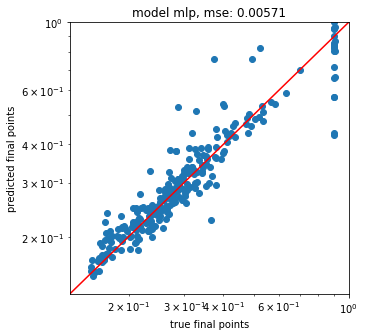

set format
path plots/mlp with earlystop_sct.png


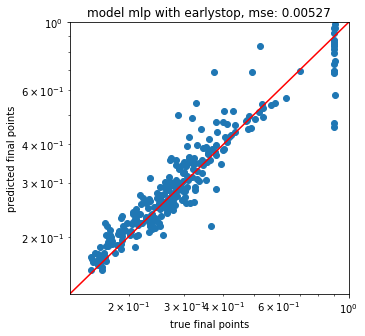

set format
path plots/mlp with dropout_sct.png


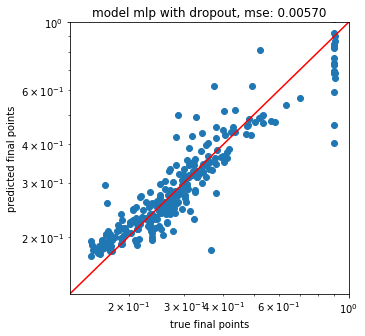

set format
path plots/mlp with L1L2_sct.png


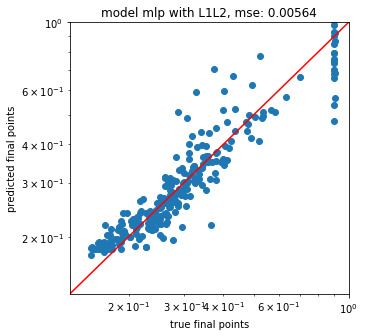

set format
path plots/mlp with exponential decay_sct.png


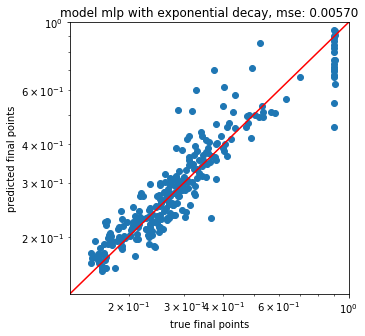

In [135]:
t.scatter_plot(Y, t.pickle_from_file('res_mlp_500'), 'mlp')
t.scatter_plot(Y, t.pickle_from_file('res_mlp_es'), 'mlp with earlystop')
t.scatter_plot(Y, t.pickle_from_file('res_mlp_do'), 'mlp with dropout')
t.scatter_plot(Y, t.pickle_from_file('res_mlp_l1l2'), 'mlp with L1L2')
t.scatter_plot(Y, t.pickle_from_file('res_mlp_ed'), 'mlp with exponential decay')

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


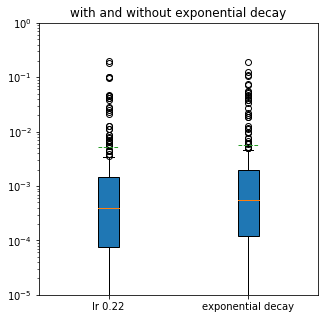

In [128]:
t.box_plot_single(Y, (5,5), [t.pickle_from_file('res_mlp_es'), t.pickle_from_file('res_mlp_ed')],
           ['lr 0.22', 'exponential decay'], 'with and without exponential decay')

In [224]:
# task 3.2
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
res_lstm_ns = []   # evaluating with next steps
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                    steps=(train_steps,[5,10,20,30]), 
                    cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')
    res_train[i], res_val[i] = res['trn_means'], res['val_means']
    res_lstm_ns.append(res)
print("results validation data \n", res_val)  
print("results training data\n", res_train)
t.pickle_to_file(res_lstm_ns, 'res_lstm_nextstep')

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train on nextstep considering 5 epochs, eval during training with 5 epochs

Epoch 00001: val_loss improved from inf to 0.03841, storing weights.

Epoch 00002: val_loss improved from 0.03841 to 0.02144, storing weights.

Epoch 00003: val_loss improved from 0.02144 to 0.01620, storing weights.

Epoch 00004: val_loss improved from 0.01620 to 0.00893, storing weights.

Epoch 00005: val_loss improved from 0.00893 to 0.00655, storing weights.

Epoch 00006: val_loss improved from 0.00655 to 0.00385, storing weights.

Epoch 00007: val_loss improved from 0.00385 to 0.00355, storing weights.

Epoch 00008: val_loss improved from 0.00355 to 0.00288, storing weights.

Epoch 00009: val_loss improved from 0.00288 to 0.00283, storing weights.

Epoch 00010: val_loss improved from 0.00283 to 0.00255, storing w


Epoch 00136: val_loss improved from 0.00095 to 0.00094, storing weights.

Epoch 00137: val_loss improved from 0.00094 to 0.00093, storing weights.

Epoch 00138: val_loss improved from 0.00093 to 0.00092, storing weights.

Epoch 00139: val_loss improved from 0.00092 to 0.00091, storing weights.

Epoch 00140: val_loss improved from 0.00091 to 0.00090, storing weights.

Epoch 00141: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00142: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00143: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00144: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00145: val_loss improved from 0.00087 to 0.00086, storing weights.

Epoch 00146: val_loss improved from 0.00086 to 0.00085, storing weights.

Epoch 00147: val_loss improved from 0.00085 to 0.00084, storing weights.

Epoch 00148: val_loss improved from 0.00084 to 0.00083, storing weights.

Epoch 00149: val_loss improved from 0


Epoch 00253: val_loss improved from 0.00038 to 0.00038, storing weights.

Epoch 00254: val_loss is 0.00039, did not improve

Epoch 00255: val_loss is 0.00039, did not improve

Epoch 00256: val_loss is 0.00040, did not improve

Epoch 00257: val_loss is 0.00041, did not improve

Epoch 00258: val_loss is 0.00042, did not improve

Epoch 00259: val_loss is 0.00044, did not improve

Epoch 00260: val_loss is 0.00047, did not improve

Epoch 00261: val_loss is 0.00050, did not improve

Epoch 00262: val_loss is 0.00054, did not improve

Epoch 00263: val_loss is 0.00059, did not improve

Epoch 00264: val_loss is 0.00063, did not improve

Epoch 00265: val_loss is 0.00067, did not improve

Epoch 00266: val_loss is 0.00068, did not improve

Epoch 00267: val_loss is 0.00067, did not improve

Epoch 00268: val_loss is 0.00063, did not improve

Epoch 00269: val_loss is 0.00058, did not improve

Epoch 00270: val_loss is 0.00052, did not improve

Epoch 00271: val_loss is 0.00047, did not improve

Epoch 0


Epoch 00072: val_loss is 0.00052, did not improve

Epoch 00073: val_loss is 0.00065, did not improve

Epoch 00074: val_loss is 0.00047, did not improve

Epoch 00075: val_loss is 0.00051, did not improve

Epoch 00076: val_loss is 0.00067, did not improve

Epoch 00077: val_loss is 0.00055, did not improve

Epoch 00078: val_loss is 0.00056, did not improve

Epoch 00079: val_loss is 0.00056, did not improve

Epoch 00080: val_loss is 0.00055, did not improve

Epoch 00081: val_loss is 0.00054, did not improve

Epoch 00082: val_loss is 0.00051, did not improve

Epoch 00083: val_loss is 0.00052, did not improve

Epoch 00084: val_loss is 0.00053, did not improve

Epoch 00085: val_loss is 0.00049, did not improve

Epoch 00086: val_loss is 0.00047, did not improve

Epoch 00087: val_loss is 0.00053, did not improve

Epoch 00088: val_loss is 0.00048, did not improve

Epoch 00089: val_loss is 0.00044, did not improve

Epoch 00090: val_loss is 0.00052, did not improve

Epoch 00091: val_loss is 0.000


Epoch 00073: val_loss improved from 0.00044 to 0.00044, storing weights.

Epoch 00074: val_loss improved from 0.00044 to 0.00043, storing weights.

Epoch 00075: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00076: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00077: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00078: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00079: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00080: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00081: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00082: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00083: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00084: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00085: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00086: val_loss improved from 0


Epoch 00004: val_loss improved from 0.01916 to 0.00486, storing weights.

Epoch 00005: val_loss improved from 0.00486 to 0.00213, storing weights.

Epoch 00006: val_loss is 0.00320, did not improve

Epoch 00007: val_loss is 0.00240, did not improve

Epoch 00008: val_loss improved from 0.00213 to 0.00180, storing weights.

Epoch 00009: val_loss improved from 0.00180 to 0.00168, storing weights.

Epoch 00010: val_loss improved from 0.00168 to 0.00141, storing weights.

Epoch 00011: val_loss is 0.00152, did not improve

Epoch 00012: val_loss is 0.00151, did not improve

Epoch 00013: val_loss is 0.00150, did not improve

Epoch 00014: val_loss is 0.00146, did not improve

Epoch 00015: val_loss improved from 0.00141 to 0.00127, storing weights.

Epoch 00016: val_loss improved from 0.00127 to 0.00104, storing weights.

Epoch 00017: val_loss improved from 0.00104 to 0.00086, storing weights.

Epoch 00018: val_loss improved from 0.00086 to 0.00080, storing weights.

Epoch 00019: val_loss impro


Epoch 00043: val_loss improved from 0.00044 to 0.00044, storing weights.

Epoch 00044: val_loss improved from 0.00044 to 0.00044, storing weights.

Epoch 00045: val_loss improved from 0.00044 to 0.00044, storing weights.

Epoch 00046: val_loss improved from 0.00044 to 0.00043, storing weights.

Epoch 00047: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00048: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00049: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00050: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00051: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoch 00052: val_loss improved from 0.00043 to 0.00042, storing weights.

Epoch 00053: val_loss improved from 0.00042 to 0.00042, storing weights.

Epoch 00054: val_loss improved from 0.00042 to 0.00042, storing weights.

Epoch 00055: val_loss improved from 0.00042 to 0.00042, storing weights.

Epoch 00056: val_loss improved from 0


Epoch 00011: val_loss improved from 0.00053 to 0.00049, storing weights.

Epoch 00012: val_loss is 0.00054, did not improve

Epoch 00013: val_loss is 0.00049, did not improve

Epoch 00014: val_loss is 0.00049, did not improve

Epoch 00015: val_loss is 0.00050, did not improve

Epoch 00016: val_loss improved from 0.00049 to 0.00047, storing weights.

Epoch 00017: val_loss is 0.00048, did not improve

Epoch 00018: val_loss improved from 0.00047 to 0.00046, storing weights.

Epoch 00019: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00020: val_loss improved from 0.00046 to 0.00045, storing weights.

Epoch 00021: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00022: val_loss improved from 0.00045 to 0.00044, storing weights.

Epoch 00023: val_loss improved from 0.00044 to 0.00044, storing weights.

Epoch 00024: val_loss improved from 0.00044 to 0.00043, storing weights.

Epoch 00025: val_loss improved from 0.00043 to 0.00043, storing weights.

Epoc

validate on 5 steps, mse on train / validation data: 0.05284 / 0.03300
validate on 10 steps, mse on train / validation data: 0.05236 / 0.03228
validate on 20 steps, mse on train / validation data: 0.05860 / 0.03601
validate on 30 steps, mse on train / validation data: 0.03803 / 0.02312
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.05233  0.05318  0.05976  0.04382] ***
Results validation data of all Folds: 
[[ 0.08935  0.09236  0.10966  0.09241]
 [ 0.03465  0.03491  0.03361  0.01593]
 [ 0.033    0.03228  0.03601  0.02312]]
MSE on train data on [5, 10, 20, 30] steps: means over folds: *** [ 0.05081  0.05124  0.05655  0.03873] ***
Results training data of all Folds: 
[[ 0.05636  0.05785  0.06913  0.05808]
 [ 0.04324  0.04351  0.04192  0.02009]
 [ 0.05284  0.05236  0.0586   0.03803]]
mse over all validation data 0.0440058553659
cross validate 1000 epochs, train on 20 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with


Epoch 00034: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00035: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00036: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00037: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00038: val_loss improved from 0.00029 to 0.00028, storing weights.

Epoch 00039: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00040: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00041: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00042: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00043: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00044: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00045: val_loss improved from 0.00028 to 0.00027, storing weights.

Epoch 00046: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00047: val_loss improved from 0


Epoch 00004: val_loss improved from 0.01432 to 0.00532, storing weights.

Epoch 00005: val_loss improved from 0.00532 to 0.00487, storing weights.

Epoch 00006: val_loss improved from 0.00487 to 0.00314, storing weights.

Epoch 00007: val_loss improved from 0.00314 to 0.00106, storing weights.

Epoch 00008: val_loss is 0.00115, did not improve

Epoch 00009: val_loss improved from 0.00106 to 0.00080, storing weights.

Epoch 00010: val_loss is 0.00080, did not improve

Epoch 00011: val_loss improved from 0.00080 to 0.00068, storing weights.

Epoch 00012: val_loss is 0.00072, did not improve

Epoch 00013: val_loss improved from 0.00068 to 0.00058, storing weights.

Epoch 00014: val_loss improved from 0.00058 to 0.00056, storing weights.

Epoch 00015: val_loss improved from 0.00056 to 0.00053, storing weights.

Epoch 00016: val_loss improved from 0.00053 to 0.00050, storing weights.

Epoch 00017: val_loss is 0.00051, did not improve

Epoch 00018: val_loss improved from 0.00050 to 0.00048,


Epoch 00116: val_loss improved from 0.00029 to 0.00028, storing weights.

Epoch 00117: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00118: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00119: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00120: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00121: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00122: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00123: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00124: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00125: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00126: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00127: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00128: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00129: val_loss improved from 0

In [15]:
# 3.3 train with random lenghts
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')

print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])
t.pickle_to_file(res, 'res_lstm_nextstep_random')

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.08584, storing weights.

Epoch 00002: val_loss improved from 0.08584 to 0.07439, storing weights.

Epoch 00003: val_loss improved from 0.07439 to 0.02369, storing weights.

Epoch 00004: val_loss improved from 0.02369 to 0.01386, storing weights.

Epoch 00005: val_loss improved from 0.01386 to 0.01289, storing weights.

Epoch 00006: val_loss improved from 0.01289 to 0.00480, storing weights.

Epoch 00007: val_loss improved from 0.00480 to 0.00335, storing weights.

Epoch 00008: val_loss is 0.00353, did not improve

Epoch 00009: val_loss improved from 0.00335 to 0.00121, storing weights.

Epoch 00010: val_loss is 0.00136, did not improve

Epoch 00011: val_loss is 0.00280, did


Epoch 00150: val_loss is 0.00146, did not improve

Epoch 00151: val_loss is 0.00097, did not improve

Epoch 00152: val_loss is 0.00060, did not improve

Epoch 00153: val_loss is 0.00090, did not improve

Epoch 00154: val_loss is 0.00060, did not improve

Epoch 00155: val_loss is 0.00107, did not improve

Epoch 00156: val_loss is 0.00067, did not improve

Epoch 00157: val_loss is 0.00056, did not improve

Epoch 00158: val_loss is 0.00042, did not improve

Epoch 00159: val_loss is 0.00040, did not improve

Epoch 00160: val_loss is 0.00036, did not improve
Epoch 00160: early stopping
Using epoch 00085 with val_loss: 0.00027
validate on 5 steps, mse on train / validation data: 0.01471 / 0.02526
validate on 10 steps, mse on train / validation data: 0.01031 / 0.01362
validate on 20 steps, mse on train / validation data: 0.00436 / 0.00365
validate on 30 steps, mse on train / validation data: 0.00166 / 0.00143
train fold 2 on 0 steps, validation on 0 steps
train with random nr. of epochs, eva


Epoch 00134: val_loss is 0.00042, did not improve

Epoch 00135: val_loss is 0.00040, did not improve
Epoch 00135: early stopping
Using epoch 00081 with val_loss: 0.00020
validate on 5 steps, mse on train / validation data: 0.16159 / 0.08641
validate on 10 steps, mse on train / validation data: 0.12393 / 0.07440
validate on 20 steps, mse on train / validation data: 0.03269 / 0.02646
validate on 30 steps, mse on train / validation data: 0.00476 / 0.00441
train fold 3 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.11001, storing weights.

Epoch 00002: val_loss improved from 0.11001 to 0.08327, storing weights.

Epoch 00003: val_loss improved from 0.08327 to 0.03608, storing weights.

Epoch 00004: val_loss improved from 0.03608 to 0.01065, storing weights.

Epoch 00005: val_loss improved from 0.01065 to 0.00554, storing weights.

Epoch 00006: val_loss is 0.00714, did not improve

Epoch 00007: val_loss

In [13]:
# task 3.3 base line training with fixed lenghts (on final epoch)
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
res_lstm_finalstep = []   # evaluating directly on final steps
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                     steps=(train_steps,[5,10,20,30]), 
                     cfg=cfg, epochs=1000, earlystop=True, 
                     mode='finalstep')
    res_train[i], res_val[i] = res['trn_means'], res['val_means']
    res_lstm_finalstep.append(res)    
print("results validation data \n", res_val)  
print("results training data\n", res_train)
t.pickle_to_file(res_lstm_finalstep, 'res_lstm_finalstep')

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.11554, storing weights.

Epoch 00002: val_loss improved from 0.11554 to 0.04302, storing weights.

Epoch 00003: val_loss improved from 0.04302 to 0.02813, storing weights.

Epoch 00004: val_loss improved from 0.02813 to 0.01769, storing weights.

Epoch 00005: val_loss improved from 0.01769 to 0.01097, storing weights.

Epoch 00006: val_loss improved from 0.01097 to 0.00882, storing weights.

Epoch 00007: val_loss is 0.01037, did not improve

Epoch 00008: val_loss improved from 0.00882 to 0.00847, storing weights.

Epoch 00009: val_loss improved from 0.00847 to 0.00606, storing weights.

Epoch 00010: val_loss improved from 0.00606 to 0.00438, storing weights.

Epoch 00011: val_lo


Epoch 00001: val_loss improved from inf to 1.34632, storing weights.

Epoch 00002: val_loss improved from 1.34632 to 0.06494, storing weights.

Epoch 00003: val_loss improved from 0.06494 to 0.05340, storing weights.

Epoch 00004: val_loss improved from 0.05340 to 0.02735, storing weights.

Epoch 00005: val_loss improved from 0.02735 to 0.01483, storing weights.

Epoch 00006: val_loss is 0.02208, did not improve

Epoch 00007: val_loss is 0.02008, did not improve

Epoch 00008: val_loss improved from 0.01483 to 0.01388, storing weights.

Epoch 00009: val_loss improved from 0.01388 to 0.01224, storing weights.

Epoch 00010: val_loss improved from 0.01224 to 0.00833, storing weights.

Epoch 00011: val_loss improved from 0.00833 to 0.00687, storing weights.

Epoch 00012: val_loss improved from 0.00687 to 0.00294, storing weights.

Epoch 00013: val_loss is 0.00587, did not improve

Epoch 00014: val_loss is 0.00422, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00


Epoch 00136: val_loss improved from 0.00175 to 0.00174, storing weights.

Epoch 00137: val_loss improved from 0.00174 to 0.00173, storing weights.

Epoch 00138: val_loss improved from 0.00173 to 0.00173, storing weights.

Epoch 00139: val_loss improved from 0.00173 to 0.00172, storing weights.

Epoch 00140: val_loss improved from 0.00172 to 0.00172, storing weights.

Epoch 00141: val_loss improved from 0.00172 to 0.00171, storing weights.

Epoch 00142: val_loss improved from 0.00171 to 0.00170, storing weights.

Epoch 00143: val_loss improved from 0.00170 to 0.00170, storing weights.

Epoch 00144: val_loss improved from 0.00170 to 0.00169, storing weights.

Epoch 00145: val_loss improved from 0.00169 to 0.00168, storing weights.

Epoch 00146: val_loss improved from 0.00168 to 0.00168, storing weights.

Epoch 00147: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00148: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00149: val_loss improved from 0


Epoch 00251: val_loss improved from 0.00126 to 0.00126, storing weights.

Epoch 00252: val_loss improved from 0.00126 to 0.00125, storing weights.

Epoch 00253: val_loss improved from 0.00125 to 0.00124, storing weights.

Epoch 00254: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00255: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00256: val_loss is 0.00124, did not improve

Epoch 00257: val_loss is 0.00124, did not improve

Epoch 00258: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00259: val_loss is 0.00124, did not improve

Epoch 00260: val_loss improved from 0.00124 to 0.00123, storing weights.

Epoch 00261: val_loss is 0.00124, did not improve

Epoch 00262: val_loss is 0.00123, did not improve

Epoch 00263: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00264: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00265: val_loss improved from 0.00123 to 0.00122, storing weights.

Epoc


Epoch 00039: val_loss is 0.02445, did not improve

Epoch 00040: val_loss is 0.02445, did not improve

Epoch 00041: val_loss is 0.02444, did not improve

Epoch 00042: val_loss is 0.02444, did not improve

Epoch 00043: val_loss is 0.02444, did not improve

Epoch 00044: val_loss is 0.02444, did not improve

Epoch 00045: val_loss is 0.02444, did not improve

Epoch 00046: val_loss is 0.02444, did not improve

Epoch 00047: val_loss is 0.02444, did not improve

Epoch 00048: val_loss is 0.02444, did not improve

Epoch 00049: val_loss is 0.02444, did not improve

Epoch 00050: val_loss is 0.02444, did not improve

Epoch 00051: val_loss is 0.02444, did not improve

Epoch 00052: val_loss is 0.02444, did not improve

Epoch 00053: val_loss is 0.02444, did not improve

Epoch 00054: val_loss is 0.02444, did not improve

Epoch 00055: val_loss is 0.02445, did not improve

Epoch 00056: val_loss is 0.02445, did not improve

Epoch 00057: val_loss is 0.02445, did not improve

Epoch 00058: val_loss is 0.024


Epoch 00057: val_loss is 0.00169, did not improve

Epoch 00058: val_loss is 0.00142, did not improve

Epoch 00059: val_loss is 0.00150, did not improve

Epoch 00060: val_loss is 0.00162, did not improve

Epoch 00061: val_loss improved from 0.00089 to 0.00087, storing weights.

Epoch 00062: val_loss is 0.00097, did not improve

Epoch 00063: val_loss is 0.00090, did not improve

Epoch 00064: val_loss is 0.00092, did not improve

Epoch 00065: val_loss is 0.00105, did not improve

Epoch 00066: val_loss is 0.00096, did not improve

Epoch 00067: val_loss is 0.00104, did not improve

Epoch 00068: val_loss is 0.00095, did not improve

Epoch 00069: val_loss is 0.00099, did not improve

Epoch 00070: val_loss is 0.00096, did not improve

Epoch 00071: val_loss is 0.00099, did not improve

Epoch 00072: val_loss is 0.00099, did not improve

Epoch 00073: val_loss is 0.00103, did not improve

Epoch 00074: val_loss is 0.00101, did not improve

Epoch 00075: val_loss is 0.00105, did not improve

Epoch 0


Epoch 00060: val_loss is 0.00088, did not improve

Epoch 00061: val_loss is 0.00113, did not improve

Epoch 00062: val_loss is 0.00094, did not improve

Epoch 00063: val_loss is 0.00067, did not improve

Epoch 00064: val_loss is 0.00061, did not improve

Epoch 00065: val_loss is 0.00062, did not improve

Epoch 00066: val_loss is 0.00078, did not improve

Epoch 00067: val_loss is 0.00107, did not improve

Epoch 00068: val_loss is 0.00100, did not improve

Epoch 00069: val_loss is 0.00070, did not improve

Epoch 00070: val_loss is 0.00061, did not improve

Epoch 00071: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00072: val_loss is 0.00072, did not improve

Epoch 00073: val_loss is 0.00099, did not improve

Epoch 00074: val_loss is 0.00103, did not improve

Epoch 00075: val_loss is 0.00074, did not improve

Epoch 00076: val_loss is 0.00061, did not improve

Epoch 00077: val_loss improved from 0.00061 to 0.00060, storing weights.

Epoch 00078: val_loss is 0.00069, d


Epoch 00076: val_loss is 0.00101, did not improve

Epoch 00077: val_loss improved from 0.00094 to 0.00093, storing weights.

Epoch 00078: val_loss is 0.00100, did not improve

Epoch 00079: val_loss is 0.00095, did not improve

Epoch 00080: val_loss is 0.00102, did not improve

Epoch 00081: val_loss is 0.00098, did not improve

Epoch 00082: val_loss is 0.00104, did not improve

Epoch 00083: val_loss is 0.00101, did not improve

Epoch 00084: val_loss is 0.00104, did not improve

Epoch 00085: val_loss is 0.00099, did not improve

Epoch 00086: val_loss is 0.00100, did not improve

Epoch 00087: val_loss is 0.00096, did not improve

Epoch 00088: val_loss is 0.00095, did not improve

Epoch 00089: val_loss is 0.00093, did not improve

Epoch 00090: val_loss is 0.00094, did not improve

Epoch 00091: val_loss is 0.00094, did not improve

Epoch 00092: val_loss is 0.00095, did not improve

Epoch 00093: val_loss is 0.00097, did not improve

Epoch 00094: val_loss is 0.00099, did not improve

Epoch 0


Epoch 00079: val_loss is 0.00058, did not improve

Epoch 00080: val_loss is 0.00051, did not improve

Epoch 00081: val_loss is 0.00049, did not improve

Epoch 00082: val_loss is 0.00053, did not improve

Epoch 00083: val_loss is 0.00059, did not improve

Epoch 00084: val_loss is 0.00061, did not improve

Epoch 00085: val_loss is 0.00059, did not improve

Epoch 00086: val_loss is 0.00055, did not improve

Epoch 00087: val_loss is 0.00054, did not improve

Epoch 00088: val_loss is 0.00056, did not improve

Epoch 00089: val_loss is 0.00058, did not improve

Epoch 00090: val_loss is 0.00060, did not improve

Epoch 00091: val_loss is 0.00059, did not improve

Epoch 00092: val_loss is 0.00058, did not improve

Epoch 00093: val_loss is 0.00057, did not improve

Epoch 00094: val_loss is 0.00058, did not improve

Epoch 00095: val_loss is 0.00059, did not improve

Epoch 00096: val_loss is 0.00059, did not improve

Epoch 00097: val_loss is 0.00060, did not improve

Epoch 00098: val_loss is 0.000


Epoch 00075: val_loss improved from 0.00069 to 0.00069, storing weights.

Epoch 00076: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 00077: val_loss improved from 0.00068 to 0.00068, storing weights.

Epoch 00078: val_loss improved from 0.00068 to 0.00067, storing weights.

Epoch 00079: val_loss improved from 0.00067 to 0.00066, storing weights.

Epoch 00080: val_loss improved from 0.00066 to 0.00065, storing weights.

Epoch 00081: val_loss improved from 0.00065 to 0.00065, storing weights.

Epoch 00082: val_loss improved from 0.00065 to 0.00064, storing weights.

Epoch 00083: val_loss improved from 0.00064 to 0.00063, storing weights.

Epoch 00084: val_loss improved from 0.00063 to 0.00062, storing weights.

Epoch 00085: val_loss improved from 0.00062 to 0.00062, storing weights.

Epoch 00086: val_loss improved from 0.00062 to 0.00061, storing weights.

Epoch 00087: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00088: val_loss improved from 0


Epoch 00210: val_loss is 0.00044, did not improve

Epoch 00211: val_loss is 0.00045, did not improve

Epoch 00212: val_loss is 0.00046, did not improve

Epoch 00213: val_loss is 0.00044, did not improve

Epoch 00214: val_loss is 0.00046, did not improve

Epoch 00215: val_loss is 0.00046, did not improve

Epoch 00216: val_loss is 0.00045, did not improve

Epoch 00217: val_loss is 0.00047, did not improve

Epoch 00218: val_loss is 0.00048, did not improve

Epoch 00219: val_loss is 0.00047, did not improve

Epoch 00220: val_loss is 0.00049, did not improve

Epoch 00221: val_loss is 0.00049, did not improve

Epoch 00222: val_loss is 0.00050, did not improve

Epoch 00223: val_loss is 0.00051, did not improve
Epoch 00223: early stopping
Using epoch 00156 with val_loss: 0.00035
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 665us/step
mse:  0.0250337426974
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 799us/


Epoch 00102: val_loss is 0.00091, did not improve

Epoch 00103: val_loss is 0.00091, did not improve

Epoch 00104: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00105: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00106: val_loss is 0.00090, did not improve

Epoch 00107: val_loss is 0.00090, did not improve

Epoch 00108: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00109: val_loss is 0.00090, did not improve

Epoch 00110: val_loss improved from 0.00089 to 0.00089, storing weights.

Epoch 00111: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00112: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00113: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00114: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00115: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00116: val_loss is 0.00088, did not improve

Epoch 00117: val_loss impro

In [91]:
# 3.3 train train using final points with random lenghts
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='finalstep')

print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])
t.pickle_to_file(res, 'res_lstm_finalstep_random')

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train on finalstep with random nr. of epochs, eval during training with 0 epochs

Epoch 00001: val_loss improved from inf to 0.06410, storing weights.

Epoch 00002: val_loss improved from 0.06410 to 0.03095, storing weights.

Epoch 00003: val_loss improved from 0.03095 to 0.00941, storing weights.

Epoch 00004: val_loss is 0.01184, did not improve

Epoch 00005: val_loss improved from 0.00941 to 0.00702, storing weights.

Epoch 00006: val_loss improved from 0.00702 to 0.00428, storing weights.

Epoch 00007: val_loss improved from 0.00428 to 0.00373, storing weights.

Epoch 00008: val_loss is 0.00575, did not improve

Epoch 00009: val_loss is 0.00440, did not improve

Epoch 00010: val_loss is 0.00541, did not improve

Epoch 00011: val_loss improved from 0.00373 to 0.00358, storing weights.

Epo


Epoch 00148: val_loss is 0.00392, did not improve

Epoch 00149: val_loss is 0.00336, did not improve

Epoch 00150: val_loss is 0.00440, did not improve

Epoch 00151: val_loss is 0.00142, did not improve

Epoch 00152: val_loss is 0.00113, did not improve

Epoch 00153: val_loss is 0.00110, did not improve

Epoch 00154: val_loss is 0.00121, did not improve

Epoch 00155: val_loss is 0.00079, did not improve

Epoch 00156: val_loss is 0.00175, did not improve

Epoch 00157: val_loss is 0.00117, did not improve

Epoch 00158: val_loss is 0.00098, did not improve

Epoch 00159: val_loss is 0.00165, did not improve

Epoch 00160: val_loss is 0.00162, did not improve

Epoch 00161: val_loss is 0.00278, did not improve

Epoch 00162: val_loss is 0.00102, did not improve

Epoch 00163: val_loss is 0.00114, did not improve

Epoch 00164: val_loss is 0.00109, did not improve

Epoch 00165: val_loss is 0.00078, did not improve

Epoch 00166: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 0

evaluate lstm with consideration of configs
validate on 20 steps, mse on train / validation data: 0.00058 / 0.00057
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 30 steps, mse on train / validation data: 0.00128 / 0.00111
train fold 2 on 0 steps, validation on 0 steps
train on finalstep with random nr. of epochs, eval during training with 0 epochs

Epoch 00001: val_loss improved from inf to 0.09386, storing weights.

Epoch 00002: val_loss improved from 0.09386 to 0.05620, storing weights.

Epoch 00003: val_loss improved from 0.05620 to 0.01881, storing weights.

Epoch 00004: val_loss improved from 0.01881 to 0.00845, storing weights.

Epoch 00005: val_loss is 0.01113, did not improve

Epoch 00006: val_loss improved from 0.00845 to 0.00803, storing weights.

Epoch 00007: val_loss improved from 0.00803 to 0.00357, storing weights.

Epoch 00008: val_loss improved from 0.00357 to 0.00228, storing weights.

Epoch 00009: val_loss is 0.003


Epoch 00146: val_loss is 0.00058, did not improve

Epoch 00147: val_loss is 0.00058, did not improve

Epoch 00148: val_loss improved from 0.00050 to 0.00045, storing weights.

Epoch 00149: val_loss is 0.00074, did not improve

Epoch 00150: val_loss is 0.00093, did not improve

Epoch 00151: val_loss is 0.00090, did not improve

Epoch 00152: val_loss is 0.00112, did not improve

Epoch 00153: val_loss is 0.00112, did not improve

Epoch 00154: val_loss is 0.00086, did not improve

Epoch 00155: val_loss is 0.00080, did not improve

Epoch 00156: val_loss is 0.00054, did not improve

Epoch 00157: val_loss is 0.00069, did not improve

Epoch 00158: val_loss is 0.00071, did not improve

Epoch 00159: val_loss is 0.00064, did not improve

Epoch 00160: val_loss is 0.00081, did not improve

Epoch 00161: val_loss is 0.00078, did not improve

Epoch 00162: val_loss is 0.00102, did not improve

Epoch 00163: val_loss is 0.00099, did not improve

Epoch 00164: val_loss is 0.00069, did not improve

Epoch 0


Epoch 00031: val_loss is 0.00295, did not improve

Epoch 00032: val_loss is 0.00183, did not improve

Epoch 00033: val_loss is 0.00209, did not improve

Epoch 00034: val_loss is 0.00224, did not improve

Epoch 00035: val_loss is 0.00168, did not improve

Epoch 00036: val_loss is 0.00145, did not improve

Epoch 00037: val_loss is 0.00173, did not improve

Epoch 00038: val_loss is 0.00251, did not improve

Epoch 00039: val_loss is 0.00261, did not improve

Epoch 00040: val_loss is 0.00175, did not improve

Epoch 00041: val_loss is 0.00258, did not improve

Epoch 00042: val_loss is 0.00164, did not improve

Epoch 00043: val_loss is 0.00160, did not improve

Epoch 00044: val_loss is 0.00233, did not improve

Epoch 00045: val_loss is 0.00118, did not improve

Epoch 00046: val_loss is 0.00144, did not improve

Epoch 00047: val_loss is 0.00145, did not improve

Epoch 00048: val_loss is 0.00245, did not improve

Epoch 00049: val_loss is 0.00200, did not improve

Epoch 00050: val_loss is 0.002


Epoch 00190: val_loss is 0.00104, did not improve

Epoch 00191: val_loss is 0.00103, did not improve

Epoch 00192: val_loss is 0.00088, did not improve

Epoch 00193: val_loss is 0.00151, did not improve

Epoch 00194: val_loss is 0.00106, did not improve

Epoch 00195: val_loss is 0.00143, did not improve

Epoch 00196: val_loss is 0.00116, did not improve

Epoch 00197: val_loss is 0.00091, did not improve

Epoch 00198: val_loss is 0.00101, did not improve

Epoch 00199: val_loss is 0.00087, did not improve

Epoch 00200: val_loss is 0.00110, did not improve

Epoch 00201: val_loss is 0.00112, did not improve

Epoch 00202: val_loss is 0.00113, did not improve

Epoch 00203: val_loss is 0.00115, did not improve

Epoch 00204: val_loss is 0.00111, did not improve

Epoch 00205: val_loss is 0.00121, did not improve

Epoch 00206: val_loss is 0.00085, did not improve

Epoch 00207: val_loss is 0.00093, did not improve

Epoch 00208: val_loss is 0.00123, did not improve

Epoch 00209: val_loss is 0.001

In [39]:
# task 3.4 
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
res = m.eval_cv('xgb_next', [configs, lcs], Y, steps=(0,[5,10,20,30]), cfg=cfg)
print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])
t.pickle_to_file(res, 'res_xgb_next')

cross validate 0 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'lr': 0.08119864140758115, 'subsample': 0.7946631901813815, 'n_estimators': 1000, 'gamma': 0.007833441242813044, 'maxdepth': 10, 'cols_bt': 0.9376450587145334}
train fold 1 on 0 steps, validation on 0 steps
train on new epoch 5 true value for curve no. 13 (example) 0.584156378552
train on new epoch 6 true value for curve no. 13 (example) 0.578395060919
train on new epoch 7 true value for curve no. 13 (example) 0.527057613488
train on new epoch 8 true value for curve no. 13 (example) 0.500720170913
train on new epoch 9 true value for curve no. 13 (example) 0.494855966833
train on new epoch 10 true value for curve no. 13 (example) 0.454835391707
train on new epoch 11 true value for curve no. 13 (example) 0.458230453509
train on new epoch 12 true value for curve no. 13 (example) 0.465432094203
train on new epoch 13 true value for curve no. 13 (example) 0.472633742624
train on new epoch 14 true value for c

step nr. 26 prediction / true value for lc number 13 0.874557 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.874557 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.874557 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.874557 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.874557 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.874557 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.874557 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.874557 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.874557 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.874557 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.874557 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.874557 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.8

step nr. 38 prediction / true value for lc number 13 0.348069 / 0.302572014155
step nr. 39 prediction / true value for lc number 13 0.348069 / 0.330041154667

eval_xgb starting at step 30
lcs [ 0.4387324   0.34678068  0.33108651  0.33480885  0.29798793  0.27665996
  0.2750503   0.2889336   0.27525151  0.3110664   0.25764588  0.26348088
  0.28239437  0.24537224  0.2527163   0.24617706  0.23571428  0.26448692
  0.25331992  0.2304829   0.22706237  0.23279678  0.22736418  0.22947686
  0.22957746  0.24839035  0.24235412  0.24356137  0.22173038  0.21549295
  0.21961771  0.23521127  0.23038229  0.22756538  0.22404426  0.33179075
  0.2469819   0.21408451  0.2140845   0.20503018]
step nr. 30 prediction / true value for lc number 13 0.221099 / 0.219617709517
step nr. 31 prediction / true value for lc number 13 0.221099 / 0.235211265939
step nr. 32 prediction / true value for lc number 13 0.214998 / 0.230382293463
step nr. 33 prediction / true value for lc number 13 0.216762 / 0.227565382208
step

step nr. 7 prediction / true value for lc number 13 0.323158 / 0.288933598569
step nr. 8 prediction / true value for lc number 13 0.308723 / 0.275251509888
step nr. 9 prediction / true value for lc number 13 0.311356 / 0.311066399728
step nr. 10 prediction / true value for lc number 13 0.308723 / 0.257645875216
step nr. 11 prediction / true value for lc number 13 0.307247 / 0.26348088256
step nr. 12 prediction / true value for lc number 13 0.307247 / 0.282394366605
step nr. 13 prediction / true value for lc number 13 0.307247 / 0.245372237904
step nr. 14 prediction / true value for lc number 13 0.307247 / 0.252716300743
step nr. 15 prediction / true value for lc number 13 0.307247 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.307247 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.307247 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.307247 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.3

step nr. 26 prediction / true value for lc number 13 0.376876 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.366349 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.376876 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.363279 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.366349 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.359094 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.360761 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.359094 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.356575 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.351391 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.356575 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.351391 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.3

train on new epoch 36 true value for curve no. 13 (example) 0.331790747387
train on new epoch 37 true value for curve no. 13 (example) 0.246981897524
train on new epoch 38 true value for curve no. 13 (example) 0.214084506035
train on new epoch 39 true value for curve no. 13 (example) 0.214084501777
train on new epoch 40 true value for curve no. 13 (example) 0.205030181578

eval_xgb starting at step 5
lcs [ 0.56285084  0.50601443  0.46792301  0.44506816  0.42983159  0.4212109
  0.40797915  0.39695268  0.39314354  0.38301924  0.37880914  0.37540096
  0.37359663  0.36257017  0.35805934  0.36086608  0.35294707  0.35244587
  0.34532879  0.34653167  0.34192061  0.34101844  0.33690858  0.34161989
  0.33580593  0.33309944  0.33340016  0.33199679  0.3255814   0.32668404
  0.32407779  0.32457899  0.3223737   0.32117081  0.32056937  0.32317563
  0.31776263  0.32016841  0.31345229  0.31134724]
step nr. 5 prediction / true value for lc number 13 0.485691 / 0.421210902518
step nr. 6 prediction / tru

step nr. 15 prediction / true value for lc number 13 0.289175 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.27627 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.28329 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.27627 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.281266 / 0.230482899717
step nr. 20 prediction / true value for lc number 13 0.27627 / 0.227062367967
step nr. 21 prediction / true value for lc number 13 0.27627 / 0.232796779701
step nr. 22 prediction / true value for lc number 13 0.27627 / 0.227364180343
step nr. 23 prediction / true value for lc number 13 0.27627 / 0.229476860591
step nr. 24 prediction / true value for lc number 13 0.27627 / 0.229577464717
step nr. 25 prediction / true value for lc number 13 0.27627 / 0.248390346766
step nr. 26 prediction / true value for lc number 13 0.27627 / 0.242354122656
step nr. 27 prediction / true value for lc number 13 0.27627 /

step nr. 35 prediction / true value for lc number 13 0.211502 / 0.331790747387
step nr. 36 prediction / true value for lc number 13 0.211502 / 0.246981897524
step nr. 37 prediction / true value for lc number 13 0.211502 / 0.214084506035
step nr. 38 prediction / true value for lc number 13 0.211502 / 0.214084501777
step nr. 39 prediction / true value for lc number 13 0.211502 / 0.205030181578
validate on 30 steps, mse on train / validation data: 0.00048 / 0.00101
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04854  0.01058  0.00153  0.00081] ***
Results validation data of all Folds: 
[[ 0.04451  0.0149   0.00263  0.00105]
 [ 0.06447  0.01171  0.00082  0.00036]
 [ 0.03663  0.00513  0.00113  0.00101]]
MSE on train data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04393  0.01114  0.00172  0.00049] ***
Results training data of all Folds: 
[[ 0.0508   0.01723  0.00177  0.00049]
 [ 0.04719  0.01064  0.00247  0.0005 ]
 [ 0.03379  0.00554  0.00093  0.00048]]


In [23]:
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
res_lstm_nextstep = []   # evaluating with next steps
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                    steps=(train_steps,[5,10,20,30]), 
                    cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')
    res_lstm_nextstep.append(res)
t.pickle_to_file(res_lstm_nextstep, 'res_lstm_nextstep')    

# 3.3 train with random lenghts
cfg = {'batch_size': 20, 'lr': 0.002}
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')
t.pickle_to_file(res, 'res_lstm_nextstep_random')

# task 3.3 base line training with fixed lenghts (on final epoch)
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
res_lstm_finalstep = []   # evaluating directly on final steps
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                     steps=(train_steps,[5,10,20,30]), 
                     cfg=cfg, epochs=1000, earlystop=True, 
                     mode='finalstep')
    res_train[i], res_val[i] = res['trn_means'], res['val_means']
    res_lstm_finalstep.append(res)    
t.pickle_to_file(res_lstm_finalstep, 'res_lstm_finalstep')


# 3.3 train train using final points with random lenghts
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='finalstep')
t.pickle_to_file(res, 'res_lstm_finalstep_random')

# task 3.4 
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
res = m.eval_cv('xgb_next', [configs, lcs], Y, steps=(0,[5,10,20,30]), cfg=cfg)
t.pickle_to_file(res, 'res_xgb_next')    

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train on nextstep considering 5 epochs, eval during training with 5 epochs

Epoch 00001: val_loss improved from inf to 0.03983, storing weights.

Epoch 00002: val_loss is 0.04641, did not improve

Epoch 00003: val_loss improved from 0.03983 to 0.02769, storing weights.

Epoch 00004: val_loss improved from 0.02769 to 0.02545, storing weights.

Epoch 00005: val_loss improved from 0.02545 to 0.01185, storing weights.

Epoch 00006: val_loss improved from 0.01185 to 0.00602, storing weights.

Epoch 00007: val_loss improved from 0.00602 to 0.00379, storing weights.

Epoch 00008: val_loss improved from 0.00379 to 0.00338, storing weights.

Epoch 00009: val_loss is 0.00352, did not improve

Epoch 00010: val_loss improved from 0.00338 to 0.00257, storing weights.

Epoch 00011: val_loss is 0.00322, did


Epoch 00136: val_loss is 0.00077, did not improve

Epoch 00137: val_loss is 0.00057, did not improve

Epoch 00138: val_loss is 0.00079, did not improve

Epoch 00139: val_loss is 0.00056, did not improve

Epoch 00140: val_loss is 0.00082, did not improve

Epoch 00141: val_loss improved from 0.00056 to 0.00055, storing weights.

Epoch 00142: val_loss is 0.00086, did not improve

Epoch 00143: val_loss improved from 0.00055 to 0.00055, storing weights.

Epoch 00144: val_loss is 0.00093, did not improve

Epoch 00145: val_loss is 0.00055, did not improve

Epoch 00146: val_loss is 0.00103, did not improve

Epoch 00147: val_loss is 0.00057, did not improve

Epoch 00148: val_loss is 0.00115, did not improve

Epoch 00149: val_loss is 0.00060, did not improve

Epoch 00150: val_loss is 0.00125, did not improve

Epoch 00151: val_loss is 0.00059, did not improve

Epoch 00152: val_loss is 0.00118, did not improve

Epoch 00153: val_loss improved from 0.00055 to 0.00053, storing weights.

Epoch 00154:


Epoch 00293: val_loss is 0.00042, did not improve

Epoch 00294: val_loss is 0.00052, did not improve

Epoch 00295: val_loss is 0.00043, did not improve

Epoch 00296: val_loss is 0.00051, did not improve

Epoch 00297: val_loss is 0.00043, did not improve

Epoch 00298: val_loss is 0.00051, did not improve

Epoch 00299: val_loss is 0.00043, did not improve

Epoch 00300: val_loss is 0.00052, did not improve

Epoch 00301: val_loss is 0.00043, did not improve

Epoch 00302: val_loss is 0.00052, did not improve

Epoch 00303: val_loss is 0.00044, did not improve

Epoch 00304: val_loss is 0.00053, did not improve

Epoch 00305: val_loss is 0.00044, did not improve

Epoch 00306: val_loss is 0.00054, did not improve
Epoch 00306: early stopping
Using epoch 00231 with val_loss: 0.00037
validate on 5 steps, mse on train / validation data: 0.03678 / 0.06393
validate on 10 steps, mse on train / validation data: 0.03618 / 0.06301
validate on 20 steps, mse on train / validation data: 0.03513 / 0.06105
va


Epoch 00011: val_loss improved from 0.00117 to 0.00109, storing weights.

Epoch 00012: val_loss improved from 0.00109 to 0.00107, storing weights.

Epoch 00013: val_loss improved from 0.00107 to 0.00099, storing weights.

Epoch 00014: val_loss improved from 0.00099 to 0.00096, storing weights.

Epoch 00015: val_loss improved from 0.00096 to 0.00090, storing weights.

Epoch 00016: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00017: val_loss improved from 0.00089 to 0.00086, storing weights.

Epoch 00018: val_loss improved from 0.00086 to 0.00085, storing weights.

Epoch 00019: val_loss improved from 0.00085 to 0.00083, storing weights.

Epoch 00020: val_loss improved from 0.00083 to 0.00082, storing weights.

Epoch 00021: val_loss improved from 0.00082 to 0.00081, storing weights.

Epoch 00022: val_loss improved from 0.00081 to 0.00080, storing weights.

Epoch 00023: val_loss improved from 0.00080 to 0.00079, storing weights.

Epoch 00024: val_loss improved from 0


Epoch 00130: val_loss is 0.00044, did not improve

Epoch 00131: val_loss is 0.00045, did not improve

Epoch 00132: val_loss is 0.00044, did not improve

Epoch 00133: val_loss is 0.00044, did not improve

Epoch 00134: val_loss is 0.00044, did not improve

Epoch 00135: val_loss is 0.00044, did not improve

Epoch 00136: val_loss is 0.00044, did not improve

Epoch 00137: val_loss is 0.00044, did not improve

Epoch 00138: val_loss is 0.00044, did not improve

Epoch 00139: val_loss is 0.00044, did not improve

Epoch 00140: val_loss is 0.00044, did not improve

Epoch 00141: val_loss is 0.00044, did not improve

Epoch 00142: val_loss is 0.00044, did not improve

Epoch 00143: val_loss is 0.00044, did not improve

Epoch 00144: val_loss is 0.00044, did not improve

Epoch 00145: val_loss is 0.00044, did not improve

Epoch 00146: val_loss is 0.00044, did not improve

Epoch 00147: val_loss is 0.00044, did not improve

Epoch 00148: val_loss is 0.00045, did not improve

Epoch 00149: val_loss is 0.000


Epoch 00055: val_loss is 0.00053, did not improve

Epoch 00056: val_loss is 0.00088, did not improve

Epoch 00057: val_loss is 0.00055, did not improve

Epoch 00058: val_loss is 0.00116, did not improve

Epoch 00059: val_loss is 0.00076, did not improve

Epoch 00060: val_loss is 0.00176, did not improve

Epoch 00061: val_loss is 0.00149, did not improve

Epoch 00062: val_loss is 0.00157, did not improve

Epoch 00063: val_loss is 0.00064, did not improve

Epoch 00064: val_loss is 0.00066, did not improve

Epoch 00065: val_loss is 0.00082, did not improve

Epoch 00066: val_loss is 0.00073, did not improve

Epoch 00067: val_loss is 0.00068, did not improve

Epoch 00068: val_loss is 0.00071, did not improve

Epoch 00069: val_loss is 0.00065, did not improve

Epoch 00070: val_loss is 0.00061, did not improve

Epoch 00071: val_loss is 0.00062, did not improve

Epoch 00072: val_loss is 0.00057, did not improve

Epoch 00073: val_loss is 0.00060, did not improve

Epoch 00074: val_loss is 0.000


Epoch 00089: val_loss is 0.00043, did not improve
Epoch 00089: early stopping
Using epoch 00014 with val_loss: 0.00031
validate on 5 steps, mse on train / validation data: 0.04378 / 0.03667
validate on 10 steps, mse on train / validation data: 0.57215 / 0.46554
validate on 20 steps, mse on train / validation data: 0.21907 / 0.19990
validate on 30 steps, mse on train / validation data: 0.01453 / 0.01357
train fold 3 on 10 steps, validation on 10 steps
train on nextstep considering 10 epochs, eval during training with 10 epochs

Epoch 00001: val_loss improved from inf to 0.20228, storing weights.

Epoch 00002: val_loss improved from 0.20228 to 0.05469, storing weights.

Epoch 00003: val_loss improved from 0.05469 to 0.01029, storing weights.

Epoch 00004: val_loss is 0.02629, did not improve

Epoch 00005: val_loss improved from 0.01029 to 0.00850, storing weights.

Epoch 00006: val_loss improved from 0.00850 to 0.00353, storing weights.

Epoch 00007: val_loss improved from 0.00353 to 0.


Epoch 00110: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00111: val_loss improved from 0.00028 to 0.00027, storing weights.

Epoch 00112: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00113: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00114: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00115: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00116: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00117: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00118: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00119: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00120: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00121: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00122: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00123: val_loss improved from 0


Epoch 00051: val_loss is 0.00093, did not improve

Epoch 00052: val_loss is 0.00091, did not improve

Epoch 00053: val_loss is 0.00089, did not improve

Epoch 00054: val_loss is 0.00087, did not improve

Epoch 00055: val_loss is 0.00085, did not improve

Epoch 00056: val_loss is 0.00083, did not improve

Epoch 00057: val_loss is 0.00081, did not improve

Epoch 00058: val_loss is 0.00078, did not improve

Epoch 00059: val_loss is 0.00076, did not improve

Epoch 00060: val_loss is 0.00073, did not improve

Epoch 00061: val_loss is 0.00070, did not improve

Epoch 00062: val_loss is 0.00067, did not improve

Epoch 00063: val_loss improved from 0.00065 to 0.00064, storing weights.

Epoch 00064: val_loss improved from 0.00064 to 0.00060, storing weights.

Epoch 00065: val_loss improved from 0.00060 to 0.00057, storing weights.

Epoch 00066: val_loss improved from 0.00057 to 0.00054, storing weights.

Epoch 00067: val_loss improved from 0.00054 to 0.00052, storing weights.

Epoch 00068: val_


Epoch 00208: val_loss is 0.00040, did not improve

Epoch 00209: val_loss is 0.00039, did not improve

Epoch 00210: val_loss is 0.00039, did not improve

Epoch 00211: val_loss is 0.00039, did not improve

Epoch 00212: val_loss is 0.00039, did not improve
Epoch 00212: early stopping
Using epoch 00137 with val_loss: 0.00038
validate on 5 steps, mse on train / validation data: 0.02881 / 0.03179
validate on 10 steps, mse on train / validation data: 0.01279 / 0.01417
validate on 20 steps, mse on train / validation data: 0.00608 / 0.00506
validate on 30 steps, mse on train / validation data: 0.00197 / 0.00161
train fold 2 on 20 steps, validation on 20 steps
train on nextstep considering 20 epochs, eval during training with 20 epochs

Epoch 00001: val_loss improved from inf to 0.07372, storing weights.

Epoch 00002: val_loss improved from 0.07372 to 0.03704, storing weights.

Epoch 00003: val_loss improved from 0.03704 to 0.01551, storing weights.

Epoch 00004: val_loss improved from 0.01551 


Epoch 00026: val_loss is 0.00050, did not improve

Epoch 00027: val_loss improved from 0.00050 to 0.00049, storing weights.

Epoch 00028: val_loss is 0.00049, did not improve

Epoch 00029: val_loss improved from 0.00049 to 0.00048, storing weights.

Epoch 00030: val_loss improved from 0.00048 to 0.00048, storing weights.

Epoch 00031: val_loss improved from 0.00048 to 0.00047, storing weights.

Epoch 00032: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00033: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00034: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00035: val_loss improved from 0.00047 to 0.00046, storing weights.

Epoch 00036: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00037: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00038: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00039: val_loss improved from 0.00046 to 0.00045, storing weights.

Epoch 000


Epoch 00138: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00139: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00140: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00141: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00142: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00143: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00144: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00145: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00146: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00147: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00148: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00149: val_loss improved from 0.00037 to 0.00037, storing weights.

Epoch 00150: val_loss is 0.00037, did not improve

Epoch 00151: val_loss is 0.00037, did not improve

Epoch 001


Epoch 00051: val_loss is 0.00127, did not improve

Epoch 00052: val_loss is 0.00126, did not improve

Epoch 00053: val_loss is 0.00202, did not improve

Epoch 00054: val_loss is 0.00291, did not improve

Epoch 00055: val_loss is 0.00285, did not improve

Epoch 00056: val_loss is 0.00218, did not improve

Epoch 00057: val_loss is 0.00139, did not improve

Epoch 00058: val_loss is 0.00097, did not improve

Epoch 00059: val_loss is 0.00093, did not improve

Epoch 00060: val_loss is 0.00053, did not improve

Epoch 00061: val_loss is 0.00097, did not improve

Epoch 00062: val_loss is 0.00137, did not improve

Epoch 00063: val_loss is 0.00087, did not improve

Epoch 00064: val_loss is 0.00128, did not improve

Epoch 00065: val_loss is 0.00092, did not improve

Epoch 00066: val_loss is 0.00085, did not improve

Epoch 00067: val_loss is 0.00062, did not improve

Epoch 00068: val_loss is 0.00101, did not improve

Epoch 00069: val_loss is 0.00061, did not improve

Epoch 00070: val_loss is 0.000


Epoch 00209: val_loss is 0.00058, did not improve

Epoch 00210: val_loss is 0.00059, did not improve

Epoch 00211: val_loss is 0.00043, did not improve

Epoch 00212: val_loss is 0.00078, did not improve

Epoch 00213: val_loss is 0.00039, did not improve

Epoch 00214: val_loss is 0.00058, did not improve

Epoch 00215: val_loss is 0.00061, did not improve

Epoch 00216: val_loss is 0.00037, did not improve

Epoch 00217: val_loss is 0.00046, did not improve

Epoch 00218: val_loss is 0.00035, did not improve

Epoch 00219: val_loss is 0.00045, did not improve

Epoch 00220: val_loss is 0.00039, did not improve

Epoch 00221: val_loss is 0.00054, did not improve

Epoch 00222: val_loss is 0.00086, did not improve

Epoch 00223: val_loss is 0.00056, did not improve

Epoch 00224: val_loss is 0.00061, did not improve

Epoch 00225: val_loss is 0.00047, did not improve

Epoch 00226: val_loss is 0.00112, did not improve

Epoch 00227: val_loss is 0.00098, did not improve

Epoch 00228: val_loss is 0.000


Epoch 00085: val_loss is 0.00055, did not improve

Epoch 00086: val_loss is 0.00033, did not improve

Epoch 00087: val_loss is 0.00044, did not improve

Epoch 00088: val_loss improved from 0.00024 to 0.00018, storing weights.

Epoch 00089: val_loss is 0.00034, did not improve

Epoch 00090: val_loss is 0.00058, did not improve

Epoch 00091: val_loss is 0.00047, did not improve

Epoch 00092: val_loss is 0.00058, did not improve

Epoch 00093: val_loss is 0.00084, did not improve

Epoch 00094: val_loss is 0.00067, did not improve

Epoch 00095: val_loss is 0.00031, did not improve

Epoch 00096: val_loss is 0.00036, did not improve

Epoch 00097: val_loss is 0.00033, did not improve

Epoch 00098: val_loss is 0.00046, did not improve

Epoch 00099: val_loss is 0.00042, did not improve

Epoch 00100: val_loss is 0.00044, did not improve

Epoch 00101: val_loss is 0.00055, did not improve

Epoch 00102: val_loss is 0.00072, did not improve

Epoch 00103: val_loss is 0.00042, did not improve

Epoch 0


Epoch 00069: val_loss is 0.00044, did not improve

Epoch 00070: val_loss is 0.00050, did not improve

Epoch 00071: val_loss is 0.00049, did not improve

Epoch 00072: val_loss is 0.00043, did not improve

Epoch 00073: val_loss is 0.00034, did not improve

Epoch 00074: val_loss improved from 0.00034 to 0.00028, storing weights.

Epoch 00075: val_loss is 0.00044, did not improve

Epoch 00076: val_loss is 0.00074, did not improve

Epoch 00077: val_loss is 0.00053, did not improve

Epoch 00078: val_loss is 0.00061, did not improve

Epoch 00079: val_loss is 0.00048, did not improve

Epoch 00080: val_loss is 0.00073, did not improve

Epoch 00081: val_loss is 0.00041, did not improve

Epoch 00082: val_loss is 0.00052, did not improve

Epoch 00083: val_loss is 0.00052, did not improve

Epoch 00084: val_loss is 0.00045, did not improve

Epoch 00085: val_loss is 0.00046, did not improve

Epoch 00086: val_loss is 0.00035, did not improve

Epoch 00087: val_loss is 0.00057, did not improve

Epoch 0


Epoch 00022: val_loss is 0.00971, did not improve

Epoch 00023: val_loss is 0.00965, did not improve

Epoch 00024: val_loss is 0.00924, did not improve

Epoch 00025: val_loss improved from 0.00887 to 0.00878, storing weights.

Epoch 00026: val_loss improved from 0.00878 to 0.00835, storing weights.

Epoch 00027: val_loss improved from 0.00835 to 0.00816, storing weights.

Epoch 00028: val_loss improved from 0.00816 to 0.00816, storing weights.

Epoch 00029: val_loss is 0.00835, did not improve

Epoch 00030: val_loss is 0.00863, did not improve

Epoch 00031: val_loss is 0.00880, did not improve

Epoch 00032: val_loss is 0.00855, did not improve

Epoch 00033: val_loss improved from 0.00816 to 0.00789, storing weights.

Epoch 00034: val_loss improved from 0.00789 to 0.00720, storing weights.

Epoch 00035: val_loss improved from 0.00720 to 0.00683, storing weights.

Epoch 00036: val_loss improved from 0.00683 to 0.00681, storing weights.

Epoch 00037: val_loss is 0.00703, did not improve



Epoch 00155: val_loss is 0.00187, did not improve

Epoch 00156: val_loss is 0.00184, did not improve

Epoch 00157: val_loss is 0.00185, did not improve

Epoch 00158: val_loss is 0.00173, did not improve

Epoch 00159: val_loss is 0.00183, did not improve

Epoch 00160: val_loss is 0.00169, did not improve

Epoch 00161: val_loss is 0.00180, did not improve

Epoch 00162: val_loss is 0.00172, did not improve

Epoch 00163: val_loss is 0.00172, did not improve

Epoch 00164: val_loss is 0.00179, did not improve

Epoch 00165: val_loss is 0.00164, did not improve

Epoch 00166: val_loss is 0.00181, did not improve

Epoch 00167: val_loss is 0.00163, did not improve

Epoch 00168: val_loss is 0.00169, did not improve

Epoch 00169: val_loss is 0.00175, did not improve

Epoch 00170: val_loss is 0.00154, did not improve

Epoch 00171: val_loss is 0.00173, did not improve

Epoch 00172: val_loss is 0.00156, did not improve

Epoch 00173: val_loss is 0.00162, did not improve

Epoch 00174: val_loss is 0.001


Epoch 00084: val_loss is 0.00137, did not improve

Epoch 00085: val_loss is 0.00136, did not improve

Epoch 00086: val_loss is 0.00136, did not improve

Epoch 00087: val_loss is 0.00135, did not improve

Epoch 00088: val_loss is 0.00134, did not improve

Epoch 00089: val_loss is 0.00134, did not improve

Epoch 00090: val_loss is 0.00133, did not improve

Epoch 00091: val_loss is 0.00133, did not improve

Epoch 00092: val_loss is 0.00133, did not improve

Epoch 00093: val_loss is 0.00132, did not improve

Epoch 00094: val_loss is 0.00132, did not improve

Epoch 00095: val_loss is 0.00132, did not improve

Epoch 00096: val_loss is 0.00131, did not improve

Epoch 00097: val_loss is 0.00131, did not improve

Epoch 00098: val_loss is 0.00131, did not improve

Epoch 00099: val_loss is 0.00131, did not improve

Epoch 00100: val_loss is 0.00130, did not improve

Epoch 00101: val_loss is 0.00130, did not improve

Epoch 00102: val_loss is 0.00130, did not improve

Epoch 00103: val_loss is 0.001


Epoch 00092: val_loss is 0.00204, did not improve

Epoch 00093: val_loss is 0.00204, did not improve

Epoch 00094: val_loss improved from 0.00204 to 0.00204, storing weights.

Epoch 00095: val_loss improved from 0.00204 to 0.00203, storing weights.

Epoch 00096: val_loss improved from 0.00203 to 0.00203, storing weights.

Epoch 00097: val_loss improved from 0.00203 to 0.00203, storing weights.

Epoch 00098: val_loss improved from 0.00203 to 0.00203, storing weights.

Epoch 00099: val_loss improved from 0.00203 to 0.00202, storing weights.

Epoch 00100: val_loss improved from 0.00202 to 0.00202, storing weights.

Epoch 00101: val_loss improved from 0.00202 to 0.00202, storing weights.

Epoch 00102: val_loss improved from 0.00202 to 0.00202, storing weights.

Epoch 00103: val_loss improved from 0.00202 to 0.00201, storing weights.

Epoch 00104: val_loss improved from 0.00201 to 0.00201, storing weights.

Epoch 00105: val_loss improved from 0.00201 to 0.00201, storing weights.

Epoch 001


Epoch 00204: val_loss improved from 0.00181 to 0.00181, storing weights.

Epoch 00205: val_loss improved from 0.00181 to 0.00180, storing weights.

Epoch 00206: val_loss improved from 0.00180 to 0.00180, storing weights.

Epoch 00207: val_loss improved from 0.00180 to 0.00180, storing weights.

Epoch 00208: val_loss improved from 0.00180 to 0.00180, storing weights.

Epoch 00209: val_loss improved from 0.00180 to 0.00180, storing weights.

Epoch 00210: val_loss improved from 0.00180 to 0.00179, storing weights.

Epoch 00211: val_loss improved from 0.00179 to 0.00179, storing weights.

Epoch 00212: val_loss improved from 0.00179 to 0.00179, storing weights.

Epoch 00213: val_loss improved from 0.00179 to 0.00179, storing weights.

Epoch 00214: val_loss improved from 0.00179 to 0.00179, storing weights.

Epoch 00215: val_loss improved from 0.00179 to 0.00178, storing weights.

Epoch 00216: val_loss improved from 0.00178 to 0.00178, storing weights.

Epoch 00217: val_loss improved from 0


Epoch 00344: val_loss is 0.00155, did not improve

Epoch 00345: val_loss is 0.00147, did not improve

Epoch 00346: val_loss is 0.00160, did not improve

Epoch 00347: val_loss is 0.00145, did not improve

Epoch 00348: val_loss is 0.00157, did not improve

Epoch 00349: val_loss is 0.00148, did not improve

Epoch 00350: val_loss is 0.00149, did not improve

Epoch 00351: val_loss is 0.00152, did not improve

Epoch 00352: val_loss improved from 0.00144 to 0.00143, storing weights.

Epoch 00353: val_loss is 0.00156, did not improve

Epoch 00354: val_loss is 0.00145, did not improve

Epoch 00355: val_loss is 0.00150, did not improve

Epoch 00356: val_loss is 0.00147, did not improve

Epoch 00357: val_loss is 0.00148, did not improve

Epoch 00358: val_loss is 0.00145, did not improve

Epoch 00359: val_loss is 0.00149, did not improve

Epoch 00360: val_loss is 0.00144, did not improve

Epoch 00361: val_loss is 0.00147, did not improve

Epoch 00362: val_loss is 0.00149, did not improve

Epoch 0


Epoch 00023: val_loss is 0.00472, did not improve

Epoch 00024: val_loss is 0.00466, did not improve

Epoch 00025: val_loss is 0.00454, did not improve

Epoch 00026: val_loss is 0.00444, did not improve

Epoch 00027: val_loss is 0.00436, did not improve

Epoch 00028: val_loss is 0.00428, did not improve

Epoch 00029: val_loss is 0.00421, did not improve

Epoch 00030: val_loss is 0.00413, did not improve

Epoch 00031: val_loss improved from 0.00409 to 0.00404, storing weights.

Epoch 00032: val_loss improved from 0.00404 to 0.00394, storing weights.

Epoch 00033: val_loss improved from 0.00394 to 0.00383, storing weights.

Epoch 00034: val_loss improved from 0.00383 to 0.00372, storing weights.

Epoch 00035: val_loss improved from 0.00372 to 0.00360, storing weights.

Epoch 00036: val_loss improved from 0.00360 to 0.00348, storing weights.

Epoch 00037: val_loss improved from 0.00348 to 0.00336, storing weights.

Epoch 00038: val_loss improved from 0.00336 to 0.00323, storing weights.



Epoch 00162: val_loss is 0.00098, did not improve

Epoch 00163: val_loss is 0.00099, did not improve

Epoch 00164: val_loss is 0.00116, did not improve

Epoch 00165: val_loss is 0.00119, did not improve

Epoch 00166: val_loss is 0.00141, did not improve

Epoch 00167: val_loss is 0.00138, did not improve

Epoch 00168: val_loss is 0.00144, did not improve

Epoch 00169: val_loss is 0.00151, did not improve

Epoch 00170: val_loss is 0.00142, did not improve

Epoch 00171: val_loss is 0.00135, did not improve

Epoch 00172: val_loss is 0.00131, did not improve

Epoch 00173: val_loss is 0.00131, did not improve

Epoch 00174: val_loss is 0.00121, did not improve

Epoch 00175: val_loss is 0.00115, did not improve

Epoch 00176: val_loss is 0.00106, did not improve

Epoch 00177: val_loss is 0.00103, did not improve

Epoch 00178: val_loss is 0.00102, did not improve

Epoch 00179: val_loss is 0.00095, did not improve

Epoch 00180: val_loss is 0.00094, did not improve

Epoch 00181: val_loss is 0.000


Epoch 00066: val_loss is 0.00123, did not improve

Epoch 00067: val_loss is 0.00096, did not improve

Epoch 00068: val_loss is 0.00064, did not improve

Epoch 00069: val_loss improved from 0.00058 to 0.00057, storing weights.

Epoch 00070: val_loss is 0.00063, did not improve

Epoch 00071: val_loss is 0.00076, did not improve

Epoch 00072: val_loss is 0.00096, did not improve

Epoch 00073: val_loss is 0.00110, did not improve

Epoch 00074: val_loss is 0.00093, did not improve

Epoch 00075: val_loss is 0.00068, did not improve

Epoch 00076: val_loss is 0.00059, did not improve

Epoch 00077: val_loss is 0.00063, did not improve

Epoch 00078: val_loss is 0.00073, did not improve

Epoch 00079: val_loss is 0.00088, did not improve

Epoch 00080: val_loss is 0.00097, did not improve

Epoch 00081: val_loss is 0.00090, did not improve

Epoch 00082: val_loss is 0.00073, did not improve

Epoch 00083: val_loss is 0.00063, did not improve

Epoch 00084: val_loss is 0.00062, did not improve

Epoch 0


Epoch 00004: val_loss improved from 0.02008 to 0.00558, storing weights.

Epoch 00005: val_loss improved from 0.00558 to 0.00425, storing weights.

Epoch 00006: val_loss improved from 0.00425 to 0.00285, storing weights.

Epoch 00007: val_loss improved from 0.00285 to 0.00169, storing weights.

Epoch 00008: val_loss improved from 0.00169 to 0.00159, storing weights.

Epoch 00009: val_loss is 0.00207, did not improve

Epoch 00010: val_loss is 0.00160, did not improve

Epoch 00011: val_loss is 0.00167, did not improve

Epoch 00012: val_loss is 0.00171, did not improve

Epoch 00013: val_loss is 0.00293, did not improve

Epoch 00014: val_loss improved from 0.00159 to 0.00133, storing weights.

Epoch 00015: val_loss improved from 0.00133 to 0.00133, storing weights.

Epoch 00016: val_loss is 0.00160, did not improve

Epoch 00017: val_loss improved from 0.00133 to 0.00119, storing weights.

Epoch 00018: val_loss is 0.00136, did not improve

Epoch 00019: val_loss is 0.00161, did not improve



Epoch 00135: val_loss improved from 0.00091 to 0.00091, storing weights.

Epoch 00136: val_loss improved from 0.00091 to 0.00091, storing weights.

Epoch 00137: val_loss improved from 0.00091 to 0.00091, storing weights.

Epoch 00138: val_loss improved from 0.00091 to 0.00090, storing weights.

Epoch 00139: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00140: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00141: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00142: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00143: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00144: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00145: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00146: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00147: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00148: val_loss improved from 0


Epoch 00247: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00248: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00249: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00250: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00251: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00252: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00253: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00254: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00255: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00256: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00257: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00258: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00259: val_loss improved from 0.00087 to 0.00087, storing weights.

Epoch 00260: val_loss improved from 0


Epoch 00374: val_loss is 0.00085, did not improve

Epoch 00375: val_loss is 0.00085, did not improve

Epoch 00376: val_loss is 0.00085, did not improve

Epoch 00377: val_loss is 0.00085, did not improve

Epoch 00378: val_loss is 0.00085, did not improve

Epoch 00379: val_loss is 0.00085, did not improve

Epoch 00380: val_loss is 0.00085, did not improve

Epoch 00381: val_loss improved from 0.00085 to 0.00085, storing weights.

Epoch 00382: val_loss is 0.00085, did not improve

Epoch 00383: val_loss is 0.00085, did not improve

Epoch 00384: val_loss is 0.00085, did not improve

Epoch 00385: val_loss is 0.00085, did not improve

Epoch 00386: val_loss is 0.00085, did not improve

Epoch 00387: val_loss is 0.00085, did not improve

Epoch 00388: val_loss improved from 0.00085 to 0.00085, storing weights.

Epoch 00389: val_loss is 0.00085, did not improve

Epoch 00390: val_loss improved from 0.00085 to 0.00085, storing weights.

Epoch 00391: val_loss improved from 0.00085 to 0.00085, storing


Epoch 00519: val_loss is 0.00078, did not improve

Epoch 00520: val_loss is 0.00075, did not improve

Epoch 00521: val_loss is 0.00077, did not improve

Epoch 00522: val_loss is 0.00076, did not improve

Epoch 00523: val_loss is 0.00077, did not improve

Epoch 00524: val_loss is 0.00076, did not improve

Epoch 00525: val_loss is 0.00077, did not improve

Epoch 00526: val_loss is 0.00076, did not improve

Epoch 00527: val_loss is 0.00077, did not improve

Epoch 00528: val_loss is 0.00075, did not improve

Epoch 00529: val_loss is 0.00078, did not improve

Epoch 00530: val_loss improved from 0.00075 to 0.00075, storing weights.

Epoch 00531: val_loss is 0.00079, did not improve

Epoch 00532: val_loss is 0.00075, did not improve

Epoch 00533: val_loss is 0.00078, did not improve

Epoch 00534: val_loss is 0.00077, did not improve

Epoch 00535: val_loss is 0.00075, did not improve

Epoch 00536: val_loss is 0.00077, did not improve

Epoch 00537: val_loss is 0.00076, did not improve

Epoch 0


Epoch 00018: val_loss is 0.00163, did not improve

Epoch 00019: val_loss is 0.00160, did not improve

Epoch 00020: val_loss is 0.00157, did not improve

Epoch 00021: val_loss is 0.00148, did not improve

Epoch 00022: val_loss is 0.00141, did not improve

Epoch 00023: val_loss is 0.00136, did not improve

Epoch 00024: val_loss is 0.00130, did not improve

Epoch 00025: val_loss is 0.00126, did not improve

Epoch 00026: val_loss is 0.00123, did not improve

Epoch 00027: val_loss is 0.00120, did not improve

Epoch 00028: val_loss is 0.00118, did not improve

Epoch 00029: val_loss is 0.00115, did not improve

Epoch 00030: val_loss is 0.00113, did not improve

Epoch 00031: val_loss is 0.00110, did not improve

Epoch 00032: val_loss is 0.00107, did not improve

Epoch 00033: val_loss is 0.00105, did not improve

Epoch 00034: val_loss is 0.00102, did not improve

Epoch 00035: val_loss improved from 0.00100 to 0.00100, storing weights.

Epoch 00036: val_loss improved from 0.00100 to 0.00098, st


Epoch 00168: val_loss is 0.00066, did not improve

Epoch 00169: val_loss is 0.00062, did not improve

Epoch 00170: val_loss is 0.00054, did not improve

Epoch 00171: val_loss is 0.00047, did not improve

Epoch 00172: val_loss is 0.00045, did not improve

Epoch 00173: val_loss is 0.00049, did not improve

Epoch 00174: val_loss is 0.00058, did not improve

Epoch 00175: val_loss is 0.00066, did not improve

Epoch 00176: val_loss is 0.00070, did not improve

Epoch 00177: val_loss is 0.00068, did not improve

Epoch 00178: val_loss is 0.00062, did not improve

Epoch 00179: val_loss is 0.00054, did not improve

Epoch 00180: val_loss is 0.00047, did not improve

Epoch 00181: val_loss is 0.00045, did not improve

Epoch 00182: val_loss is 0.00049, did not improve

Epoch 00183: val_loss is 0.00058, did not improve

Epoch 00184: val_loss is 0.00064, did not improve

Epoch 00185: val_loss is 0.00060, did not improve

Epoch 00186: val_loss is 0.00050, did not improve

Epoch 00187: val_loss is 0.000

evaluate lstm with consideration of configs
validate on 10 steps, mse on train / validation data: 0.00739 / 0.00588
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 20 steps, mse on train / validation data: 0.00054 / 0.00031
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 30 steps, mse on train / validation data: 0.00058 / 0.00045
train fold 3 on 20 steps, validation on 20 steps
train on finalstep considering 20 epochs, eval during training with 20 epochs

Epoch 00001: val_loss improved from inf to 0.03717, storing weights.

Epoch 00002: val_loss improved from 0.03717 to 0.01672, storing weights.

Epoch 00003: val_loss improved from 0.01672 to 0.01205, storing weights.

Epoch 00004: val_loss improved from 0.01205 to 0.00682, storing weights.

Epoch 00005: val_loss improved from 0.00682 to 0.00299, storing weights.

Epoch 00006: val_loss improved from 0.00299 to 0.00164, storing weight


Epoch 00116: val_loss is 0.00056, did not improve

Epoch 00117: val_loss is 0.00056, did not improve

Epoch 00118: val_loss is 0.00056, did not improve

Epoch 00119: val_loss is 0.00056, did not improve

Epoch 00120: val_loss is 0.00057, did not improve

Epoch 00121: val_loss is 0.00057, did not improve

Epoch 00122: val_loss is 0.00057, did not improve

Epoch 00123: val_loss is 0.00057, did not improve

Epoch 00124: val_loss is 0.00057, did not improve

Epoch 00125: val_loss is 0.00057, did not improve

Epoch 00126: val_loss is 0.00057, did not improve

Epoch 00127: val_loss is 0.00057, did not improve

Epoch 00128: val_loss is 0.00057, did not improve

Epoch 00129: val_loss is 0.00057, did not improve

Epoch 00130: val_loss is 0.00057, did not improve

Epoch 00131: val_loss is 0.00057, did not improve

Epoch 00132: val_loss is 0.00057, did not improve

Epoch 00133: val_loss is 0.00057, did not improve

Epoch 00134: val_loss is 0.00057, did not improve

Epoch 00135: val_loss is 0.000


Epoch 00082: val_loss is 0.00133, did not improve

Epoch 00083: val_loss is 0.00145, did not improve

Epoch 00084: val_loss is 0.00300, did not improve

Epoch 00085: val_loss is 0.00221, did not improve

Epoch 00086: val_loss is 0.00263, did not improve

Epoch 00087: val_loss is 0.00316, did not improve

Epoch 00088: val_loss improved from 0.00127 to 0.00100, storing weights.

Epoch 00089: val_loss is 0.00601, did not improve

Epoch 00090: val_loss is 0.00148, did not improve

Epoch 00091: val_loss is 0.00227, did not improve

Epoch 00092: val_loss is 0.00167, did not improve

Epoch 00093: val_loss is 0.00210, did not improve

Epoch 00094: val_loss is 0.00124, did not improve

Epoch 00095: val_loss is 0.00147, did not improve

Epoch 00096: val_loss is 0.00111, did not improve

Epoch 00097: val_loss improved from 0.00100 to 0.00095, storing weights.

Epoch 00098: val_loss is 0.00191, did not improve

Epoch 00099: val_loss is 0.00138, did not improve

Epoch 00100: val_loss is 0.00115, d


Epoch 00240: val_loss is 0.00104, did not improve

Epoch 00241: val_loss is 0.00094, did not improve

Epoch 00242: val_loss is 0.00060, did not improve

Epoch 00243: val_loss is 0.00139, did not improve

Epoch 00244: val_loss is 0.00076, did not improve

Epoch 00245: val_loss is 0.00100, did not improve

Epoch 00246: val_loss is 0.00090, did not improve

Epoch 00247: val_loss is 0.00053, did not improve

Epoch 00248: val_loss is 0.00089, did not improve

Epoch 00249: val_loss is 0.00080, did not improve

Epoch 00250: val_loss is 0.00211, did not improve

Epoch 00251: val_loss is 0.00175, did not improve
Epoch 00251: early stopping
Using epoch 00176 with val_loss: 0.00052
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 5 steps, mse on train / validation data: 0.00171 / 0.00181
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 10 steps, mse on train / validation data: 0.00075 / 0.00055



Epoch 00126: val_loss is 0.00070, did not improve

Epoch 00127: val_loss is 0.00083, did not improve

Epoch 00128: val_loss is 0.00132, did not improve

Epoch 00129: val_loss is 0.00106, did not improve

Epoch 00130: val_loss is 0.00090, did not improve

Epoch 00131: val_loss is 0.00104, did not improve

Epoch 00132: val_loss is 0.00080, did not improve

Epoch 00133: val_loss is 0.00058, did not improve

Epoch 00134: val_loss is 0.00072, did not improve

Epoch 00135: val_loss is 0.00078, did not improve

Epoch 00136: val_loss is 0.00068, did not improve

Epoch 00137: val_loss is 0.00115, did not improve

Epoch 00138: val_loss is 0.00124, did not improve

Epoch 00139: val_loss is 0.00175, did not improve

Epoch 00140: val_loss is 0.00064, did not improve

Epoch 00141: val_loss is 0.00058, did not improve

Epoch 00142: val_loss is 0.00099, did not improve

Epoch 00143: val_loss is 0.00062, did not improve

Epoch 00144: val_loss is 0.00061, did not improve

Epoch 00145: val_loss is 0.000


Epoch 00285: val_loss is 0.00054, did not improve

Epoch 00286: val_loss is 0.00047, did not improve

Epoch 00287: val_loss is 0.00101, did not improve

Epoch 00288: val_loss is 0.00129, did not improve

Epoch 00289: val_loss is 0.00083, did not improve

Epoch 00290: val_loss is 0.00126, did not improve

Epoch 00291: val_loss is 0.00083, did not improve

Epoch 00292: val_loss is 0.00070, did not improve

Epoch 00293: val_loss is 0.00057, did not improve

Epoch 00294: val_loss is 0.00079, did not improve

Epoch 00295: val_loss is 0.00082, did not improve

Epoch 00296: val_loss is 0.00078, did not improve

Epoch 00297: val_loss is 0.00071, did not improve

Epoch 00298: val_loss is 0.00065, did not improve

Epoch 00299: val_loss is 0.00091, did not improve

Epoch 00300: val_loss is 0.00059, did not improve

Epoch 00301: val_loss is 0.00063, did not improve

Epoch 00302: val_loss is 0.00059, did not improve

Epoch 00303: val_loss is 0.00067, did not improve

Epoch 00304: val_loss is 0.000


Epoch 00115: val_loss is 0.00150, did not improve

Epoch 00116: val_loss is 0.00108, did not improve

Epoch 00117: val_loss is 0.00152, did not improve

Epoch 00118: val_loss is 0.00100, did not improve

Epoch 00119: val_loss is 0.00098, did not improve

Epoch 00120: val_loss is 0.00096, did not improve

Epoch 00121: val_loss is 0.00095, did not improve

Epoch 00122: val_loss is 0.00103, did not improve

Epoch 00123: val_loss improved from 0.00082 to 0.00075, storing weights.

Epoch 00124: val_loss is 0.00100, did not improve

Epoch 00125: val_loss is 0.00118, did not improve

Epoch 00126: val_loss is 0.00114, did not improve

Epoch 00127: val_loss is 0.00174, did not improve

Epoch 00128: val_loss is 0.00121, did not improve

Epoch 00129: val_loss is 0.00148, did not improve

Epoch 00130: val_loss is 0.00086, did not improve

Epoch 00131: val_loss is 0.00135, did not improve

Epoch 00132: val_loss is 0.00130, did not improve

Epoch 00133: val_loss is 0.00109, did not improve

Epoch 0

train on new epoch 36 true value for curve no. 13 (example) 0.330349800763
train on new epoch 37 true value for curve no. 13 (example) 0.306172834502
train on new epoch 38 true value for curve no. 13 (example) 0.32294238276
train on new epoch 39 true value for curve no. 13 (example) 0.302572014155
train on new epoch 40 true value for curve no. 13 (example) 0.330041154667

eval_xgb starting at step 5
lcs [ 0.4387324   0.34678068  0.33108651  0.33480885  0.29798793  0.27665996
  0.2750503   0.2889336   0.27525151  0.3110664   0.25764588  0.26348088
  0.28239437  0.24537224  0.2527163   0.24617706  0.23571428  0.26448692
  0.25331992  0.2304829   0.22706237  0.23279678  0.22736418  0.22947686
  0.22957746  0.24839035  0.24235412  0.24356137  0.22173038  0.21549295
  0.21961771  0.23521127  0.23038229  0.22756538  0.22404426  0.33179075
  0.2469819   0.21408451  0.2140845   0.20503018]
step nr. 5 prediction / true value for lc number 13 0.328041 / 0.276659959129
step nr. 6 prediction / tru

NameError: name 'results' is not defined

In [31]:
gaga = t.pickle_from_file('res_xgb_next')
print(gaga['y_preds'])

[array([ 0.2378107 ,  0.34378031,  0.24267757,  0.87413275,  0.69131762,
        0.69131762,  0.28524768,  0.47180626,  0.33312452,  0.33312452,
        0.87413275,  0.27171901,  0.27171901,  0.28524768,  0.87413275,
        0.27171901,  0.51169223,  0.87413275,  0.28524768,  0.69131762,
        0.28524768,  0.87413275,  0.69131762,  0.3486748 ,  0.69131762,
        0.87413275,  0.3486748 ,  0.47180626,  0.27171901,  0.87413275,
        0.47180626,  0.28524768,  0.69131762,  0.87413275,  0.87413275,
        0.87413275,  0.87413275,  0.27171901,  0.3486748 ,  0.87413275,
        0.28524768,  0.2378107 ,  0.28524768,  0.26240456,  0.34378031,
        0.58625638,  0.28524768,  0.87413275,  0.47180626,  0.58625638,
        0.28524768,  0.3486748 ,  0.33312452,  0.87413275,  0.87413275,
        0.28524768,  0.87413275,  0.87413275,  0.66242188,  0.28524768,
        0.26240456,  0.28524768,  0.27171901,  0.3486748 ,  0.28524768,
        0.86212778,  0.28524768,  0.27171901,  0.3486748 ,  0.2

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


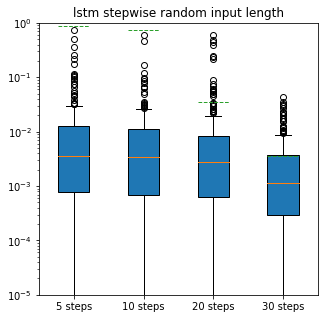

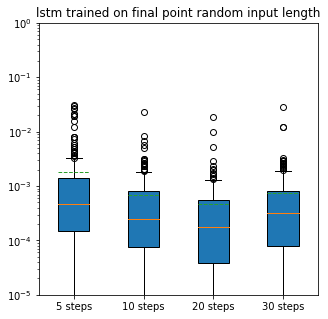

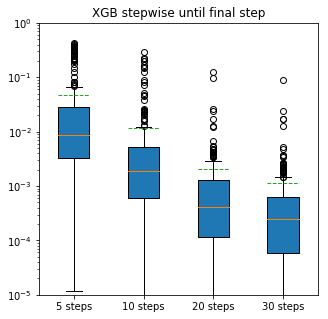

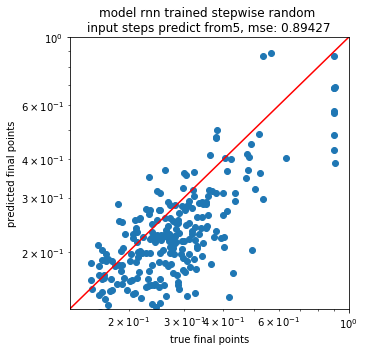

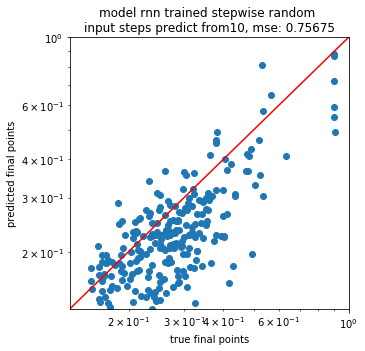

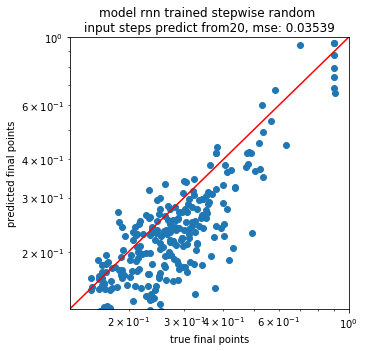

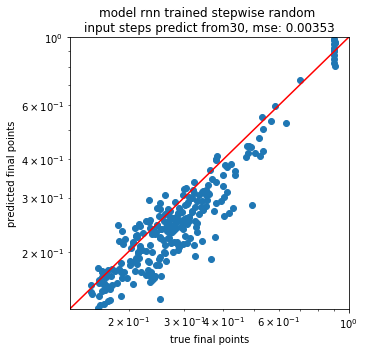

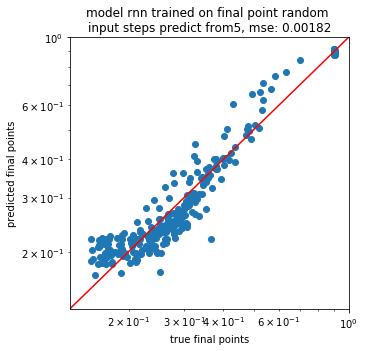

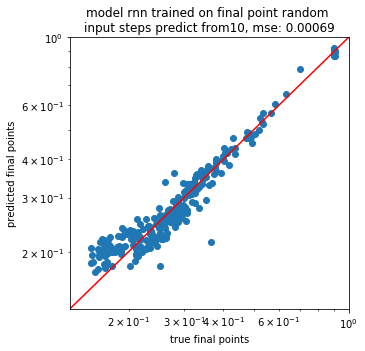

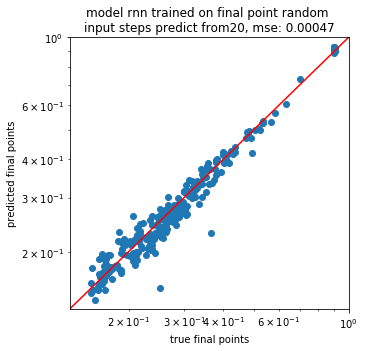

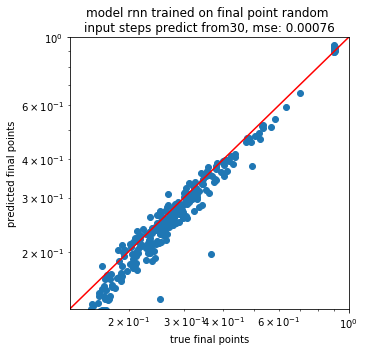

In [145]:
# res_lstm_finalstep = t.pickle_from_file('res_xgb_next')
t.box_plot(Y, (5,5), [t.pickle_from_file('res_lstm_nextstep_random')],
            ['5 steps', '10 steps', '20 steps', '30 steps'], 'lstm stepwise random input length')

t.box_plot(Y, (5,5), [t.pickle_from_file('res_lstm_finalstep_random')],
            ['5 steps', '10 steps', '20 steps', '30 steps'], 'lstm trained on final point random input length')


t.box_plot(Y, (5,5), [t.pickle_from_file('res_xgb_next')],
            ['5 steps', '10 steps', '20 steps', '30 steps'], 'XGB stepwise until final step')  

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


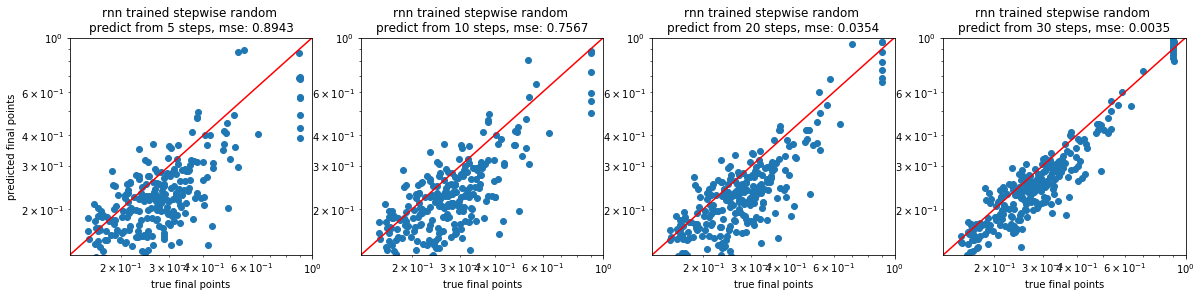

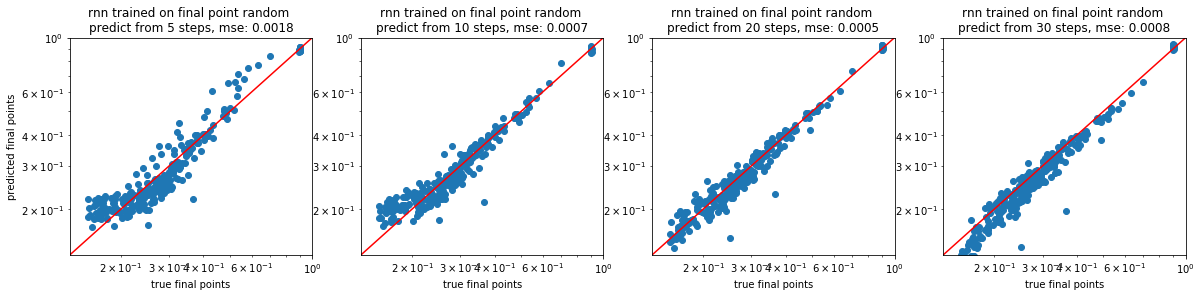

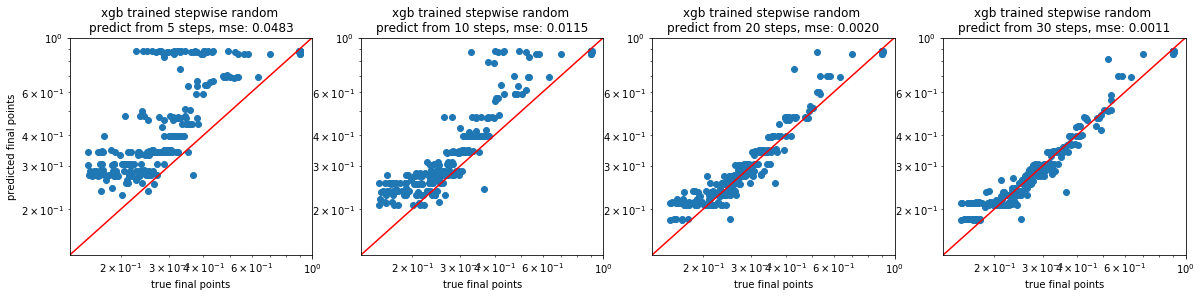

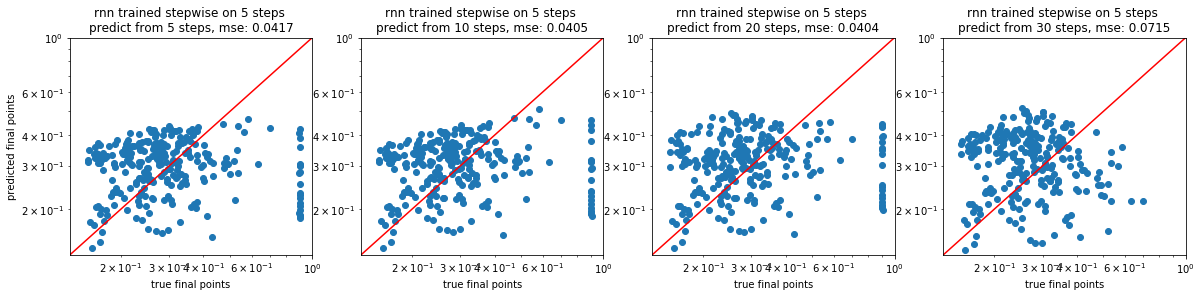

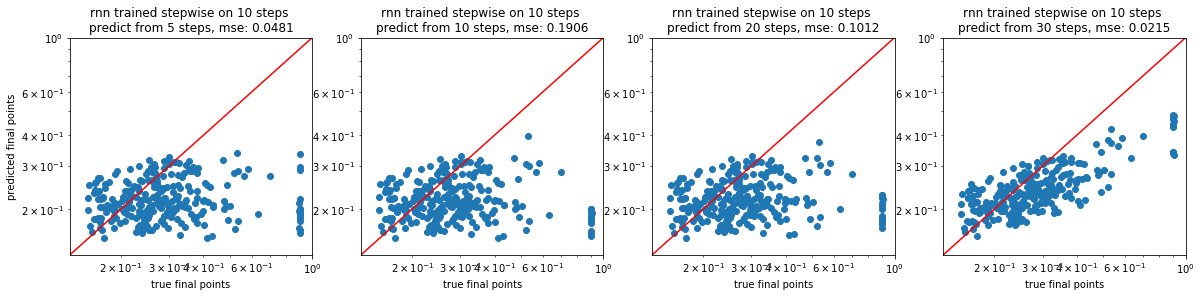

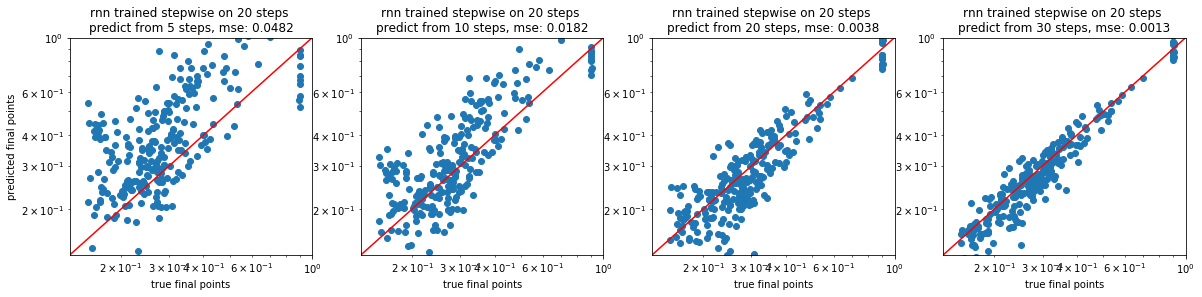

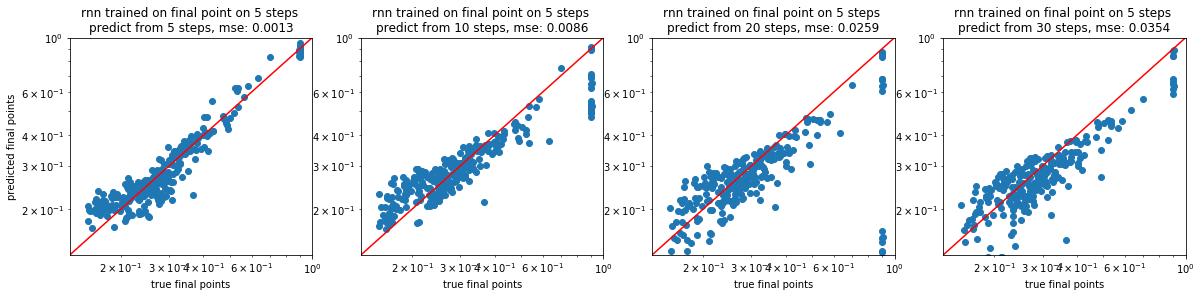

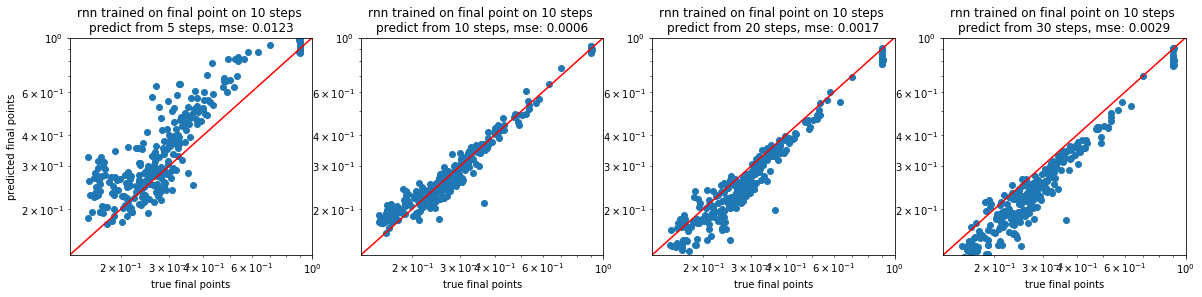

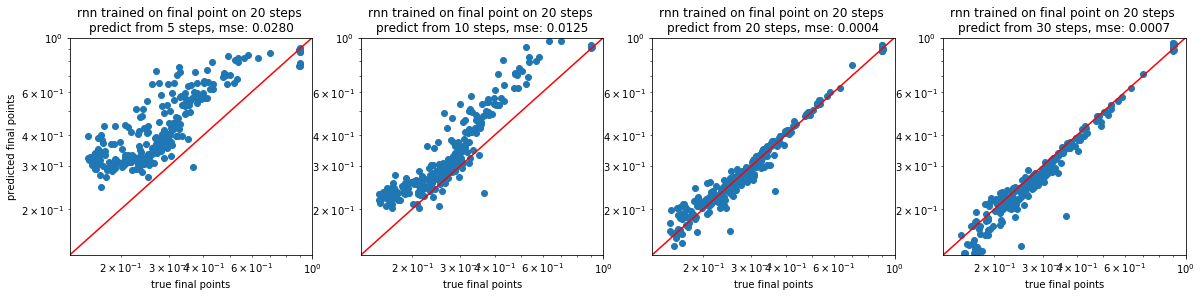

In [170]:
# plot all scatterplot for rnns
t.scatter_plot_multi(Y, (20,4), t.pickle_from_file('res_lstm_nextstep_random'), 
                     'rnn trained stepwise random \npredict from', steps=[5,10,20,30])

t.scatter_plot_multi(Y, (20,4), t.pickle_from_file('res_lstm_finalstep_random'), 
                     'rnn trained on final point random \npredict from', steps=[5,10,20,30])

t.scatter_plot_multi(Y, (20,4), t.pickle_from_file('res_xgb_next'), 
                     'xgb trained stepwise random \npredict from', steps=[5,10,20,30])

for i,s in enumerate([5,10,20]):
    t.scatter_plot_multi(Y, (20,4), t.pickle_from_file('res_lstm_nextstep')[i], 
                         'rnn trained stepwise on '+str(s)+' steps \npredict from', steps=[5,10,20,30])

for i,s in enumerate([5,10,20]):
    t.scatter_plot_multi(Y, (20,4), t.pickle_from_file('res_lstm_finalstep')[i], 
                         'rnn trained on final point on '+str(s)+' steps \npredict from', steps=[5,10,20,30])


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


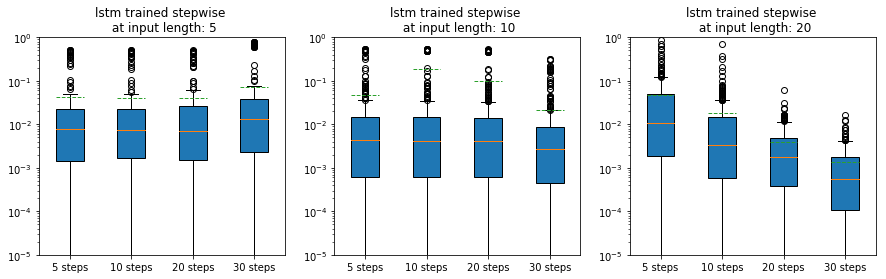

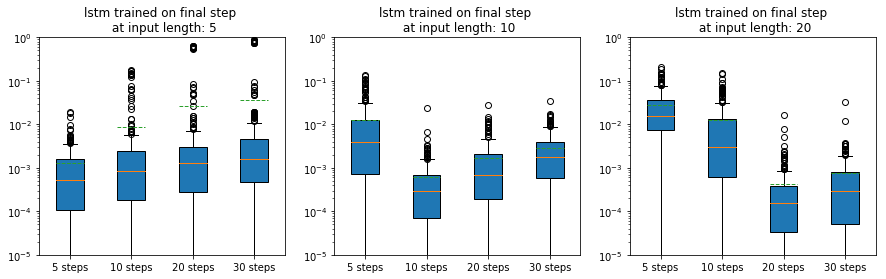

In [117]:
t.box_plot(Y, (15,4), t.pickle_from_file('res_lstm_nextstep'),
            ['5 steps', '10 steps', '20 steps', '30 steps'], 'lstm trained stepwise \n at input length: ', steps = [5,10,20])
t.box_plot(Y, (15,4), t.pickle_from_file('res_lstm_finalstep'),
            ['5 steps', '10 steps', '20 steps', '30 steps'], 'lstm trained on final step \n at input length: ', steps = [5,10,20])



mses [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
mses [[  4.17128188e-02   4.04564586e-02   4.04458238e-02   7.15193738e-02]
 [  4.81123812e-02   1.90555527e-01   1.01201490e-01   2.15394736e-02]
 [  4.81986522e-02   1.82114042e-02   3.83503424e-03   1.34141349e-03]
 [  8.94266561e-01   7.56749991e-01   3.53889073e-02   3.53210140e-03]
 [  4.83067392e-02   1.15198954e-02   2.04126966e-03   1.12658018e-03]
 [  1.28039351e-03   8.63054703e-03   2.58635281e-02   3.53853100e-02]
 [  1.22754472e-02   6.19568682e-04   1.70244309e-03   2.89102025e-03]
 [  2.80209584e-02   1.24531721e-02   4.25402222e-04   7.47715737e-04]
 [  1.82137786e-03   6.94467597e-04   4.66306242e-04   7.55971088e-04]]
table [['0.04', '0.04', '0.04', '0.07'], ['0.05', '0.19', '0.10', '0.02'], ['0.05', '0.02', '0.00', '0.00'], ['0.89', '0.76', '0.04', '0.00'], ['0.05', '0.01', '0.00', '0.00'], [

/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


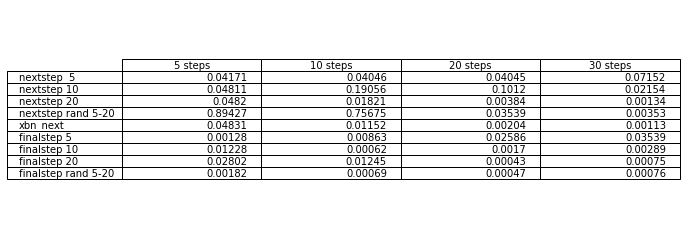

In [197]:
steps_all = t.pickle_from_file('res_lstm_nextstep')
# steps_random = [t.pickle_from_file('res_lstm_nextstep_random')]
steps_all.extend([t.pickle_from_file('res_lstm_nextstep_random')])
steps_all.extend([t.pickle_from_file('res_xgb_next')])
steps_all.extend(t.pickle_from_file('res_lstm_finalstep'))
steps_all.extend([t.pickle_from_file('res_lstm_finalstep_random')])

t.table_plot(Y, (10,4), steps_all, ['5 steps', '10 steps', '20 steps', '30 steps'], 
             'table_plot_steps', 
             steps = ['nextstep  5','nextstep 10','nextstep 20','nextstep rand 5-20','xbn_next',
                      'finalstep 5','finalstep 10','finalstep 20','finalstep rand 5-20'])

path plots/lstm trained stepwise 
 at input length: _sct.png


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


path plots/lstm trained on final step 
 at input length: _sct.png


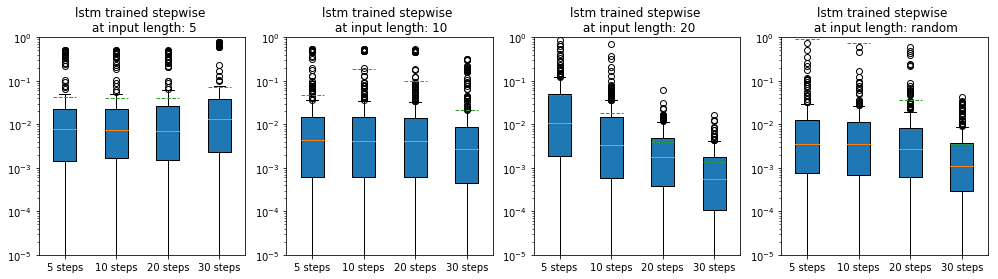

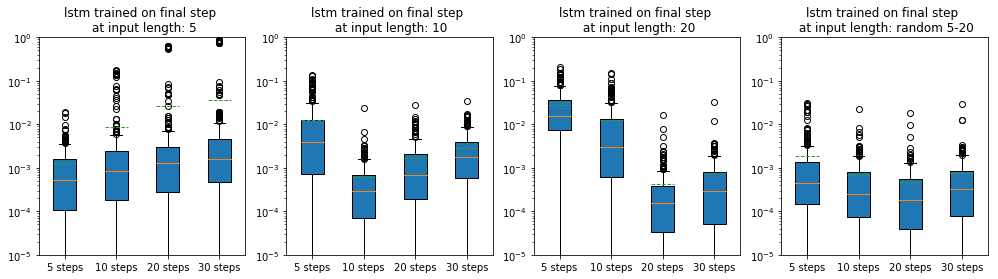

In [69]:
steps_all = t.pickle_from_file('res_lstm_nextstep')
steps_random = [t.pickle_from_file('res_lstm_nextstep_random')]
steps_all.extend(steps_random)
t.box_plot(Y, (17,4), steps_all, ['5 steps', '10 steps', '20 steps', '30 steps'], 
           'lstm trained stepwise \n at input length: ', steps = [5,10,20,'random'])

steps_all = t.pickle_from_file('res_lstm_finalstep')
steps_random = [t.pickle_from_file('res_lstm_finalstep_random')]
steps_all.extend(steps_random)
t.box_plot(Y, (17,4), steps_all, ['5 steps', '10 steps', '20 steps', '30 steps'], 
           'lstm trained on final step \n at input length: ', steps = [5,10,20,'random 5-20'])

In [86]:
# extrapolation learning curves
# train rnn on random step lenghts
model = m.multi_lstm()
split = 200
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(0,10), split=split, batch_size=20, 
             epochs=100, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=10, split=200, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on nextstep with random nr. of epochs, eval during training with 10 epochs
Epoch 1/100
10/10 [==============================] - 7s 738ms/step - loss: 0.2677 - mean_squared_error: 0.2677 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 2/100
10/10 [==============================] - 2s 203ms/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 3/100
10/10 [==============================] - 2s 207ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 4/100
10/10 [==============================] - 2s 207ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 5/100
10/10 [==============================] - 2s 212ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 6/100
10/10 [==============================] - 2s 2

Epoch 48/100
10/10 [==============================] - 2s 186ms/step - loss: 7.4697e-04 - mean_squared_error: 7.4697e-04 - val_loss: 6.3821e-04 - val_mean_squared_error: 6.3821e-04
Epoch 49/100
10/10 [==============================] - 2s 178ms/step - loss: 6.3978e-04 - mean_squared_error: 6.3978e-04 - val_loss: 4.2315e-04 - val_mean_squared_error: 4.2315e-04
Epoch 50/100
10/10 [==============================] - 2s 182ms/step - loss: 6.0573e-04 - mean_squared_error: 6.0573e-04 - val_loss: 9.8216e-04 - val_mean_squared_error: 9.8216e-04
Epoch 51/100
10/10 [==============================] - 2s 204ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 6.0173e-04 - val_mean_squared_error: 6.0173e-04
Epoch 52/100
10/10 [==============================] - 2s 196ms/step - loss: 6.7619e-04 - mean_squared_error: 6.7619e-04 - val_loss: 2.8773e-04 - val_mean_squared_error: 2.8773e-04
Epoch 53/100
10/10 [==============================] - 2s 208ms/step - loss: 5.0470e-04 - mean_squared_error:

Epoch 94/100
10/10 [==============================] - 2s 210ms/step - loss: 6.0742e-04 - mean_squared_error: 6.0742e-04 - val_loss: 6.2993e-04 - val_mean_squared_error: 6.2993e-04
Epoch 95/100
10/10 [==============================] - 2s 182ms/step - loss: 5.2974e-04 - mean_squared_error: 5.2974e-04 - val_loss: 7.5643e-04 - val_mean_squared_error: 7.5643e-04
Epoch 96/100
10/10 [==============================] - 2s 237ms/step - loss: 5.3518e-04 - mean_squared_error: 5.3518e-04 - val_loss: 7.3252e-04 - val_mean_squared_error: 7.3252e-04
Epoch 97/100
10/10 [==============================] - 2s 206ms/step - loss: 6.7280e-04 - mean_squared_error: 6.7280e-04 - val_loss: 4.5125e-04 - val_mean_squared_error: 4.5125e-04
Epoch 98/100
10/10 [==============================] - 2s 179ms/step - loss: 5.2560e-04 - mean_squared_error: 5.2560e-04 - val_loss: 3.9228e-04 - val_mean_squared_error: 3.9228e-04
Epoch 99/100
10/10 [==============================] - 2s 194ms/step - loss: 5.2590e-04 - mean_square

(0.044886408606220826, 0.02854901651727049)

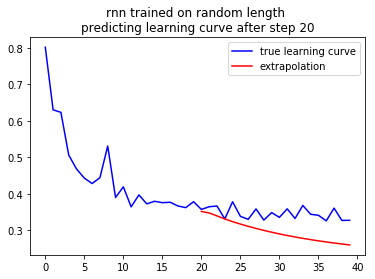

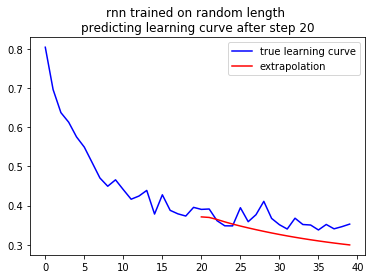

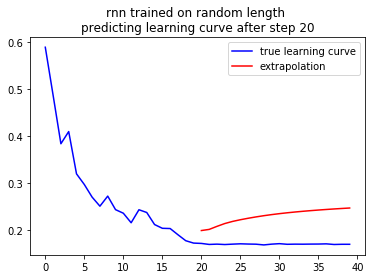

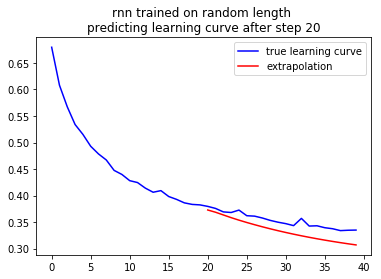

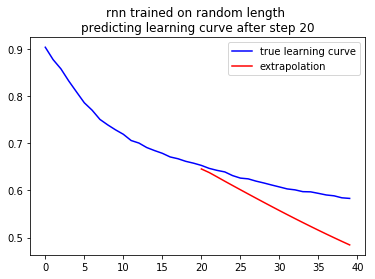

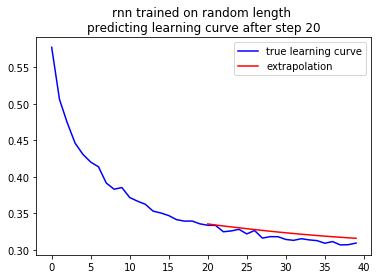

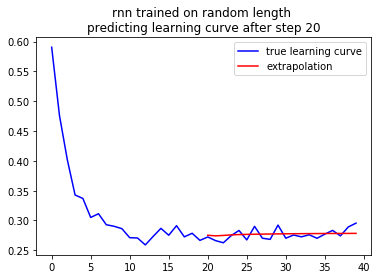

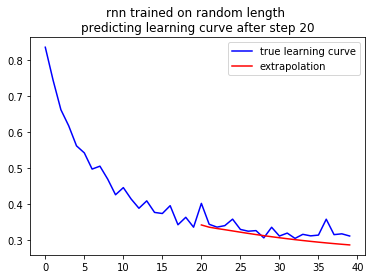

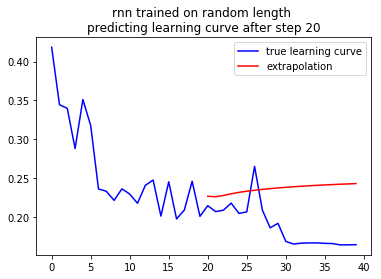

In [93]:
step = 20   # predict from step onwards
val_idx = np.arange(split,Y.shape[0])
_, lc_preds = m._pred_lstm_stepwise(model, [configs,lcs], step, val_idx)    # predict from step 10 onwards

t.pickle_to_file(lc_preds, 'extrapolations')
lc_preds = t.pickle_from_file('extrapolations')

for idx in np.arange(3,12):
#   sel_id = 8   # select curve, nr. sel id after split
    lc_pred = lc_preds[idx]
    lc_true = lcs[split+idx]
    t.extrapol_plot(lc_true, lc_pred, step, idx, 'extrapolate')

# print(lc_pred[:15])
# print(lc_true[:15])

###    running hyperparameter optimisations

In [7]:
best_cfg = hp.optimize(configs,Y,model_type='xgb', min_budget = 10, max_budget=40, run_name='')

139861376198400
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}
MSE on validation data on [5] steps: means over folds: *** 0.00975 ***
Results validation data of all Folds: 
[-0.01163 -0.00698 -0.01064]
hyperband obj crossval results 0.00975
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parall

MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.495817992217395, 'cols_bt': 0.23061156444509176, 'lr': 0.09241553780580979, 'n_estimators': 171, 'maxdepth': 7, 'subsample': 0.14650611279360481}
MSE on validation data on [5] steps: means over folds: *** 0.0221 ***
Results validation data of all Folds: 
[-0.03018 -0.01989 -0.01623]
hyperband obj crossval results 0.0221
cross val

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01826 ***
Results validation data of all Folds: 
[-0.02461 -0.01537 -0.0148 ]
hyperband obj crossval results 0.01826
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
traj {'losses': [-0.00975, -0.04739, -0.0611], 'budgets': [10.0, 10.0, 10.0], 'config_ids': [(0, 0, 0), (0, 0, 1), (0, 0, 2)], 'time_finished': [0.1408522129058838, 0.5603299140930176, 0.603823184967041]}
best_cfg_id (0, 0, 2)
all_configs {(0, 0, 0): {'config_info': {}, 'config': {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}}, (0, 0, 2): {'config_info': {}, 'config': {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}}, (1, 0, 0): {'config_info': {}, 'config': {'gamma': 0.7207615034783531, 'cols_bt': 0.7812935702980904, 'lr': 0.07416811991915133, 'n_estimators': 151, 'maxdepth': 4, 'subsample': 0.7

In [5]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 10, max_budget=100, 
                       run_name='', earlystop=False)

140187071411968
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.008436577394848653, 'batch_size': 19}
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.0015971832060604426, 'batch_size': 25}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 169us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 138us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 215us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.08455] ***
Results validation data of all Folds: 
[[ 0.10933]
 [ 0.07648]
 [ 0.06783]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.08455
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
train fold 1 on 5 steps, val

train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 184us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 160us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 130us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.05398] ***
Results validation data of all Folds: 
[[ 0.07588]
 [ 0.046  ]
 [ 0.04005]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.05398
cross validate 50 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.002410925627224085, 'batch_size': 52}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 278us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 128us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==========================

In [6]:
# best solution for MLP
best_config = {'lr': 0.37364476899503524, 'batch_size': 48}
results = m.eval_cv('mlp', configs, Y, cfg=best_cfg, epochs=1000, splits = 3, earlystop=True, 
                    dropout=False, lr_exp_decay=False)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.05283, storing weights.

Epoch 00002: val_loss improved from 0.05283 to 0.04822, storing weights.

Epoch 00003: val_loss improved from 0.04822 to 0.04465, storing weights.

Epoch 00004: val_loss is 0.04470, did not improve

Epoch 00005: val_loss improved from 0.04465 to 0.04354, storing weights.

Epoch 00006: val_loss improved from 0.04354 to 0.04342, storing weights.

Epoch 00007: val_loss is 0.04631, did not improve

Epoch 00008: val_loss improved from 0.04342 to 0.04184, storing weights.

Epoch 00009: val_loss improved from 0.04184 to 0.03921, storing weights.

Epoch 00010: val_loss is 0.04097, did not improve

Epoch 00011: val_loss improved from 0.03921 to 0.03690, storing weights.

Epoch 00012: val_loss improved from 0.03


Epoch 00139: val_loss is 0.00754, did not improve

Epoch 00140: val_loss is 0.00748, did not improve

Epoch 00141: val_loss is 0.00828, did not improve

Epoch 00142: val_loss is 0.00762, did not improve

Epoch 00143: val_loss improved from 0.00742 to 0.00741, storing weights.

Epoch 00144: val_loss is 0.00779, did not improve

Epoch 00145: val_loss is 0.00940, did not improve

Epoch 00146: val_loss is 0.00815, did not improve

Epoch 00147: val_loss is 0.00762, did not improve

Epoch 00148: val_loss improved from 0.00741 to 0.00740, storing weights.

Epoch 00149: val_loss is 0.00751, did not improve

Epoch 00150: val_loss is 0.00830, did not improve

Epoch 00151: val_loss is 0.00868, did not improve

Epoch 00152: val_loss is 0.00753, did not improve

Epoch 00153: val_loss improved from 0.00740 to 0.00733, storing weights.

Epoch 00154: val_loss is 0.00766, did not improve

Epoch 00155: val_loss is 0.00752, did not improve

Epoch 00156: val_loss improved from 0.00733 to 0.00733, storing


Epoch 00295: val_loss is 0.00723, did not improve

Epoch 00296: val_loss is 0.00733, did not improve

Epoch 00297: val_loss is 0.00728, did not improve

Epoch 00298: val_loss improved from 0.00696 to 0.00695, storing weights.

Epoch 00299: val_loss is 0.00730, did not improve

Epoch 00300: val_loss is 0.00710, did not improve

Epoch 00301: val_loss improved from 0.00695 to 0.00689, storing weights.

Epoch 00302: val_loss is 0.00694, did not improve

Epoch 00303: val_loss is 0.00774, did not improve

Epoch 00304: val_loss is 0.00744, did not improve

Epoch 00305: val_loss is 0.00689, did not improve

Epoch 00306: val_loss is 0.00773, did not improve

Epoch 00307: val_loss is 0.00911, did not improve

Epoch 00308: val_loss is 0.00720, did not improve

Epoch 00309: val_loss is 0.00704, did not improve

Epoch 00310: val_loss is 0.00712, did not improve

Epoch 00311: val_loss is 0.00732, did not improve

Epoch 00312: val_loss is 0.00704, did not improve

Epoch 00313: val_loss is 0.00766, d


Epoch 00449: val_loss is 0.00826, did not improve

Epoch 00450: val_loss is 0.00662, did not improve

Epoch 00451: val_loss is 0.00652, did not improve

Epoch 00452: val_loss is 0.00788, did not improve

Epoch 00453: val_loss is 0.00667, did not improve

Epoch 00454: val_loss is 0.00677, did not improve

Epoch 00455: val_loss is 0.00682, did not improve

Epoch 00456: val_loss is 0.00642, did not improve

Epoch 00457: val_loss is 0.00650, did not improve

Epoch 00458: val_loss is 0.00641, did not improve

Epoch 00459: val_loss is 0.00638, did not improve

Epoch 00460: val_loss is 0.00650, did not improve

Epoch 00461: val_loss is 0.00702, did not improve

Epoch 00462: val_loss is 0.00642, did not improve

Epoch 00463: val_loss is 0.00668, did not improve

Epoch 00464: val_loss is 0.00652, did not improve

Epoch 00465: val_loss is 0.00647, did not improve

Epoch 00466: val_loss is 0.00667, did not improve

Epoch 00467: val_loss is 0.00645, did not improve

Epoch 00468: val_loss is 0.006


Epoch 00012: val_loss improved from 0.02037 to 0.01899, storing weights.

Epoch 00013: val_loss improved from 0.01899 to 0.01775, storing weights.

Epoch 00014: val_loss improved from 0.01775 to 0.01697, storing weights.

Epoch 00015: val_loss improved from 0.01697 to 0.01573, storing weights.

Epoch 00016: val_loss is 0.01636, did not improve

Epoch 00017: val_loss improved from 0.01573 to 0.01439, storing weights.

Epoch 00018: val_loss is 0.01468, did not improve

Epoch 00019: val_loss improved from 0.01439 to 0.01316, storing weights.

Epoch 00020: val_loss is 0.01386, did not improve

Epoch 00021: val_loss improved from 0.01316 to 0.01254, storing weights.

Epoch 00022: val_loss improved from 0.01254 to 0.01225, storing weights.

Epoch 00023: val_loss improved from 0.01225 to 0.01106, storing weights.

Epoch 00024: val_loss improved from 0.01106 to 0.01068, storing weights.

Epoch 00025: val_loss improved from 0.01068 to 0.01052, storing weights.

Epoch 00026: val_loss improved f


Epoch 00169: val_loss is 0.00562, did not improve

Epoch 00170: val_loss is 0.00616, did not improve

Epoch 00171: val_loss is 0.00572, did not improve

Epoch 00172: val_loss is 0.00599, did not improve

Epoch 00173: val_loss is 0.00632, did not improve

Epoch 00174: val_loss is 0.00545, did not improve

Epoch 00175: val_loss is 0.00547, did not improve

Epoch 00176: val_loss is 0.00781, did not improve

Epoch 00177: val_loss is 0.00578, did not improve

Epoch 00178: val_loss is 0.01005, did not improve

Epoch 00179: val_loss is 0.00565, did not improve
Epoch 00179: early stopping
Using epoch 00164 with val_loss: 0.00533
88/88 [==============================] - 0s 133us/step
train fold 3 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.02599, storing weights.

Epoch 00002: val_loss improved from 0.02599 to 0.02511, storing weights.

Epoch 00003: val_loss is 0.02629, did not improve

Epoch 00004: val_loss is 0.02653, did not improve

Epoch 00005: val_loss


Epoch 00132: val_loss improved from 0.00599 to 0.00558, storing weights.

Epoch 00133: val_loss is 0.00633, did not improve

Epoch 00134: val_loss is 0.00588, did not improve

Epoch 00135: val_loss is 0.00588, did not improve

Epoch 00136: val_loss is 0.00618, did not improve

Epoch 00137: val_loss is 0.00686, did not improve

Epoch 00138: val_loss is 0.00627, did not improve

Epoch 00139: val_loss is 0.00841, did not improve

Epoch 00140: val_loss is 0.00619, did not improve

Epoch 00141: val_loss is 0.00645, did not improve

Epoch 00142: val_loss is 0.00597, did not improve

Epoch 00143: val_loss is 0.00709, did not improve

Epoch 00144: val_loss is 0.00662, did not improve

Epoch 00145: val_loss improved from 0.00558 to 0.00556, storing weights.

Epoch 00146: val_loss is 0.00596, did not improve

Epoch 00147: val_loss is 0.00708, did not improve

Epoch 00148: val_loss is 0.00690, did not improve

Epoch 00149: val_loss is 0.00610, did not improve

Epoch 00150: val_loss is 0.00654, d


Epoch 00298: val_loss is 0.00582, did not improve

Epoch 00299: val_loss is 0.00639, did not improve

Epoch 00300: val_loss is 0.00630, did not improve

Epoch 00301: val_loss is 0.00525, did not improve

Epoch 00302: val_loss is 0.00569, did not improve

Epoch 00303: val_loss is 0.00527, did not improve

Epoch 00304: val_loss is 0.00590, did not improve

Epoch 00305: val_loss is 0.00988, did not improve

Epoch 00306: val_loss is 0.00496, did not improve

Epoch 00307: val_loss is 0.00986, did not improve

Epoch 00308: val_loss is 0.00955, did not improve

Epoch 00309: val_loss is 0.00561, did not improve

Epoch 00310: val_loss is 0.00605, did not improve

Epoch 00311: val_loss is 0.00531, did not improve

Epoch 00312: val_loss is 0.00594, did not improve

Epoch 00313: val_loss is 0.00624, did not improve

Epoch 00314: val_loss is 0.00646, did not improve

Epoch 00315: val_loss is 0.00559, did not improve

Epoch 00316: val_loss is 0.00688, did not improve

Epoch 00317: val_loss is 0.006

In [74]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 10, max_budget=100, 
                       run_name='', earlystop=False, L1L2=True)

139639964378880
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 30, 'lr': 0.05958020697008728, 'l2': 0.00012441938511358324, 'l1': 0.0010959499184547534}
create mlp using L1L2 regularisation
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 17, 'lr': 0.12169705572542237, 'l2': 0.002212816444365411, 'l1': 0.0003982270934210315}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.0283] ***
Results validation data of all Folds: 
[[ 0.04038]
 [ 0.02392]
 [ 0.0206 ]]
MSE on train data on [5] steps: means over folds: *** [ 0.02514] ***
Results training data of all Folds: 
[[ 0.02384]
 [ 0.02672]
 [ 0.02486]]
hyperband obj crossval results 0.0283
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size

train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.02776] ***
Results validation data of all Folds: 
[[ 0.04287]
 [ 0.02069]
 [ 0.01971]]
MSE on train data on [5] steps: means over folds: *** [ 0.02463] ***
Results training data of all Folds: 
[[ 0.02577]
 [ 0.02562]
 [ 0.0225 ]]
hyperband obj crossval results 0.02776
cross validate 50 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 21, 'lr': 0.1327865384217142, 'l2': 0.00015323570193598286, 'l1': 0.0009965813801526037}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.01785] ***
Results validation data of all Folds: 
[[ 0.02822]
 [ 0.0116 ]
 [ 0.01372]]
MSE on train data on [5] steps: means over folds: *** [ 0.01427] ***


train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.03834] ***
Results validation data of all Folds: 
[[ 0.04963]
 [ 0.03753]
 [ 0.02785]]
MSE on train data on [5] steps: means over folds: *** [ 0.03648] ***
Results training data of all Folds: 
[[ 0.02869]
 [ 0.04216]
 [ 0.03859]]
hyperband obj crossval results 0.03834
cross validate 100 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.00746] ***
Results validation data of all Folds: 
[[ 0.00891]
 [ 0.0066 ]
 [ 0.00687]]
MSE on train data on [5] steps: means over folds: *** [ 0.00542] ***

In [5]:
best_cfg = hp.optimize([configs,lcs], Y, model_type='multi_lstm', 
                       min_budget = 4, max_budget=40, run_name='', earlystop=False)

139639964378880
cross validate 5 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.1874018718283377}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 57305.17739 / 49320.43900
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.35682 / 1.32998
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.63600 / 1.60417
MSE on validation data on [5] steps: means over folds: *** [ 16441.12438] ***
Results validation data of all Folds: 
[[  4.93204390e+04]
 [  1.32998000e+00]
 [  1.60417000e+00]]
MSE on train data on [5] steps: means over folds: *** [ 19102.7234] ***
Results training data of all Folds: 
[[  5.73051774e+04]
 [  1.35682000e+00]
 [  1.63600000e+00]]
hype

validate on 5 steps, mse on train / validation data: 0.63654 / 0.69261
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.49294 / 0.53654
MSE on validation data on [5] steps: means over folds: *** [ 1174.76414] ***
Results validation data of all Folds: 
[[  3.52306327e+03]
 [  6.92610000e-01]
 [  5.36540000e-01]]
MSE on train data on [5] steps: means over folds: *** [ 1157.72448] ***
Results training data of all Folds: 
[[  3.47204396e+03]
 [  6.36540000e-01]
 [  4.92940000e-01]]
hyperband obj crossval results 1174.76414
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 18, 'lr': 0.0076099528036695455}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 3.07994 / 5.19139
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evalua

train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.37079 / 0.41493
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.04794 / 0.03834
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 5.68127 / 4.39918
MSE on validation data on [5] steps: means over folds: *** [ 1.61748] ***
Results validation data of all Folds: 
[[ 0.41493]
 [ 0.03834]
 [ 4.39918]]
MSE on train data on [5] steps: means over folds: *** [ 2.03333] ***
Results training data of all Folds: 
[[ 0.37079]
 [ 0.04794]
 [ 5.68127]]
hyperband obj crossval results 1.61748
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 26, 'lr': 0.1579507660887153}
train fold 1 on 5 steps, validation on 5 st

validate on 5 steps, mse on train / validation data: 1.42394 / 1.42303
MSE on validation data on [5] steps: means over folds: *** [ 1.21747] ***
Results validation data of all Folds: 
[[ 1.95491]
 [ 0.27446]
 [ 1.42303]]
MSE on train data on [5] steps: means over folds: *** [ 1.17871] ***
Results training data of all Folds: 
[[ 1.84544]
 [ 0.26675]
 [ 1.42394]]
hyperband obj crossval results 1.21747
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.06641032495399549}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.98941 / 1.91761
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 6.48118 / 6.42872
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / valida

In [6]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=best_cfg, epochs=1000, earlystop=True, 
                                         mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)
# results were far better with lr = 0.002 above

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 21, 'lr': 0.023123758972112808}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.15458, storing weights.

Epoch 00002: val_loss improved from 0.15458 to 0.09678, storing weights.

Epoch 00003: val_loss improved from 0.09678 to 0.02604, storing weights.

Epoch 00004: val_loss is 0.03820, did not improve

Epoch 00005: val_loss improved from 0.02604 to 0.01416, storing weights.

Epoch 00006: val_loss improved from 0.01416 to 0.01231, storing weights.

Epoch 00007: val_loss improved from 0.01231 to 0.00266, storing weights.

Epoch 00008: val_loss is 0.00400, did not improve

Epoch 00009: val_loss is 0.00438, did not improve

Epoch 00010: val_loss improved from 0.00266 to 0.00153, storing weights.

Epoch 00011: val_loss is 0.00301, did not improve



Epoch 00137: val_loss is 0.00063, did not improve

Epoch 00138: val_loss is 0.00065, did not improve

Epoch 00139: val_loss is 0.00063, did not improve

Epoch 00140: val_loss is 0.00065, did not improve

Epoch 00141: val_loss is 0.00064, did not improve

Epoch 00142: val_loss is 0.00065, did not improve

Epoch 00143: val_loss is 0.00064, did not improve

Epoch 00144: val_loss is 0.00066, did not improve
Epoch 00144: early stopping
Using epoch 00086 with val_loss: 0.00045
validate on 30 steps, mse on train / validation data: 0.17828 / 0.28994
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 5.90476, storing weights.

Epoch 00002: val_loss is 1361.45895, did not improve

Epoch 00003: val_loss is 510.44960, did not improve

Epoch 00004: val_loss is 255.13004, did not improve

Epoch 00005: val_loss is 54.13024, did not improve

Epoch 00006: val_loss is 21.52839, did not improve

Epoch 00007: val_l


Epoch 00106: val_loss improved from 0.00079 to 0.00079, storing weights.

Epoch 00107: val_loss improved from 0.00079 to 0.00078, storing weights.

Epoch 00108: val_loss improved from 0.00078 to 0.00078, storing weights.

Epoch 00109: val_loss improved from 0.00078 to 0.00077, storing weights.

Epoch 00110: val_loss improved from 0.00077 to 0.00077, storing weights.

Epoch 00111: val_loss improved from 0.00077 to 0.00076, storing weights.

Epoch 00112: val_loss improved from 0.00076 to 0.00076, storing weights.

Epoch 00113: val_loss improved from 0.00076 to 0.00075, storing weights.

Epoch 00114: val_loss improved from 0.00075 to 0.00075, storing weights.

Epoch 00115: val_loss improved from 0.00075 to 0.00074, storing weights.

Epoch 00116: val_loss improved from 0.00074 to 0.00074, storing weights.

Epoch 00117: val_loss improved from 0.00074 to 0.00073, storing weights.

Epoch 00118: val_loss improved from 0.00073 to 0.00073, storing weights.

Epoch 00119: val_loss improved from 0


Epoch 00047: val_loss improved from 0.00224 to 0.00223, storing weights.

Epoch 00048: val_loss improved from 0.00223 to 0.00223, storing weights.

Epoch 00049: val_loss improved from 0.00223 to 0.00222, storing weights.

Epoch 00050: val_loss improved from 0.00222 to 0.00222, storing weights.

Epoch 00051: val_loss improved from 0.00222 to 0.00221, storing weights.

Epoch 00052: val_loss improved from 0.00221 to 0.00220, storing weights.

Epoch 00053: val_loss improved from 0.00220 to 0.00220, storing weights.

Epoch 00054: val_loss improved from 0.00220 to 0.00219, storing weights.

Epoch 00055: val_loss improved from 0.00219 to 0.00219, storing weights.

Epoch 00056: val_loss improved from 0.00219 to 0.00218, storing weights.

Epoch 00057: val_loss improved from 0.00218 to 0.00217, storing weights.

Epoch 00058: val_loss improved from 0.00217 to 0.00217, storing weights.

Epoch 00059: val_loss improved from 0.00217 to 0.00216, storing weights.

Epoch 00060: val_loss improved from 0


Epoch 00159: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00160: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00161: val_loss improved from 0.00167 to 0.00166, storing weights.

Epoch 00162: val_loss improved from 0.00166 to 0.00166, storing weights.

Epoch 00163: val_loss improved from 0.00166 to 0.00165, storing weights.

Epoch 00164: val_loss improved from 0.00165 to 0.00165, storing weights.

Epoch 00165: val_loss improved from 0.00165 to 0.00164, storing weights.

Epoch 00166: val_loss improved from 0.00164 to 0.00164, storing weights.

Epoch 00167: val_loss improved from 0.00164 to 0.00163, storing weights.

Epoch 00168: val_loss improved from 0.00163 to 0.00162, storing weights.

Epoch 00169: val_loss improved from 0.00162 to 0.00162, storing weights.

Epoch 00170: val_loss improved from 0.00162 to 0.00161, storing weights.

Epoch 00171: val_loss improved from 0.00161 to 0.00161, storing weights.

Epoch 00172: val_loss improved from 0


Epoch 00279: val_loss is 0.00139, did not improve

Epoch 00280: val_loss is 0.00139, did not improve

Epoch 00281: val_loss is 0.00138, did not improve

Epoch 00282: val_loss is 0.00138, did not improve

Epoch 00283: val_loss is 0.00137, did not improve

Epoch 00284: val_loss is 0.00136, did not improve

Epoch 00285: val_loss is 0.00135, did not improve

Epoch 00286: val_loss is 0.00134, did not improve

Epoch 00287: val_loss is 0.00133, did not improve

Epoch 00288: val_loss is 0.00131, did not improve

Epoch 00289: val_loss is 0.00130, did not improve

Epoch 00290: val_loss is 0.00128, did not improve

Epoch 00291: val_loss is 0.00126, did not improve

Epoch 00292: val_loss is 0.00124, did not improve

Epoch 00293: val_loss is 0.00122, did not improve

Epoch 00294: val_loss is 0.00120, did not improve

Epoch 00295: val_loss is 0.00118, did not improve

Epoch 00296: val_loss is 0.00116, did not improve

Epoch 00297: val_loss is 0.00115, did not improve

Epoch 00298: val_loss is 0.001


Epoch 00405: val_loss is 0.00070, did not improve

Epoch 00406: val_loss is 0.00070, did not improve

Epoch 00407: val_loss is 0.00070, did not improve

Epoch 00408: val_loss is 0.00070, did not improve

Epoch 00409: val_loss is 0.00071, did not improve

Epoch 00410: val_loss is 0.00071, did not improve

Epoch 00411: val_loss is 0.00071, did not improve

Epoch 00412: val_loss is 0.00071, did not improve

Epoch 00413: val_loss is 0.00071, did not improve

Epoch 00414: val_loss is 0.00072, did not improve

Epoch 00415: val_loss is 0.00072, did not improve

Epoch 00416: val_loss is 0.00072, did not improve

Epoch 00417: val_loss is 0.00072, did not improve

Epoch 00418: val_loss is 0.00072, did not improve

Epoch 00419: val_loss is 0.00073, did not improve

Epoch 00420: val_loss is 0.00073, did not improve

Epoch 00421: val_loss is 0.00073, did not improve

Epoch 00422: val_loss is 0.00073, did not improve

Epoch 00423: val_loss is 0.00074, did not improve

Epoch 00424: val_loss is 0.000


Epoch 00106: val_loss is 0.00039, did not improve

Epoch 00107: val_loss is 0.00040, did not improve

Epoch 00108: val_loss is 0.00039, did not improve

Epoch 00109: val_loss is 0.00040, did not improve

Epoch 00110: val_loss is 0.00040, did not improve

Epoch 00111: val_loss is 0.00041, did not improve

Epoch 00112: val_loss is 0.00041, did not improve

Epoch 00113: val_loss is 0.00041, did not improve

Epoch 00114: val_loss is 0.00041, did not improve

Epoch 00115: val_loss is 0.00041, did not improve

Epoch 00116: val_loss is 0.00042, did not improve

Epoch 00117: val_loss is 0.00041, did not improve

Epoch 00118: val_loss is 0.00043, did not improve

Epoch 00119: val_loss is 0.00042, did not improve

Epoch 00120: val_loss is 0.00044, did not improve

Epoch 00121: val_loss is 0.00044, did not improve

Epoch 00122: val_loss is 0.00047, did not improve

Epoch 00123: val_loss is 0.00048, did not improve

Epoch 00124: val_loss is 0.00052, did not improve

Epoch 00125: val_loss is 0.000


Epoch 00020: val_loss is 0.00029, did not improve

Epoch 00021: val_loss is 0.00029, did not improve

Epoch 00022: val_loss is 0.00029, did not improve

Epoch 00023: val_loss is 0.00029, did not improve

Epoch 00024: val_loss is 0.00029, did not improve

Epoch 00025: val_loss is 0.00029, did not improve

Epoch 00026: val_loss is 0.00029, did not improve

Epoch 00027: val_loss is 0.00029, did not improve

Epoch 00028: val_loss is 0.00029, did not improve

Epoch 00029: val_loss is 0.00029, did not improve

Epoch 00030: val_loss is 0.00029, did not improve

Epoch 00031: val_loss is 0.00029, did not improve

Epoch 00032: val_loss is 0.00029, did not improve

Epoch 00033: val_loss is 0.00029, did not improve

Epoch 00034: val_loss is 0.00029, did not improve

Epoch 00035: val_loss is 0.00029, did not improve

Epoch 00036: val_loss is 0.00029, did not improve

Epoch 00037: val_loss is 0.00029, did not improve

Epoch 00038: val_loss is 0.00029, did not improve

Epoch 00039: val_loss is 0.000


Epoch 00066: val_loss is 0.00073, did not improve

Epoch 00067: val_loss is 0.00080, did not improve

Epoch 00068: val_loss is 0.00074, did not improve

Epoch 00069: val_loss is 0.00083, did not improve

Epoch 00070: val_loss is 0.00076, did not improve

Epoch 00071: val_loss is 0.00086, did not improve

Epoch 00072: val_loss is 0.00077, did not improve

Epoch 00073: val_loss is 0.00090, did not improve

Epoch 00074: val_loss is 0.00078, did not improve

Epoch 00075: val_loss is 0.00093, did not improve

Epoch 00076: val_loss is 0.00078, did not improve

Epoch 00077: val_loss is 0.00096, did not improve

Epoch 00078: val_loss is 0.00078, did not improve

Epoch 00079: val_loss is 0.00099, did not improve

Epoch 00080: val_loss is 0.00076, did not improve

Epoch 00081: val_loss is 0.00102, did not improve

Epoch 00082: val_loss is 0.00072, did not improve

Epoch 00083: val_loss is 0.00104, did not improve

Epoch 00084: val_loss is 0.00067, did not improve

Epoch 00085: val_loss is 0.001


Epoch 00003: val_loss is 14.75946, did not improve

Epoch 00004: val_loss is 275.30684, did not improve

Epoch 00005: val_loss is 13.29729, did not improve

Epoch 00006: val_loss is 8.29154, did not improve

Epoch 00007: val_loss is 0.53958, did not improve

Epoch 00008: val_loss is 10.31797, did not improve

Epoch 00009: val_loss is 1.31900, did not improve

Epoch 00010: val_loss is 0.25212, did not improve

Epoch 00011: val_loss is 0.24620, did not improve

Epoch 00012: val_loss improved from 0.09694 to 0.05898, storing weights.

Epoch 00013: val_loss improved from 0.05898 to 0.04390, storing weights.

Epoch 00014: val_loss improved from 0.04390 to 0.03132, storing weights.

Epoch 00015: val_loss is 0.03260, did not improve

Epoch 00016: val_loss improved from 0.03132 to 0.02776, storing weights.

Epoch 00017: val_loss is 0.02879, did not improve

Epoch 00018: val_loss improved from 0.02776 to 0.02754, storing weights.

Epoch 00019: val_loss is 0.02769, did not improve

Epoch 00020:

In [ ]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, 
                                     mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

In [68]:
# experiment with concatenating the config to each data point of learning curve
timesteps = 5
configs,lcs,Y = t.load_lstm_data_concat_cfg(timesteps=timesteps)
model_type = 'lstm'
model = m.lstm(lcs[0][0].shape[0])
m.train_lstm(model, lcs, Y, split=200, batch_size=20, epochs=5)
mse = m.eval_lstm(model, lcs, Y, split=200, batch_size=20)

scaling configuration data
build lstm with input_dim: 6
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/5
65/65 [==============================] - 0s 843us/step
mse:  0.00873059442697


## Sample learning curves

In [122]:
import numpy as np

n_subset=20
n_epochs = 40
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

NameError: name 'learning_curves' is not defined

## Basic Data Exploration

### Histogram and CDF over the final error rate

265


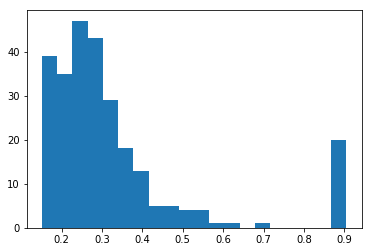

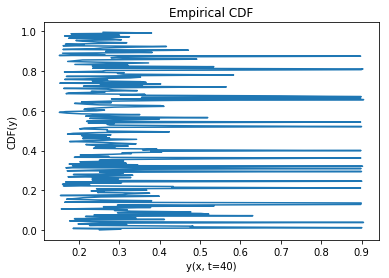

In [124]:
import matplotlib.pyplot as plt

sorted = np.sort(lcs[:, -1])   # sorted list of final val error
print(len(sorted))
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))   # from 0 to 1 in 265 even steps
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

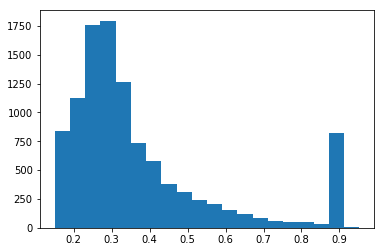

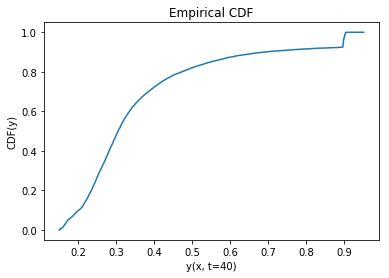

In [14]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()